In [6]:
#RadheKrishnaathis

#Importing some important libraries

In [1]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , mean_absolute_error
from prophet import Prophet

#"Reading and Loading Data with Pandas"









In [4]:
import pandas as pd
df = pd.read_csv('/content/train (6).csv')

#"Previewing the First 20 Rows of the DataFrame"










In [5]:
df.head(20)

,Id,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,0,2033-03-01,159.271109,167.221488,157.380478,161.915062,160.167043,40490589,Company_0
1,1,2033-03-01,114.571843,114.409664,112.921505,113.066659,87.844722,8592865,Company_1
2,2,2033-03-01,50.984499,51.262529,50.266272,50.094499,49.329834,25085661,Company_2
3,3,2033-03-01,98.585428,99.988079,97.867719,98.811966,91.784469,823271,Company_3
4,4,2033-03-01,8874.646107,8935.704765,8811.247764,8873.173069,8407.389386,609369,Company_4
5,5,2033-03-01,136.430652,136.256775,135.141236,135.882546,105.356425,2576112,Company_5
6,6,2033-03-05,158.049337,167.347904,152.216604,163.108507,162.822481,38792259,Company_0
7,7,2033-03-05,113.266631,113.161314,110.170448,110.561246,85.704890,11677097,Company_1
8,8,2033-03-05,50.534860,49.383999,49.821946,49.250071,49.927823,15073917,Company_2
9,9,2033-03-05,99.338531,99.160609,96.718357,96.594597,89.513635,830714,Company_3


#"Checking DataFrame Shape"








In [7]:
df.shape

(7416, 9)

#"Inspecting DataFrame Information"








In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7416 entries, 0 to 7415
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         7416 non-null   int64  
 1   Date       7416 non-null   object 
 2   Open       7416 non-null   float64
 3   High       7416 non-null   float64
 4   Low        7416 non-null   float64
 5   Close      7416 non-null   float64
 6   Adj Close  7416 non-null   float64
 7   Volume     7416 non-null   int64  
 8   Company    7416 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 521.6+ KB


#"Converting 'Date' Column to DateTime Format"


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

#"Checking DataFrame Information After Converting Date Column"















In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7416 entries, 0 to 7415
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         7416 non-null   int64         
 1   Date       7416 non-null   datetime64[ns]
 2   Open       7416 non-null   float64       
 3   High       7416 non-null   float64       
 4   Low        7416 non-null   float64       
 5   Close      7416 non-null   float64       
 6   Adj Close  7416 non-null   float64       
 7   Volume     7416 non-null   int64         
 8   Company    7416 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 521.6+ KB


#"Summary Statistics of DataFrame"








In [11]:
df.describe()

,Id,Date,Open,High,Low,Close,Adj Close,Volume
count,7416.000000,7416,7416.000000,7416.000000,7416.000000,7416.000000,7416.000000,7.416000e+03
mean,3707.500000,2035-09-03 19:18:03.495145472,1322.970742,1338.768595,1305.328823,1321.298741,1280.440414,3.975197e+07
min,0.000000,2033-03-01 00:00:00,2.564008,2.507671,2.407399,2.358517,2.527507,1.277000e+03
25%,1853.750000,2034-06-06 18:00:00,56.270001,57.199683,55.096529,55.836524,50.836902,1.034437e+06
50%,3707.500000,2035-09-05 12:00:00,109.799270,111.421736,107.923378,109.613059,91.488025,6.081018e+06
75%,5561.250000,2036-12-03 18:00:00,164.955953,167.238755,163.383748,165.097484,158.495970,2.029659e+07
max,7415.000000,2038-02-28 00:00:00,9853.304141,9929.409504,9724.918827,9832.117608,9438.189612,1.073742e+09
std,2140.959131,NaN,2777.109807,2808.083803,2742.046008,2773.452166,2698.389268,1.102362e+08


#"Creating a Pivot Table for Stock Data"








In [12]:
# Pivot the DataFrame
df_pivoted = df.pivot(index='Date', columns='Company', values=['Open', 'High', 'Low', 'Volume','Id'])

# Flatten the MultiIndex columns
df_pivoted.columns = ['_'.join(col).strip() for col in df_pivoted.columns.values]

# Reset index for better structure
df_pivoted.reset_index(inplace=True)

# Display the result
df_pivoted.head(50)

,Date,Open_Company_0,Open_Company_1,Open_Company_2,Open_Company_3,Open_Company_4,Open_Company_5,High_Company_0,High_Company_1,High_Company_2,...,Volume_Company_2,Volume_Company_3,Volume_Company_4,Volume_Company_5,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,2033-03-01,159.271109,114.571843,50.984499,98.585428,8874.646107,136.430652,167.221488,114.409664,51.262529,...,25085661.0,823271.0,609369.0,2576112.0,0.0,1.0,2.0,3.0,4.0,5.0
1,2033-03-05,158.049337,113.266631,50.534860,99.338531,8867.074823,135.100632,167.347904,113.161314,49.383999,...,15073917.0,830714.0,388180.0,3945470.0,6.0,7.0,8.0,9.0,10.0,11.0
2,2033-03-06,163.686732,110.756424,49.838053,97.339020,8855.832360,137.119321,167.057890,112.339453,50.240192,...,16314199.0,1287970.0,543686.0,6137704.0,12.0,13.0,14.0,15.0,16.0,17.0
3,2033-03-07,160.461622,109.827335,49.242896,93.144173,8621.791003,135.576175,161.422258,111.136768,49.930463,...,22678239.0,1755708.0,598715.0,3130801.0,18.0,19.0,20.0,21.0,22.0,23.0
4,2033-03-08,150.289989,111.168595,48.728623,90.821417,8699.274117,136.789364,154.889808,111.415207,49.391428,...,33250438.0,1441977.0,533856.0,5446693.0,24.0,25.0,26.0,27.0,28.0,29.0
5,2033-03-09,150.874582,109.545604,48.383613,92.525594,8759.748123,137.492857,151.587220,111.143625,49.103513,...,12098696.0,853950.0,323450.0,4485285.0,30.0,31.0,32.0,33.0,34.0,35.0
6,2033-03-12,148.274722,108.734313,47.836318,91.368606,8719.303422,137.492645,150.054293,111.744210,48.705538,...,19049889.0,1084817.0,438339.0,3493401.0,36.0,37.0,38.0,39.0,40.0,41.0
7,2033-03-13,148.653629,111.880896,47.551496,91.456716,8809.906073,141.842848,154.874201,114.772795,48.850283,...,25303467.0,1713078.0,521943.0,3752316.0,42.0,43.0,44.0,45.0,46.0,47.0
8,2033-03-14,155.045115,114.063592,48.795215,93.241254,8734.956648,140.676858,160.666787,116.097168,48.845908,...,13815412.0,1001008.0,411769.0,4448883.0,48.0,49.0,50.0,51.0,52.0,53.0
9,2033-03-15,159.930110,113.454555,48.382610,92.140816,8839.950857,140.395400,162.786374,115.092489,49.658885,...,12103368.0,1258291.0,313431.0,4383296.0,54.0,55.0,56.0,57.0,58.0,59.0


#"Creating a Pivot Table for Closing Prices"








In [13]:
# Pivot the DataFrame
df_closing = df.pivot(index='Date', columns='Company', values=['Close'])

# Flatten the MultiIndex columns
df_closing.columns = ['_'.join(col).strip() for col in df_closing.columns.values]

# Reset index for better structure
df_closing.reset_index(inplace=True)

# Display the result
df_closing.head(50)

,Date,Close_Company_0,Close_Company_1,Close_Company_2,Close_Company_3,Close_Company_4,Close_Company_5
0,2033-03-01,161.915062,113.066659,50.094499,98.811966,8873.173069,135.882546
1,2033-03-05,163.108507,110.561246,49.250071,96.594597,8794.758109,135.970813
2,2033-03-06,161.716298,109.651386,48.878616,93.602065,8616.178598,136.070561
3,2033-03-07,148.051907,109.723772,48.670564,90.718080,8679.165970,135.772818
4,2033-03-08,148.483368,109.118052,47.642654,90.771456,8729.613528,137.854360
5,2033-03-09,145.773607,109.077894,46.736558,91.843348,8660.732813,136.964704
6,2033-03-12,149.739192,111.976254,47.494828,91.069128,8810.380462,142.693994
7,2033-03-13,151.771903,114.739537,48.029907,93.248665,8756.679492,140.962446
8,2033-03-14,159.384386,113.745603,49.401895,92.284946,8846.208947,141.180036
9,2033-03-15,160.377827,112.501465,48.249542,92.508947,8837.947280,141.464027


"Selecting Date and Closing Price for Company 0"








In [21]:
yt= df_closing[['Date','Close_Company_0']]

#"Visualizing Closing Prices Over Time for Each Company"



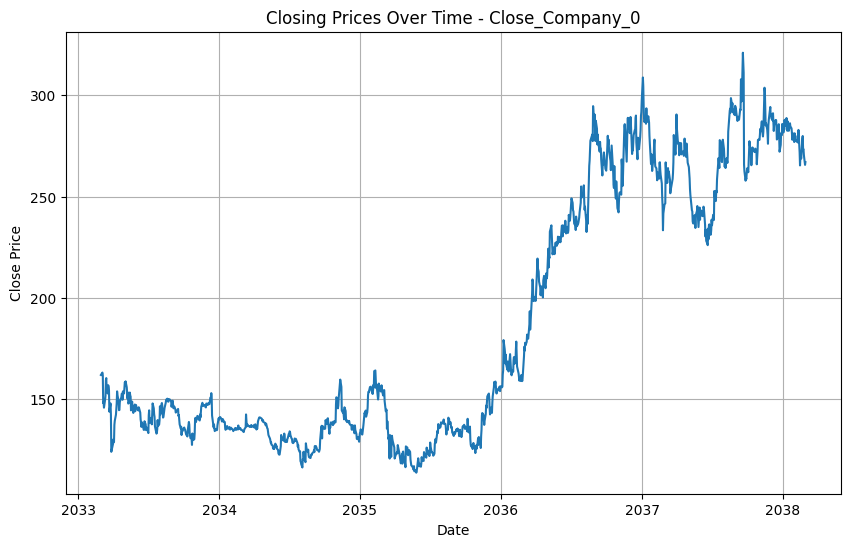

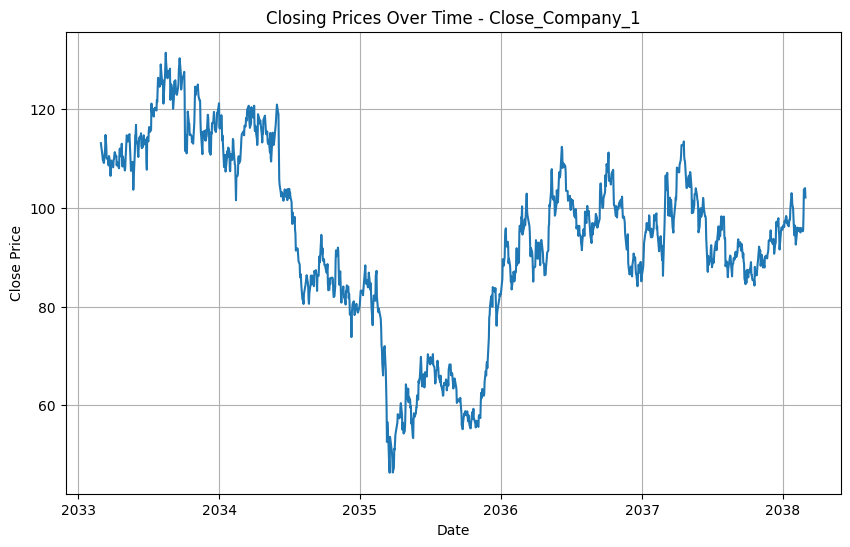

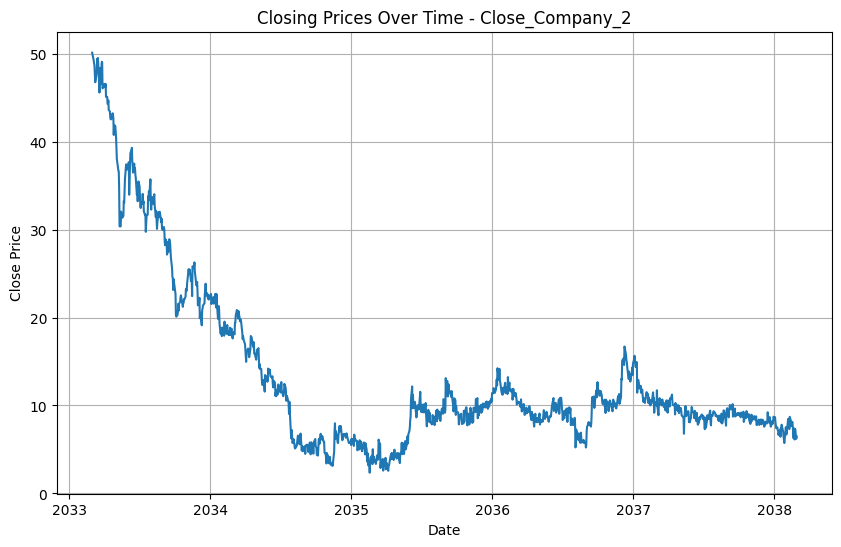

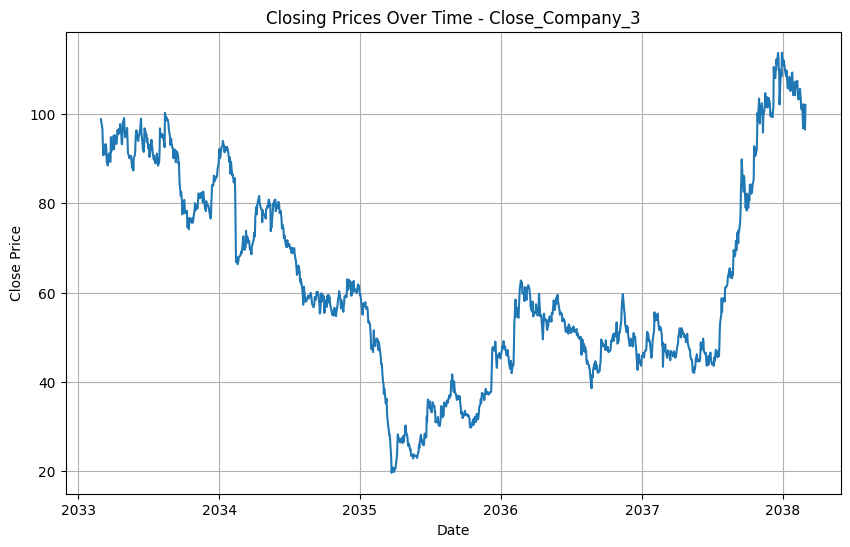

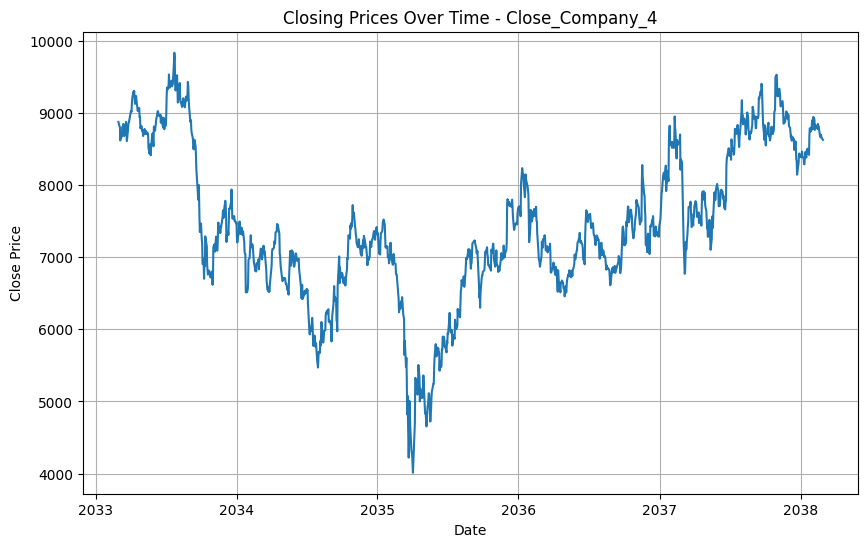

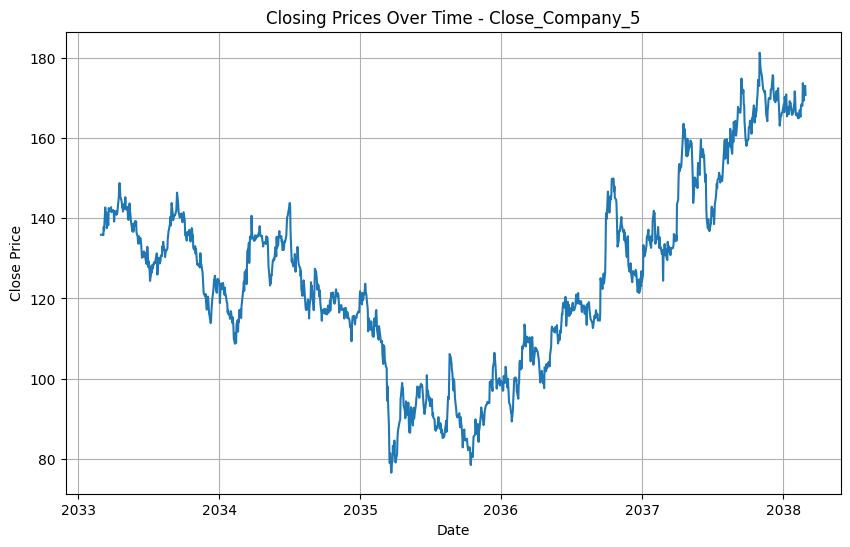

In [15]:
# Convert the 'Date' column to datetime format
df_closing['Date'] = pd.to_datetime(df_closing['Date'])

# Plot the closing prices of each company over time in separate graphs
for column in df_closing.columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(df_closing['Date'], df_closing[column])
    plt.title(f'Closing Prices Over Time - {column}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.show()


"Renaming Columns in DataFrame yt"


In [22]:
yt
yt.columns =['ds','y']
yt


,ds,y
0,2033-03-01,161.915062
1,2033-03-05,163.108507
2,2033-03-06,161.716298
3,2033-03-07,148.051907
4,2033-03-08,148.483368
...,...,...
1231,2038-02-22,273.183503
1232,2038-02-23,273.416583
1233,2038-02-24,270.560046
1234,2038-02-27,265.683943


#Visualization of Monthly and Weekly Seasonality for Each Company's Closing Prices.









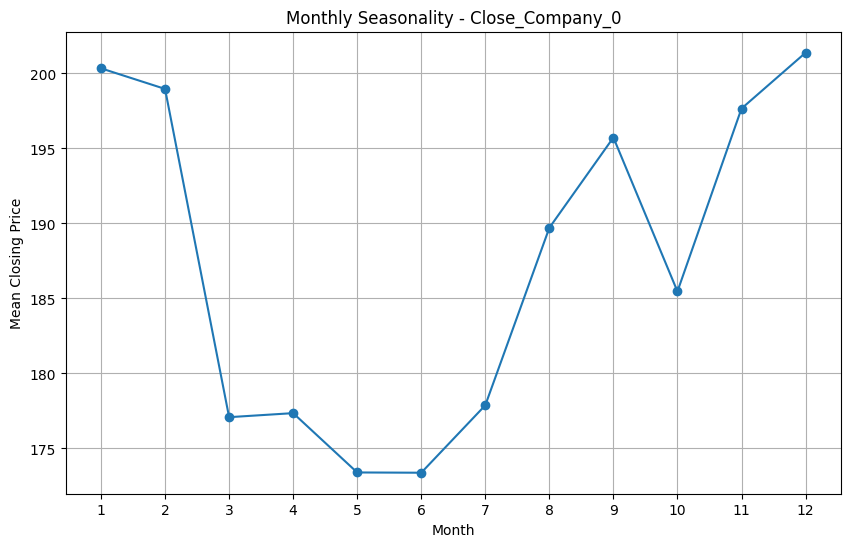

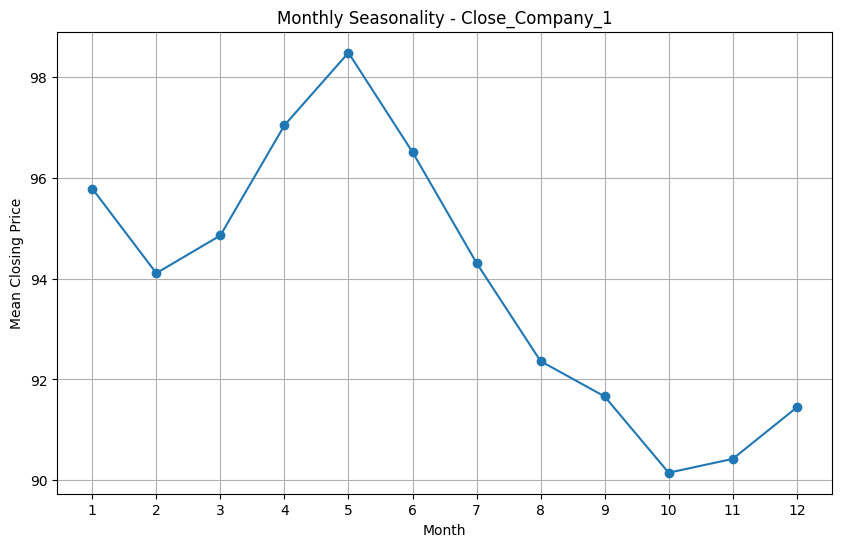

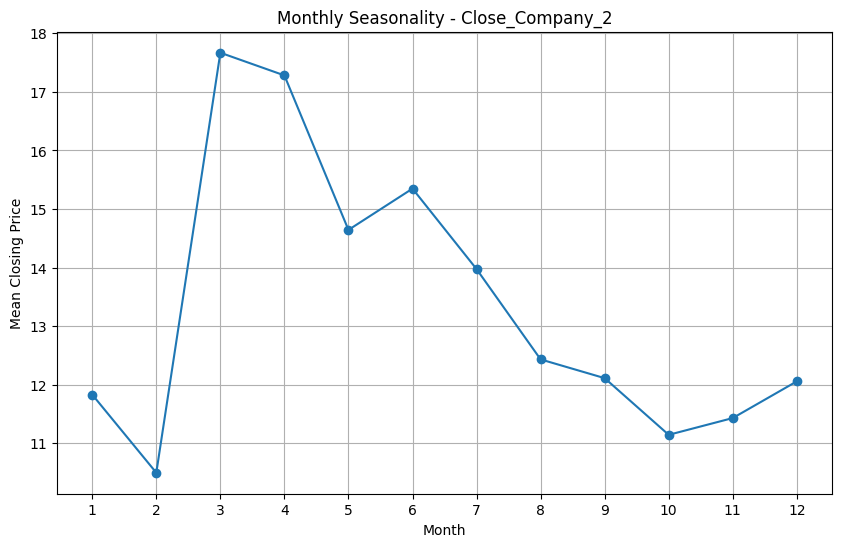

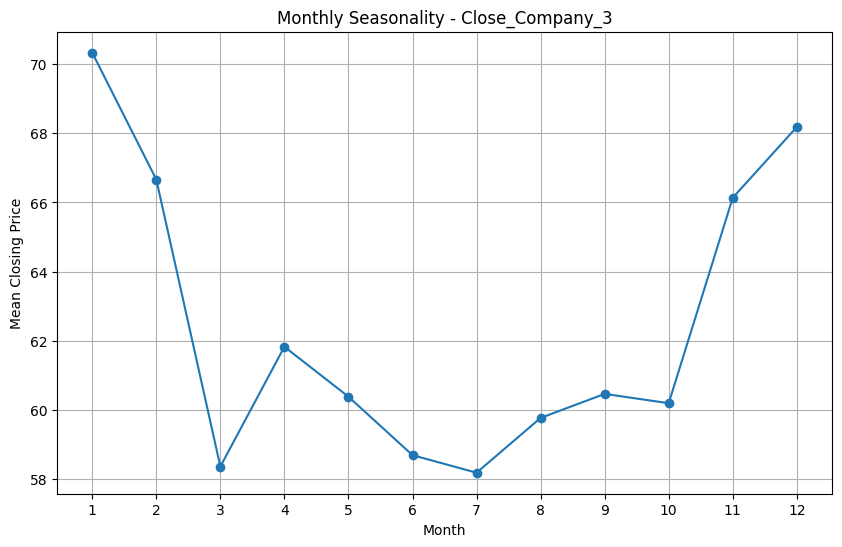

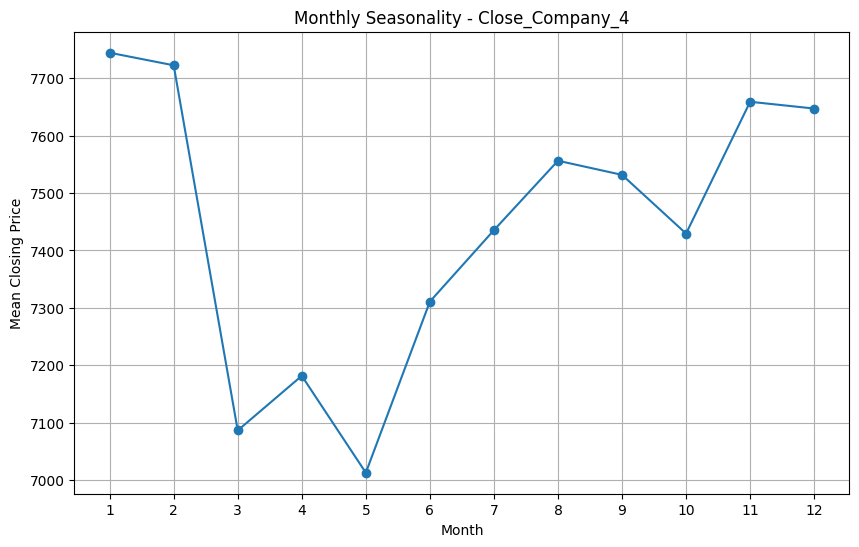

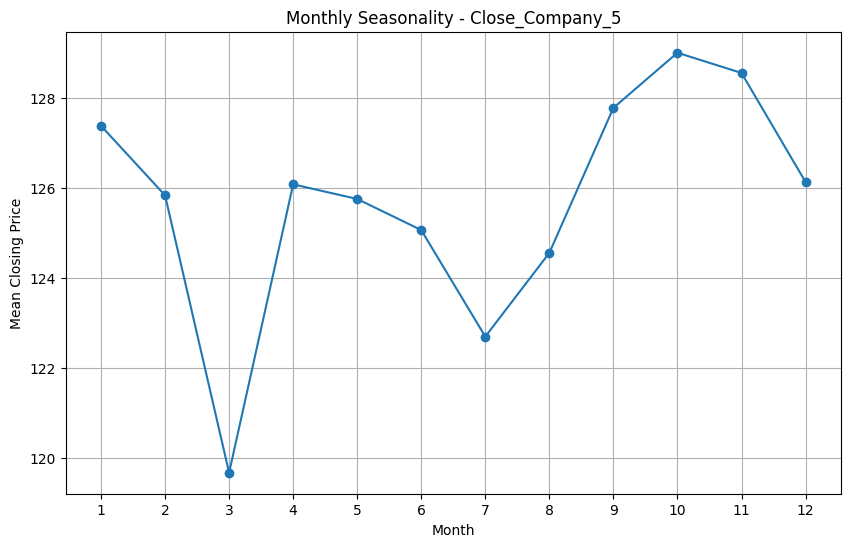

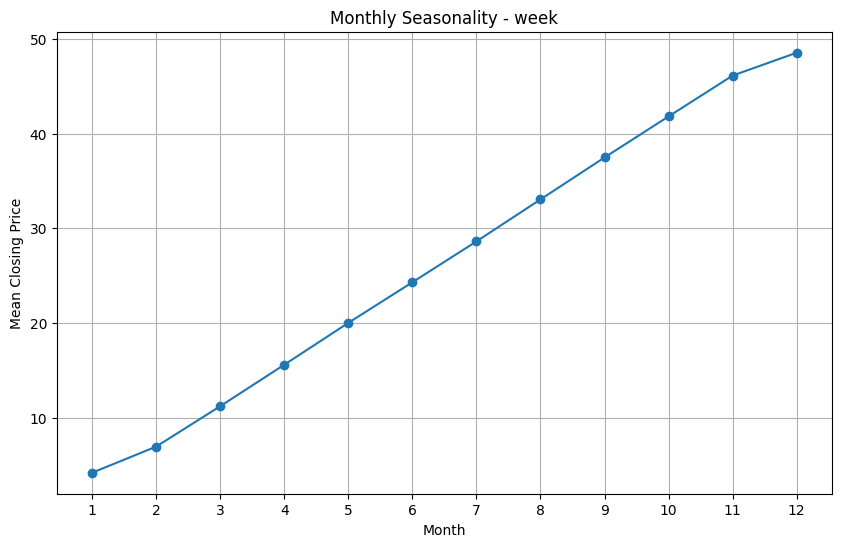

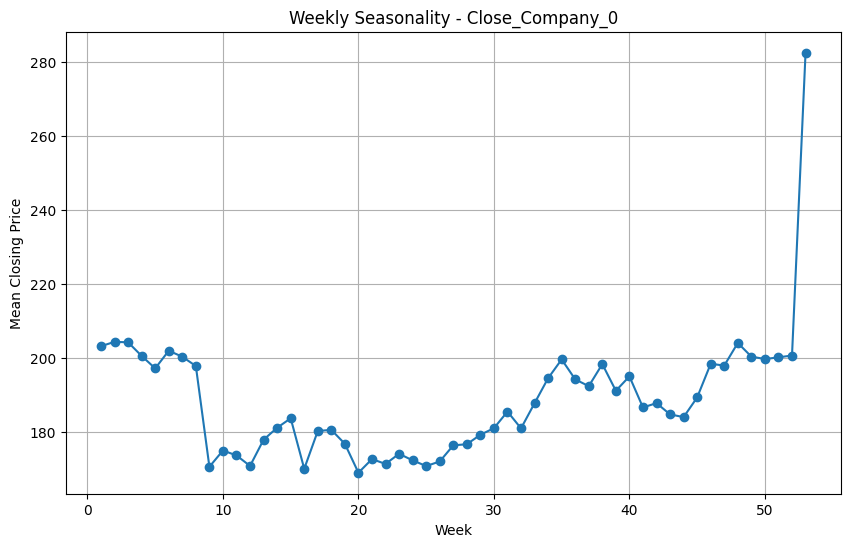

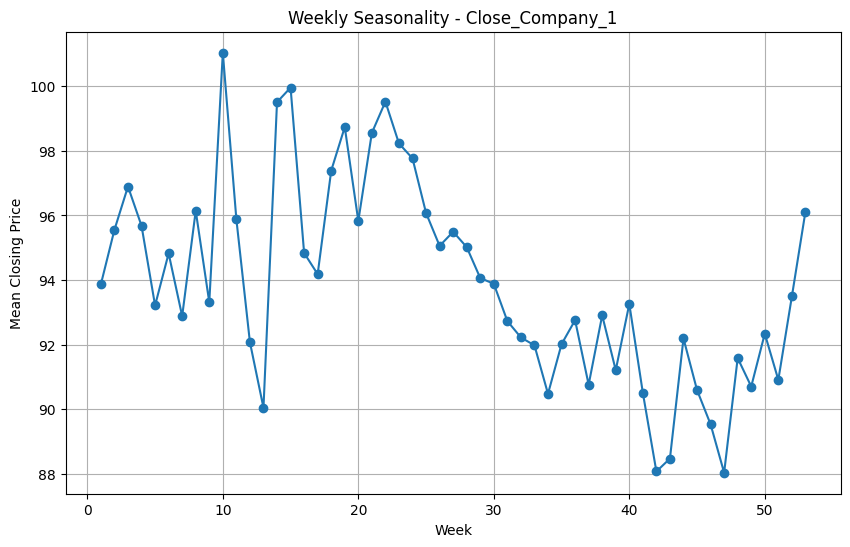

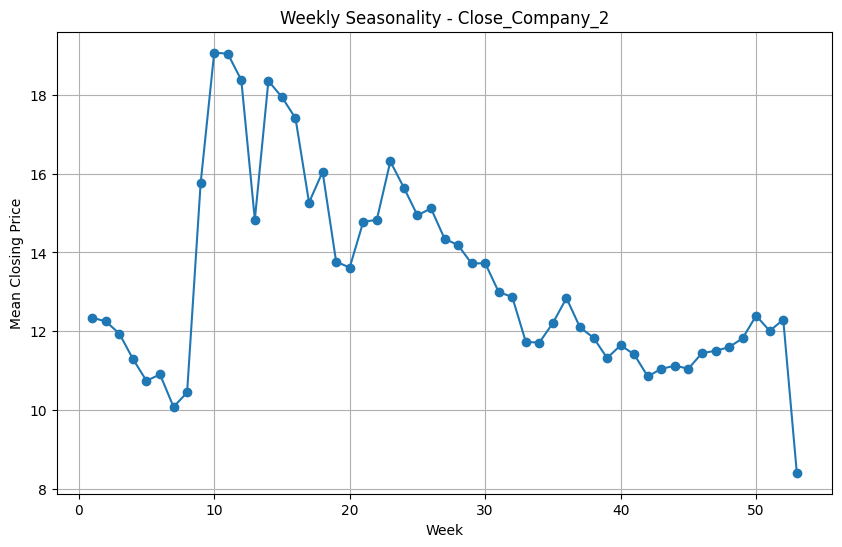

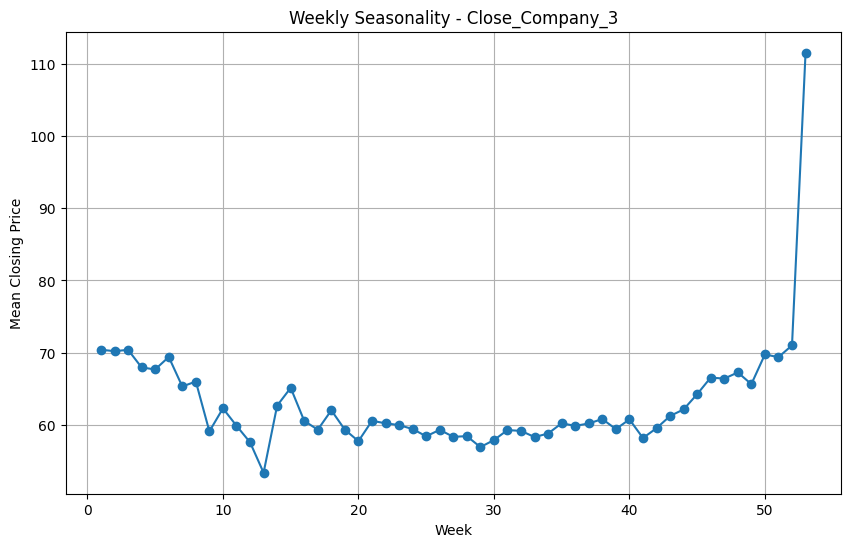

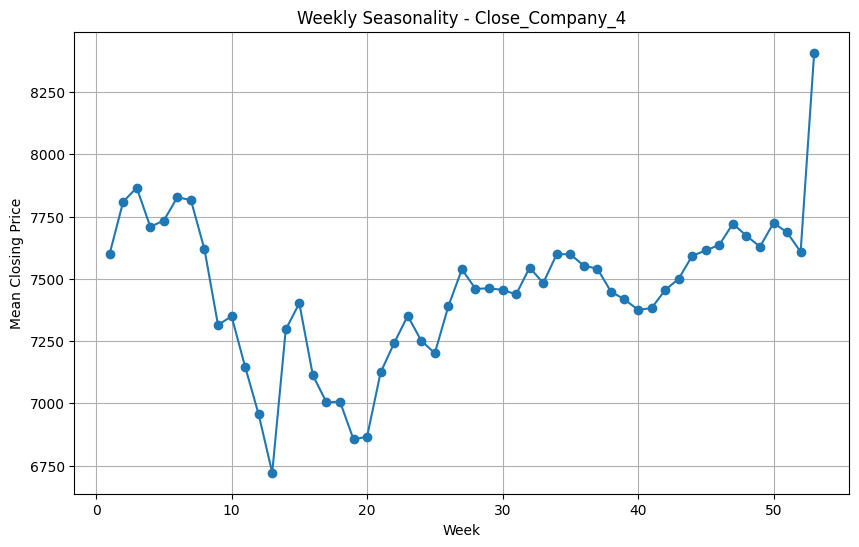

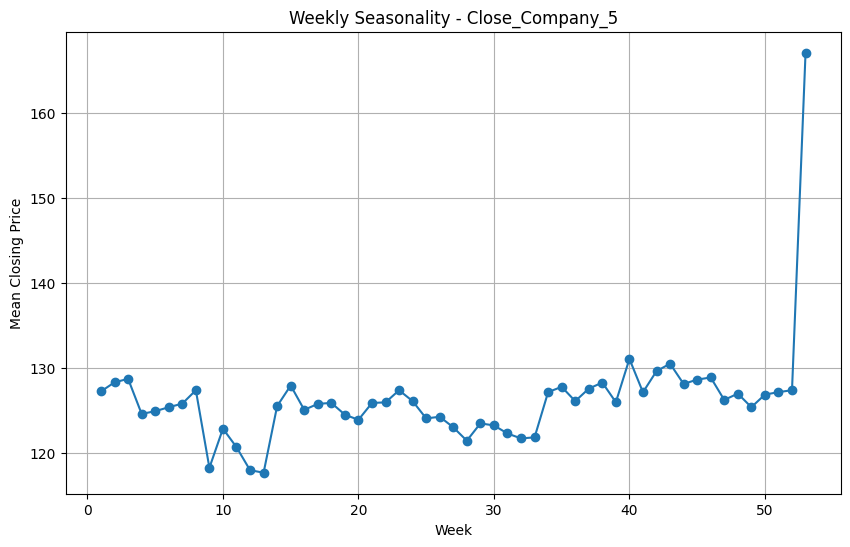

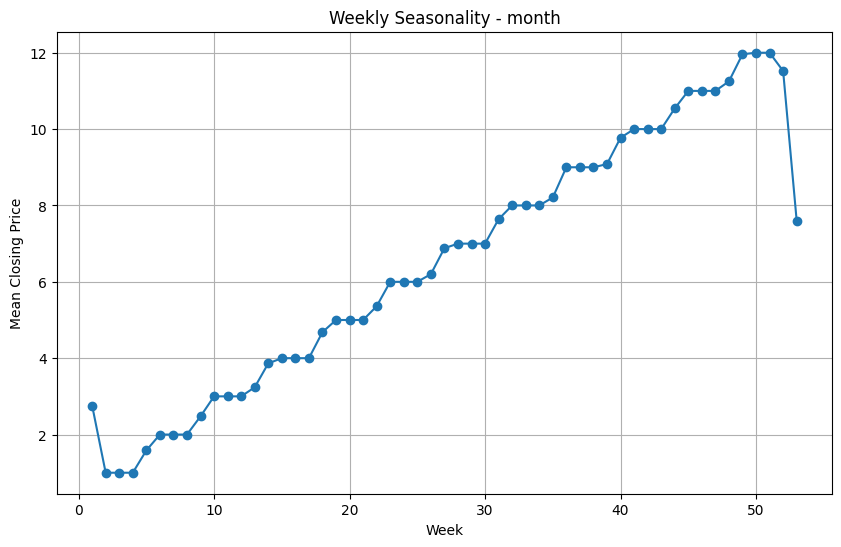

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert the 'Date' column to datetime format
df_closing['Date'] = pd.to_datetime(df_closing['Date'])

# Extract month and week from the date
df_closing['month'] = df_closing['Date'].dt.month
df_closing['week'] = df_closing['Date'].dt.isocalendar().week

# Calculate mean closing price for each month and week for each company
monthly_mean = df_closing.groupby('month').mean().iloc[:, 1:]
weekly_mean = df_closing.groupby('week').mean().iloc[:, 1:]

# Plot monthly seasonality for each company
for column in monthly_mean.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_mean.index, monthly_mean[column], marker='o', linestyle='-')
    plt.title(f'Monthly Seasonality - {column}')
    plt.xlabel('Month')
    plt.ylabel('Mean Closing Price')
    plt.grid(True)
    plt.xticks(range(1, 13))
    plt.show()

# Plot weekly seasonality for each company
for column in weekly_mean.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_mean.index, weekly_mean[column], marker='o', linestyle='-')
    plt.title(f'Weekly Seasonality - {column}')
    plt.xlabel('Week')
    plt.ylabel('Mean Closing Price')
    plt.grid(True)
    plt.show()


In [ ]:
# Splitting into train and test
to_row = int(len(yt)*0.9)
training_data = (yt[0:to_row])
training_data

,ds,y
0,2033-03-01,161.915062
1,2033-03-05,163.108507
2,2033-03-06,161.716298
3,2033-03-07,148.051907
4,2033-03-08,148.483368
...,...,...
1107,2037-08-25,292.926768
1108,2037-08-26,291.244747
1109,2037-08-29,290.257050
1110,2037-08-30,294.834177


In [ ]:
test_data = (yt[to_row:])
test_data

,ds,y
1112,2037-09-02,291.510764
1113,2037-09-05,287.367038
1114,2037-09-06,287.991991
1115,2037-09-07,289.431327
1116,2037-09-08,288.439989
...,...,...
1231,2038-02-22,273.183503
1232,2038-02-23,273.416583
1233,2038-02-24,270.560046
1234,2038-02-27,265.683943


In [ ]:
model_predictions = []








#"Hyperparameter Tuning with Prophet for company0"




In [ ]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Load and preprocessing  the data
# yt is your DataFrame with columns 'ds' (dates) and 'y' (closing prices)
yt.columns =['ds','y']
yt
# Split data into train and test sets
train_size = int(0.8 * len(yt))
train_df = yt[:train_size]
test_df = yt[train_size:]

# Define parameter grid for hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0],
    'changepoint_range': [0.8, 0.9],
    'interval_width': [0.8, 0.95],
    'n_changepoints': [25, 50]

}

# Generate combinations of hyperparameters from the parameter grid
param_combinations = list(ParameterGrid(param_grid))

# Initialize variables to store best hyperparameters and corresponding RMSE
best_params = None
best_rmse = float('inf')

# Iterate over parameter combinations
for params in param_combinations:
    # Initialize Prophet model with current hyperparameters
    model = Prophet(**params)

    # Fit the model on the training data
    model.fit(train_df)

    # Make predictions on the test data
    forecast = model.predict(test_df)

    # Calculate RMSE
    rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)

    # Update best hyperparameters if current RMSE is lower
    if rmse < best_rmse:
        best_params = params
        best_rmse = rmse

    # Print intermediate results to track progress
    print("Hyperparameters:", params)
    print("RMSE:", rmse)

# Print the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jpmrxgbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ih4126xq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62003', 'data', 'file=/tmp/tmpvof306cm/jpmrxgbd.json', 'init=/tmp/tmpvof306cm/ih4126xq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model92e08smn/prophet_model-20240313122911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvo

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.961392685236294


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xzaowwdq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7zkb5cxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12511', 'data', 'file=/tmp/tmpvof306cm/xzaowwdq.json', 'init=/tmp/tmpvof306cm/7zkb5cxp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelcqxpv2kt/prophet_model-20240313122912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.594471756762058


12:29:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9tkaom9_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4zmmd7pj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25477', 'data', 'file=/tmp/tmpvof306cm/9tkaom9_.json', 'init=/tmp/tmpvof306cm/4zmmd7pj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modell751fecl/prophet_model-20240313122913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.500872930134943


12:29:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jv6cp900.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/e0rjih0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76466', 'data', 'file=/tmp/tmpvof306cm/jv6cp900.json', 'init=/tmp/tmpvof306cm/e0rjih0r.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelksokw0r2/prophet_model-20240313122913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 26.620531382017777


12:29:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1xthoyv2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fez8dtvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63390', 'data', 'file=/tmp/tmpvof306cm/1xthoyv2.json', 'init=/tmp/tmpvof306cm/fez8dtvc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvrzhxha4/prophet_model-20240313122914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 28.007643101950762


12:29:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2vhz_dvb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zlacl4il.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63992', 'data', 'file=/tmp/tmpvof306cm/2vhz_dvb.json', 'init=/tmp/tmpvof306cm/zlacl4il.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelpspvicc0/prophet_model-20240313122914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 25.53585110530646


12:29:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7q2_kdo9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dzehs3r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37395', 'data', 'file=/tmp/tmpvof306cm/7q2_kdo9.json', 'init=/tmp/tmpvof306cm/dzehs3r6.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelbiywp2cz/prophet_model-20240313122915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.961392685236294


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ug303_rr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/g1ndg0em.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90187', 'data', 'file=/tmp/tmpvof306cm/ug303_rr.json', 'init=/tmp/tmpvof306cm/g1ndg0em.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelu_o9e88q/prophet_model-20240313122915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.594471756762058


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0ixlyp46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7kvcgwq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43545', 'data', 'file=/tmp/tmpvof306cm/0ixlyp46.json', 'init=/tmp/tmpvof306cm/7kvcgwq_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwhdi4n4f/prophet_model-20240313122915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.500872930134943


12:29:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3p46v9v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0rx3mmht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86756', 'data', 'file=/tmp/tmpvof306cm/3p46v9v2.json', 'init=/tmp/tmpvof306cm/0rx3mmht.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6aqulmg9/prophet_model-20240313122915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 26.620531382017777


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8ah3jh4d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/n3xm16i0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76000', 'data', 'file=/tmp/tmpvof306cm/8ah3jh4d.json', 'init=/tmp/tmpvof306cm/n3xm16i0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0khbfulv/prophet_model-20240313122916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 28.007643101950762


12:29:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/oximnspo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mvz8kwlc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65974', 'data', 'file=/tmp/tmpvof306cm/oximnspo.json', 'init=/tmp/tmpvof306cm/mvz8kwlc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modela6rix_0n/prophet_model-20240313122916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 25.53585110530646


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lcn0om14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3onlrpam.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65593', 'data', 'file=/tmp/tmpvof306cm/lcn0om14.json', 'init=/tmp/tmpvof306cm/3onlrpam.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqoucjm6o/prophet_model-20240313122916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.961392685236294


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hkz59u2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sr5scrhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56806', 'data', 'file=/tmp/tmpvof306cm/hkz59u2q.json', 'init=/tmp/tmpvof306cm/sr5scrhq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9m_aqk0f/prophet_model-20240313122917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.594471756762058


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4djl70ay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cpa48bfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34405', 'data', 'file=/tmp/tmpvof306cm/4djl70ay.json', 'init=/tmp/tmpvof306cm/cpa48bfe.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzoybmqym/prophet_model-20240313122917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.500872930134943


12:29:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/eiog_r_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/grobju92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7074', 'data', 'file=/tmp/tmpvof306cm/eiog_r_l.json', 'init=/tmp/tmpvof306cm/grobju92.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelep0syz29/prophet_model-20240313122917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 26.620531382017777


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/67w1vdmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zl2ji6mt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12256', 'data', 'file=/tmp/tmpvof306cm/67w1vdmh.json', 'init=/tmp/tmpvof306cm/zl2ji6mt.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelojkjb8el/prophet_model-20240313122918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 28.007643101950762


12:29:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2xg3memi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/54k4fegp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94362', 'data', 'file=/tmp/tmpvof306cm/2xg3memi.json', 'init=/tmp/tmpvof306cm/54k4fegp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeli765wggl/prophet_model-20240313122918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 25.53585110530646


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/09racbsn.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.961392685236294


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_i54agih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98489', 'data', 'file=/tmp/tmpvof306cm/09racbsn.json', 'init=/tmp/tmpvof306cm/_i54agih.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhsrkursj/prophet_model-20240313122918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w3dpd2um.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9b8igcnc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.594471756762058


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4sc9r65r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9cll5gt4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91605', 'data', 'file=/tmp/tmpvof306cm/4sc9r65r.json', 'init=/tmp/tmpvof306cm/9cll5gt4.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelf94l8quz/prophet_model-20240313122919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.500872930134943


12:29:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bidh2ypm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hz5ixppc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61426', 'data', 'file=/tmp/tmpvof306cm/bidh2ypm.json', 'init=/tmp/tmpvof306cm/hz5ixppc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldfdecgqz/prophet_model-20240313122919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 26.620531382017777


12:29:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6ko6nsbv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/eenuf539.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38550', 'data', 'file=/tmp/tmpvof306cm/6ko6nsbv.json', 'init=/tmp/tmpvof306cm/eenuf539.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model83yrpcan/prophet_model-20240313122920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 28.007643101950762


12:29:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2tjim4xk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gvb33u7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18601', 'data', 'file=/tmp/tmpvof306cm/2tjim4xk.json', 'init=/tmp/tmpvof306cm/gvb33u7u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7vsdpf6x/prophet_model-20240313122920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 25.53585110530646


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cvt4lpqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dijjy8vj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15829', 'data', 'file=/tmp/tmpvof306cm/cvt4lpqn.json', 'init=/tmp/tmpvof306cm/dijjy8vj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelnsaxeeij/prophet_model-20240313122920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.961392685236294


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qmfk8guo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yzxmzpkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41868', 'data', 'file=/tmp/tmpvof306cm/qmfk8guo.json', 'init=/tmp/tmpvof306cm/yzxmzpkn.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modellzzgdm3z/prophet_model-20240313122921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.594471756762058


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/iqwxibs5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kth4gc02.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3596', 'data', 'file=/tmp/tmpvof306cm/iqwxibs5.json', 'init=/tmp/tmpvof306cm/kth4gc02.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqovfmwk0/prophet_model-20240313122921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.500872930134943


12:29:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/63654xzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/g1si9myt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27492', 'data', 'file=/tmp/tmpvof306cm/63654xzx.json', 'init=/tmp/tmpvof306cm/g1si9myt.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelict0j_w7/prophet_model-20240313122921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 26.620531382017777


12:29:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4_pga4dp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w796gjac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10514', 'data', 'file=/tmp/tmpvof306cm/4_pga4dp.json', 'init=/tmp/tmpvof306cm/w796gjac.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldf11l787/prophet_model-20240313122922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 28.007643101950762


12:29:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/op8ictfk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xk9elf18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26107', 'data', 'file=/tmp/tmpvof306cm/op8ictfk.json', 'init=/tmp/tmpvof306cm/xk9elf18.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelnzkggbq7/prophet_model-20240313122922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 25.53585110530646


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fckr3p_9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uwm_wp7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23953', 'data', 'file=/tmp/tmpvof306cm/fckr3p_9.json', 'init=/tmp/tmpvof306cm/uwm_wp7v.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelponl3aq1/prophet_model-20240313122922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.961392685236294


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a4zmyghr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yn833s8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62596', 'data', 'file=/tmp/tmpvof306cm/a4zmyghr.json', 'init=/tmp/tmpvof306cm/yn833s8h.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxvco4b6n/prophet_model-20240313122923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.594471756762058


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jvzblftv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bk_sko5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83644', 'data', 'file=/tmp/tmpvof306cm/jvzblftv.json', 'init=/tmp/tmpvof306cm/bk_sko5y.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelpwtabo8c/prophet_model-20240313122923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.500872930134943


12:29:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gbhxmbw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lawi3m02.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76235', 'data', 'file=/tmp/tmpvof306cm/gbhxmbw7.json', 'init=/tmp/tmpvof306cm/lawi3m02.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9to5ybwr/prophet_model-20240313122923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:23 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 26.620531382017777


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o9hqw705.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tdzxr_i9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80358', 'data', 'file=/tmp/tmpvof306cm/o9hqw705.json', 'init=/tmp/tmpvof306cm/tdzxr_i9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelc97sm2c4/prophet_model-20240313122924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 28.007643101950762


12:29:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uw557cwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/g65gc4yx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47434', 'data', 'file=/tmp/tmpvof306cm/uw557cwx.json', 'init=/tmp/tmpvof306cm/g65gc4yx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelu49tmm6k/prophet_model-20240313122924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 25.53585110530646


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lqvy0_ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/76d63zen.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15317', 'data', 'file=/tmp/tmpvof306cm/lqvy0_ig.json', 'init=/tmp/tmpvof306cm/76d63zen.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldzpl084t/prophet_model-20240313122924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 28.263392182773362


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rb49kidx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xwmygpwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63373', 'data', 'file=/tmp/tmpvof306cm/rb49kidx.json', 'init=/tmp/tmpvof306cm/xwmygpwp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3oyyzdy2/prophet_model-20240313122925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.634891132599666


12:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mjd1z5va.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dx0kcb57.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2078', 'data', 'file=/tmp/tmpvof306cm/mjd1z5va.json', 'init=/tmp/tmpvof306cm/dx0kcb57.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelatw54au0/prophet_model-20240313122925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 27.718248381535382


12:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ofmk09yu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x84a368o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94179', 'data', 'file=/tmp/tmpvof306cm/ofmk09yu.json', 'init=/tmp/tmpvof306cm/x84a368o.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelo3gikxfp/prophet_model-20240313122926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 37.21846443826519


12:29:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ft888vzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hp537xpu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 26.874440484963905


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6649', 'data', 'file=/tmp/tmpvof306cm/ft888vzj.json', 'init=/tmp/tmpvof306cm/hp537xpu.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelkqr9zjzk/prophet_model-20240313122926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kqe9kigm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ew1ejlq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90236', 'data', 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 27.16749622793619


12:29:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ww9in_1_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ezjkupke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94604', 'data', 'file=/tmp/tmpvof306cm/ww9in_1_.json', 'init=/tmp/tmpvof306cm/ezjkupke.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelz8hudrfd/prophet_model-20240313122927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 28.263392182773362


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sn4rj70o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mtashlna.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60964', 'data', 'file=/tmp/tmpvof306cm/sn4rj70o.json', 'init=/tmp/tmpvof306cm/mtashlna.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsofbju0w/prophet_model-20240313122927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.634891132599666


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xcvc5ouf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_t7bu115.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32754', 'data', 'file=/tmp/tmpvof306cm/xcvc5ouf.json', 'init=/tmp/tmpvof306cm/_t7bu115.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelud7flxfa/prophet_model-20240313122928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 27.718248381535382


12:29:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/saheueaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/enhgptln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72413', 'data', 'file=/tmp/tmpvof306cm/saheueaa.json', 'init=/tmp/tmpvof306cm/enhgptln.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvgbaijlr/prophet_model-20240313122928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 37.21846443826519


12:29:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/erao5anz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qu5vg0wo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97598', 'data', 'file=/tmp/tmpvof306cm/erao5anz.json', 'init=/tmp/tmpvof306cm/qu5vg0wo.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeliv45kdc7/prophet_model-20240313122928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 26.874440484963905


12:29:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zeudeh38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/28jrzg4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52490', 'data', 'file=/tmp/tmpvof306cm/zeudeh38.json', 'init=/tmp/tmpvof306cm/28jrzg4y.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqzq51myn/prophet_model-20240313122929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:29 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 27.16749622793619


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/227hafyk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5vlnk7h7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24645', 'data', 'file=/tmp/tmpvof306cm/227hafyk.json', 'init=/tmp/tmpvof306cm/5vlnk7h7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelw0c39fpv/prophet_model-20240313122929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 28.263392182773362


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vi7vwmq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1stkx3vw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6145', 'data', 'file=/tmp/tmpvof306cm/vi7vwmq4.json', 'init=/tmp/tmpvof306cm/1stkx3vw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8xnjl4o1/prophet_model-20240313122929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.634891132599666


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/npwottlh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2md9ly75.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44708', 'data', 'file=/tmp/tmpvof306cm/npwottlh.json', 'init=/tmp/tmpvof306cm/2md9ly75.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelp8i7pt5y/prophet_model-20240313122930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 27.718248381535382


12:29:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wom1112s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b2are6g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17009', 'data', 'file=/tmp/tmpvof306cm/wom1112s.json', 'init=/tmp/tmpvof306cm/b2are6g0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5mwwomns/prophet_model-20240313122930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 37.21846443826519


12:29:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qmru89yq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/eukmeol3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3536', 'data', 'file=/tmp/tmpvof306cm/qmru89yq.json', 'init=/tmp/tmpvof306cm/eukmeol3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modell8bl912k/prophet_model-20240313122930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 26.874440484963905


12:29:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/og82lhns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1v05oztm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60494', 'data', 'file=/tmp/tmpvof306cm/og82lhns.json', 'init=/tmp/tmpvof306cm/1v05oztm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzijhv311/prophet_model-20240313122931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 27.16749622793619


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bxvw7qdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o3if8dm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92146', 'data', 'file=/tmp/tmpvof306cm/bxvw7qdr.json', 'init=/tmp/tmpvof306cm/o3if8dm1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model54cnm0dg/prophet_model-20240313122931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 28.263392182773362


12:29:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7amtdn0z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m3stb3n0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72526', 'data', 'file=/tmp/tmpvof306cm/7amtdn0z.json', 'init=/tmp/tmpvof306cm/m3stb3n0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldrrz0m8t/prophet_model-20240313122931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.634891132599666


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yrlhe0u_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/msbvmvyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36008', 'data', 'file=/tmp/tmpvof306cm/yrlhe0u_.json', 'init=/tmp/tmpvof306cm/msbvmvyd.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsfew194s/prophet_model-20240313122931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 27.718248381535382


12:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lrbv3lm9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a321bar1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16428', 'data', 'file=/tmp/tmpvof306cm/lrbv3lm9.json', 'init=/tmp/tmpvof306cm/a321bar1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelg6yu808_/prophet_model-20240313122932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 37.21846443826519


12:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m8mpxjho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/n9btits0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62843', 'data', 'file=/tmp/tmpvof306cm/m8mpxjho.json', 'init=/tmp/tmpvof306cm/n9btits0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelh2l3axwe/prophet_model-20240313122932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 26.874440484963905


12:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/315dgaii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fyziu4gx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21188', 'data', 'file=/tmp/tmpvof306cm/315dgaii.json', 'init=/tmp/tmpvof306cm/fyziu4gx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6p6kh6ki/prophet_model-20240313122932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 27.16749622793619


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uhqa_lb4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ag_x14bf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3083', 'data', 'file=/tmp/tmpvof306cm/uhqa_lb4.json', 'init=/tmp/tmpvof306cm/ag_x14bf.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeld3zc8qfv/prophet_model-20240313122933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 28.263392182773362


12:29:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gln4hdht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9ecop34u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70807', 'data', 'file=/tmp/tmpvof306cm/gln4hdht.json', 'init=/tmp/tmpvof306cm/9ecop34u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelctyddvfj/prophet_model-20240313122933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.634891132599666


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rck8vsdu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ntxnn0k8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98776', 'data', 'file=/tmp/tmpvof306cm/rck8vsdu.json', 'init=/tmp/tmpvof306cm/ntxnn0k8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelc4r2kqg6/prophet_model-20240313122933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 27.718248381535382


12:29:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u4j9sf52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6al8dsst.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10146', 'data', 'file=/tmp/tmpvof306cm/u4j9sf52.json', 'init=/tmp/tmpvof306cm/6al8dsst.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7z6zwuev/prophet_model-20240313122934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 37.21846443826519


12:29:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ihlwpcwd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/i21ko0ka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43584', 'data', 'file=/tmp/tmpvof306cm/ihlwpcwd.json', 'init=/tmp/tmpvof306cm/i21ko0ka.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelin3eoo8l/prophet_model-20240313122934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 26.874440484963905


12:29:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rbhh5uhs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3_pz8l9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55098', 'data', 'file=/tmp/tmpvof306cm/rbhh5uhs.json', 'init=/tmp/tmpvof306cm/3_pz8l9k.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model573k4x3a/prophet_model-20240313122934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 27.16749622793619


12:29:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m4do4tg8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/683_5j1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24328', 'data', 'file=/tmp/tmpvof306cm/m4do4tg8.json', 'init=/tmp/tmpvof306cm/683_5j1r.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modellsfgqgsc/prophet_model-20240313122935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 28.263392182773362


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/15poq5_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/14flphs4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48164', 'data', 'file=/tmp/tmpvof306cm/15poq5_c.json', 'init=/tmp/tmpvof306cm/14flphs4.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzi2ex2fc/prophet_model-20240313122935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 26.634891132599666


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9vqhg2l1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rtpgxj8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14445', 'data', 'file=/tmp/tmpvof306cm/9vqhg2l1.json', 'init=/tmp/tmpvof306cm/rtpgxj8x.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model02n4l8nl/prophet_model-20240313122935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 27.718248381535382


12:29:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/57oljz0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dctgb2ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56772', 'data', 'file=/tmp/tmpvof306cm/57oljz0o.json', 'init=/tmp/tmpvof306cm/dctgb2ii.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5l90bnq0/prophet_model-20240313122936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 37.21846443826519


12:29:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m0dxae8j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sf7p7xcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40742', 'data', 'file=/tmp/tmpvof306cm/m0dxae8j.json', 'init=/tmp/tmpvof306cm/sf7p7xcs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeln6wc67z5/prophet_model-20240313122936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 26.874440484963905


12:29:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6i0mie06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p1_oe38u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88599', 'data', 'file=/tmp/tmpvof306cm/6i0mie06.json', 'init=/tmp/tmpvof306cm/p1_oe38u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model72g1uh5l/prophet_model-20240313122936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 27.16749622793619


12:29:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c58xuv2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mdtbiur4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4431', 'data', 'file=/tmp/tmpvof306cm/c58xuv2o.json', 'init=/tmp/tmpvof306cm/mdtbiur4.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelv_13xrp0/prophet_model-20240313122937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 90.86158412412782


12:29:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8hmz32fm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cyup2agw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58172', 'data', 'file=/tmp/tmpvof306cm/8hmz32fm.json', 'init=/tmp/tmpvof306cm/cyup2agw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5l5nw85r/prophet_model-20240313122937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 93.12987287556055


12:29:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zg2okc9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b3pdqd2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48073', 'data', 'file=/tmp/tmpvof306cm/zg2okc9p.json', 'init=/tmp/tmpvof306cm/b3pdqd2c.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7dh2oafx/prophet_model-20240313122938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 89.2213536314725


12:29:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6_pwogtz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cxrpqrgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73717', 'data', 'file=/tmp/tmpvof306cm/6_pwogtz.json', 'init=/tmp/tmpvof306cm/cxrpqrgb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelap0zapvd/prophet_model-20240313122938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 94.11078417272408


12:29:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qoqdcdze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jz3bis2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81203', 'data', 'file=/tmp/tmpvof306cm/qoqdcdze.json', 'init=/tmp/tmpvof306cm/jz3bis2c.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgk0570b0/prophet_model-20240313122939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 95.01472232796914


12:29:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/65fu0d3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/suw4by7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70597', 'data', 'file=/tmp/tmpvof306cm/65fu0d3y.json', 'init=/tmp/tmpvof306cm/suw4by7c.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelaldgly67/prophet_model-20240313122939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 94.28861792687293


12:29:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3yelpyye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mro3dq_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90619', 'data', 'file=/tmp/tmpvof306cm/3yelpyye.json', 'init=/tmp/tmpvof306cm/mro3dq_m.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2rgoqvyj/prophet_model-20240313122940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 90.86158412412782


12:29:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9g8dc83u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rojqpc7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41626', 'data', 'file=/tmp/tmpvof306cm/9g8dc83u.json', 'init=/tmp/tmpvof306cm/rojqpc7_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltx37z0ws/prophet_model-20240313122940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 93.12987287556055


12:29:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zetde19j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ma_gbda2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65654', 'data', 'file=/tmp/tmpvof306cm/zetde19j.json', 'init=/tmp/tmpvof306cm/ma_gbda2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelu_g_fyfv/prophet_model-20240313122941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 89.2213536314725


12:29:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8dobyj_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/iddgdlj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79956', 'data', 'file=/tmp/tmpvof306cm/8dobyj_f.json', 'init=/tmp/tmpvof306cm/iddgdlj4.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelos8uod22/prophet_model-20240313122941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 94.11078417272408


12:29:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kgmk79f8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/r5aflmok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51615', 'data', 'file=/tmp/tmpvof306cm/kgmk79f8.json', 'init=/tmp/tmpvof306cm/r5aflmok.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model07dxcrk0/prophet_model-20240313122941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 95.01472232796914


12:29:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/olnbs9yt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5mrxjd18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80435', 'data', 'file=/tmp/tmpvof306cm/olnbs9yt.json', 'init=/tmp/tmpvof306cm/5mrxjd18.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltkc_femu/prophet_model-20240313122942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 94.28861792687293


12:29:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/50g64_zn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o5atwxzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12165', 'data', 'file=/tmp/tmpvof306cm/50g64_zn.json', 'init=/tmp/tmpvof306cm/o5atwxzp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modele1eiebzq/prophet_model-20240313122942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 90.86158412412782


12:29:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/r_02f4p5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bx0861t8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69395', 'data', 'file=/tmp/tmpvof306cm/r_02f4p5.json', 'init=/tmp/tmpvof306cm/bx0861t8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9cjqhk8i/prophet_model-20240313122942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 93.12987287556055


12:29:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pzw5fl30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y4v4_93n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9994', 'data', 'file=/tmp/tmpvof306cm/pzw5fl30.json', 'init=/tmp/tmpvof306cm/y4v4_93n.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelrz610jk8/prophet_model-20240313122943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 89.2213536314725


12:29:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2jgf7v_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mdx1rs7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19583', 'data', 'file=/tmp/tmpvof306cm/2jgf7v_n.json', 'init=/tmp/tmpvof306cm/mdx1rs7e.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelraoefo3_/prophet_model-20240313122943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 94.11078417272408


12:29:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0cgplnoy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yvpq3fra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79910', 'data', 'file=/tmp/tmpvof306cm/0cgplnoy.json', 'init=/tmp/tmpvof306cm/yvpq3fra.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelcihobfk3/prophet_model-20240313122943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 95.01472232796914


12:29:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4a_gysdv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0ard7z6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 94.28861792687293


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62774', 'data', 'file=/tmp/tmpvof306cm/4a_gysdv.json', 'init=/tmp/tmpvof306cm/0ard7z6y.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model29_5e24l/prophet_model-20240313122944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/war6yh61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rzakdmzr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95295', 'data',

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 90.86158412412782


12:29:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/e4y5_h96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3ek34w2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62865', 'data', 'file=/tmp/tmpvof306cm/e4y5_h96.json', 'init=/tmp/tmpvof306cm/3ek34w2w.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelra6slk0j/prophet_model-20240313122945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 93.12987287556055


12:29:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j3xkmz7a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9kxk5g29.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81822', 'data', 'file=/tmp/tmpvof306cm/j3xkmz7a.json', 'init=/tmp/tmpvof306cm/9kxk5g29.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelreimjzif/prophet_model-20240313122945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 89.2213536314725


12:29:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/91kjsp_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x9kaxelj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59495', 'data', 'file=/tmp/tmpvof306cm/91kjsp_5.json', 'init=/tmp/tmpvof306cm/x9kaxelj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelm44c90o3/prophet_model-20240313122945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 94.11078417272408


12:29:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/h5kmn_y8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/43nvxzbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38374', 'data', 'file=/tmp/tmpvof306cm/h5kmn_y8.json', 'init=/tmp/tmpvof306cm/43nvxzbo.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelz9gmvb2h/prophet_model-20240313122946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 95.01472232796914


12:29:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a1oftqfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/09ak1bvs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67674', 'data', 'file=/tmp/tmpvof306cm/a1oftqfb.json', 'init=/tmp/tmpvof306cm/09ak1bvs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelb4sym9df/prophet_model-20240313122946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 94.28861792687293


12:29:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/60si9wcg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k_fu6crh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64026', 'data', 'file=/tmp/tmpvof306cm/60si9wcg.json', 'init=/tmp/tmpvof306cm/k_fu6crh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltgb63mnk/prophet_model-20240313122947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 90.86158412412782


12:29:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/odp6jsta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_dgivp3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64378', 'data', 'file=/tmp/tmpvof306cm/odp6jsta.json', 'init=/tmp/tmpvof306cm/_dgivp3z.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelrbpdk9ai/prophet_model-20240313122947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 93.12987287556055


12:29:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z00an3em.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sx6a4bap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35844', 'data', 'file=/tmp/tmpvof306cm/z00an3em.json', 'init=/tmp/tmpvof306cm/sx6a4bap.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgp6gcwk4/prophet_model-20240313122947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 89.2213536314725


12:29:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ig6ov_bx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/40mrhrfy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54075', 'data', 'file=/tmp/tmpvof306cm/ig6ov_bx.json', 'init=/tmp/tmpvof306cm/40mrhrfy.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeluodqo6nn/prophet_model-20240313122948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 94.11078417272408


12:29:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jzb9akmr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1fbo35p5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18106', 'data', 'file=/tmp/tmpvof306cm/jzb9akmr.json', 'init=/tmp/tmpvof306cm/1fbo35p5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3zgm59z_/prophet_model-20240313122948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 95.01472232796914


12:29:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cj_tq9q7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_iobcsw9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67355', 'data', 'file=/tmp/tmpvof306cm/cj_tq9q7.json', 'init=/tmp/tmpvof306cm/_iobcsw9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modela_zas0g5/prophet_model-20240313122948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 94.28861792687293


12:29:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9_uuudtv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_kqne8fk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91135', 'data', 'file=/tmp/tmpvof306cm/9_uuudtv.json', 'init=/tmp/tmpvof306cm/_kqne8fk.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6jruk6f9/prophet_model-20240313122949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 90.86158412412782


12:29:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uly7snom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b06ixoxh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10016', 'data', 'file=/tmp/tmpvof306cm/uly7snom.json', 'init=/tmp/tmpvof306cm/b06ixoxh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8u16v4em/prophet_model-20240313122949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 93.12987287556055


12:29:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u5uxey7g.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 89.2213536314725


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7dq4e0yo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2449', 'data', 'file=/tmp/tmpvof306cm/u5uxey7g.json', 'init=/tmp/tmpvof306cm/7dq4e0yo.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltv4zv104/prophet_model-20240313122950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tcg0410_.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 94.11078417272408


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1_4px_su.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9593', 'data', 'file=/tmp/tmpvof306cm/tcg0410_.json', 'init=/tmp/tmpvof306cm/1_4px_su.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model4s4cvj_l/prophet_model-20240313122951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6vhy16sk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rhltrd82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 95.01472232796914


12:29:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7xadwdhn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fh_49ukl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39703', 'data', 'file=/tmp/tmpvof306cm/7xadwdhn.json', 'init=/tmp/tmpvof306cm/fh_49ukl.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvgcfb0od/prophet_model-20240313122952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 94.28861792687293


12:29:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7625cp5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7uun8nz9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67840', 'data', 'file=/tmp/tmpvof306cm/7625cp5b.json', 'init=/tmp/tmpvof306cm/7uun8nz9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0ka3cs52/prophet_model-20240313122953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 44.049472218242336


12:29:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o45zp5vr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gjfn8j2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31120', 'data', 'file=/tmp/tmpvof306cm/o45zp5vr.json', 'init=/tmp/tmpvof306cm/gjfn8j2e.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modela4b_4y56/prophet_model-20240313122953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 50.28330172138013


12:29:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qh2jdg0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3wncr6rx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4493', 'data', 'file=/tmp/tmpvof306cm/qh2jdg0s.json', 'init=/tmp/tmpvof306cm/3wncr6rx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2uonm7pd/prophet_model-20240313122953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.83940552658494


12:29:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f3_kcq75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/digpmruy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73713', 'data', 'file=/tmp/tmpvof306cm/f3_kcq75.json', 'init=/tmp/tmpvof306cm/digpmruy.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model36e4zt6x/prophet_model-20240313122954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 42.33065771672519


12:29:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u7m3ocgl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gns7m90o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23567', 'data', 'file=/tmp/tmpvof306cm/u7m3ocgl.json', 'init=/tmp/tmpvof306cm/gns7m90o.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelmxq4fdwd/prophet_model-20240313122954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.29593941602


12:29:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3425691m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9v82s67t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90946', 'data', 'file=/tmp/tmpvof306cm/3425691m.json', 'init=/tmp/tmpvof306cm/9v82s67t.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltapv8rg0/prophet_model-20240313122955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 41.49410779231737


12:29:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hdzj4pde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/iy9zh8lo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98286', 'data', 'file=/tmp/tmpvof306cm/hdzj4pde.json', 'init=/tmp/tmpvof306cm/iy9zh8lo.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelw37iooud/prophet_model-20240313122955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 44.049472218242336


12:29:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/87diohl4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fbjaa6_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18985', 'data', 'file=/tmp/tmpvof306cm/87diohl4.json', 'init=/tmp/tmpvof306cm/fbjaa6_i.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelcwvgefu_/prophet_model-20240313122956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 50.28330172138013


12:29:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0nfqjo_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ic63ctd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87190', 'data', 'file=/tmp/tmpvof306cm/0nfqjo_r.json', 'init=/tmp/tmpvof306cm/ic63ctd4.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelg8pcyrg6/prophet_model-20240313122956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.83940552658494


12:29:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/r786g5br.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8j71o4fs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3676', 'data', 'file=/tmp/tmpvof306cm/r786g5br.json', 'init=/tmp/tmpvof306cm/8j71o4fs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelru1yw3gf/prophet_model-20240313122956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 42.33065771672519


12:29:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l6kmf8_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/edt05hx9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75791', 'data', 'file=/tmp/tmpvof306cm/l6kmf8_n.json', 'init=/tmp/tmpvof306cm/edt05hx9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgjke9jw8/prophet_model-20240313122957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.29593941602


12:29:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7m8hdirt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nqxyxfap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35874', 'data', 'file=/tmp/tmpvof306cm/7m8hdirt.json', 'init=/tmp/tmpvof306cm/nqxyxfap.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelamv9e3q4/prophet_model-20240313122957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 41.49410779231737


12:29:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/56zv5v2c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/i2gpbniy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72260', 'data', 'file=/tmp/tmpvof306cm/56zv5v2c.json', 'init=/tmp/tmpvof306cm/i2gpbniy.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model78fa0wt7/prophet_model-20240313122958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 44.049472218242336


12:29:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5euh25ny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z0g_5_bs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42265', 'data', 'file=/tmp/tmpvof306cm/5euh25ny.json', 'init=/tmp/tmpvof306cm/z0g_5_bs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelum_e7_cw/prophet_model-20240313122958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 50.28330172138013


12:29:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/75c3pdo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jl0ha4rq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83959', 'data', 'file=/tmp/tmpvof306cm/75c3pdo4.json', 'init=/tmp/tmpvof306cm/jl0ha4rq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelb5k8qc_g/prophet_model-20240313122959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.83940552658494


12:29:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/frvjtkgu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qjte3mes.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23740', 'data', 'file=/tmp/tmpvof306cm/frvjtkgu.json', 'init=/tmp/tmpvof306cm/qjte3mes.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeld15qk69h/prophet_model-20240313122959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 42.33065771672519


12:29:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y7nzz5z0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_7osfdmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67752', 'data', 'file=/tmp/tmpvof306cm/y7nzz5z0.json', 'init=/tmp/tmpvof306cm/_7osfdmr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelf9ozlm_b/prophet_model-20240313123000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.29593941602


12:30:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z75tda7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mccyvqvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20010', 'data', 'file=/tmp/tmpvof306cm/z75tda7e.json', 'init=/tmp/tmpvof306cm/mccyvqvt.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldzwtdhuw/prophet_model-20240313123000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 41.49410779231737


12:30:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ma4q21zn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1tgl_yjm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24760', 'data', 'file=/tmp/tmpvof306cm/ma4q21zn.json', 'init=/tmp/tmpvof306cm/1tgl_yjm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeljt18bo3o/prophet_model-20240313123001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 44.049472218242336


12:30:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k2gmooqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m6vbbsde.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52073', 'data', 'file=/tmp/tmpvof306cm/k2gmooqk.json', 'init=/tmp/tmpvof306cm/m6vbbsde.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0apo_7vc/prophet_model-20240313123001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 50.28330172138013


12:30:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ux5vloa8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vbc9sr67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62811', 'data', 'file=/tmp/tmpvof306cm/ux5vloa8.json', 'init=/tmp/tmpvof306cm/vbc9sr67.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqt31231e/prophet_model-20240313123002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.83940552658494


12:30:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rkf3iw95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cvd_2mcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70339', 'data', 'file=/tmp/tmpvof306cm/rkf3iw95.json', 'init=/tmp/tmpvof306cm/cvd_2mcq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modellk07qmtn/prophet_model-20240313123002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 42.33065771672519


12:30:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/h2ty270l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/py1q3ua8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28599', 'data', 'file=/tmp/tmpvof306cm/h2ty270l.json', 'init=/tmp/tmpvof306cm/py1q3ua8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltev3zscz/prophet_model-20240313123003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.29593941602


12:30:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5ka03q45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k37onoxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79014', 'data', 'file=/tmp/tmpvof306cm/5ka03q45.json', 'init=/tmp/tmpvof306cm/k37onoxc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwzax7vgp/prophet_model-20240313123003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 41.49410779231737


12:30:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ckutblw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wrt_xovw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 44.049472218242336


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11768', 'data', 'file=/tmp/tmpvof306cm/ckutblw3.json', 'init=/tmp/tmpvof306cm/wrt_xovw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeljzreokr7/prophet_model-20240313123004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:30:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/349z5wj3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wecomfrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54841', 'data',

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 50.28330172138013


12:30:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zeta6x16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7d8b7qcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79788', 'data', 'file=/tmp/tmpvof306cm/zeta6x16.json', 'init=/tmp/tmpvof306cm/7d8b7qcq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5ux8wr1h/prophet_model-20240313123005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.83940552658494


12:30:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vrmx3q29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a1lq1rtq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93592', 'data', 'file=/tmp/tmpvof306cm/vrmx3q29.json', 'init=/tmp/tmpvof306cm/a1lq1rtq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelkxvumm6q/prophet_model-20240313123005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 42.33065771672519


12:30:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wzvmdgoj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nkp2p4hj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81445', 'data', 'file=/tmp/tmpvof306cm/wzvmdgoj.json', 'init=/tmp/tmpvof306cm/nkp2p4hj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsvr3vlpa/prophet_model-20240313123006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.29593941602


12:30:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6sf20jm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gay2ijda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17762', 'data', 'file=/tmp/tmpvof306cm/6sf20jm4.json', 'init=/tmp/tmpvof306cm/gay2ijda.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelprt5x0yw/prophet_model-20240313123007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 41.49410779231737


12:30:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dhtdz15e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/166evtcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66863', 'data', 'file=/tmp/tmpvof306cm/dhtdz15e.json', 'init=/tmp/tmpvof306cm/166evtcb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwiatfdho/prophet_model-20240313123007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 44.049472218242336


12:30:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/q7wozr8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tyh1ups8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99829', 'data', 'file=/tmp/tmpvof306cm/q7wozr8t.json', 'init=/tmp/tmpvof306cm/tyh1ups8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelroevualr/prophet_model-20240313123007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 50.28330172138013


12:30:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/myiz7bmt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mhr5x38s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57776', 'data', 'file=/tmp/tmpvof306cm/myiz7bmt.json', 'init=/tmp/tmpvof306cm/mhr5x38s.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8edq1tlg/prophet_model-20240313123008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.83940552658494


12:30:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zgx3pwpz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dn1b51yj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23443', 'data', 'file=/tmp/tmpvof306cm/zgx3pwpz.json', 'init=/tmp/tmpvof306cm/dn1b51yj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelfiugi5g9/prophet_model-20240313123008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 42.33065771672519


12:30:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4j8dhl5h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qon7zz9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19404', 'data', 'file=/tmp/tmpvof306cm/4j8dhl5h.json', 'init=/tmp/tmpvof306cm/qon7zz9m.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeluvf_q2rb/prophet_model-20240313123009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.29593941602


12:30:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hfzlzaba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/t4ad34zv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18958', 'data', 'file=/tmp/tmpvof306cm/hfzlzaba.json', 'init=/tmp/tmpvof306cm/t4ad34zv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modela_qw0omy/prophet_model-20240313123009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 41.49410779231737


12:30:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cax5nvxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u5javdoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67770', 'data', 'file=/tmp/tmpvof306cm/cax5nvxt.json', 'init=/tmp/tmpvof306cm/u5javdoc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modell6gl2hyn/prophet_model-20240313123010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 41.913836687259575


12:30:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fvoajt8w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c5t3jck1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52769', 'data', 'file=/tmp/tmpvof306cm/fvoajt8w.json', 'init=/tmp/tmpvof306cm/c5t3jck1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhuxzva35/prophet_model-20240313123011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 40.87179723915743


12:30:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8mgc48qt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8atjd_g9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78596', 'data', 'file=/tmp/tmpvof306cm/8mgc48qt.json', 'init=/tmp/tmpvof306cm/8atjd_g9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9ma6fsv_/prophet_model-20240313123012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 41.062286774498894


12:30:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lxtnyqix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/g2vm7wxi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88461', 'data', 'file=/tmp/tmpvof306cm/lxtnyqix.json', 'init=/tmp/tmpvof306cm/g2vm7wxi.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelmln78t0t/prophet_model-20240313123013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.40764242276165


12:30:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4nk6ijq8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2ttkkqum.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96060', 'data', 'file=/tmp/tmpvof306cm/4nk6ijq8.json', 'init=/tmp/tmpvof306cm/2ttkkqum.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5jxn1jv4/prophet_model-20240313123014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 42.63547181383322


12:30:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u19uqebm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w3ziqnw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12953', 'data', 'file=/tmp/tmpvof306cm/u19uqebm.json', 'init=/tmp/tmpvof306cm/w3ziqnw3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeli3zcqtbz/prophet_model-20240313123015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 42.49294359594761


12:30:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4olzscya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wy33udcm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74089', 'data', 'file=/tmp/tmpvof306cm/4olzscya.json', 'init=/tmp/tmpvof306cm/wy33udcm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0f6223jf/prophet_model-20240313123016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 41.913836687259575


12:30:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yg49pi65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wtaaj0ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25348', 'data', 'file=/tmp/tmpvof306cm/yg49pi65.json', 'init=/tmp/tmpvof306cm/wtaaj0ha.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelpqfd_4qi/prophet_model-20240313123017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 40.87179723915743


12:30:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/01sfvmez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3_ax83f7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83616', 'data', 'file=/tmp/tmpvof306cm/01sfvmez.json', 'init=/tmp/tmpvof306cm/3_ax83f7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelii8edvr4/prophet_model-20240313123018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 41.062286774498894


12:30:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xy5go2xm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ls2feblw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43859', 'data', 'file=/tmp/tmpvof306cm/xy5go2xm.json', 'init=/tmp/tmpvof306cm/ls2feblw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modela7mi6cpc/prophet_model-20240313123019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.40764242276165


12:30:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/q_b9yatt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3pcl2rgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73040', 'data', 'file=/tmp/tmpvof306cm/q_b9yatt.json', 'init=/tmp/tmpvof306cm/3pcl2rgh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2rxnyt4e/prophet_model-20240313123020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 42.63547181383322


12:30:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gp175y50.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_hv6kqh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15636', 'data', 'file=/tmp/tmpvof306cm/gp175y50.json', 'init=/tmp/tmpvof306cm/_hv6kqh9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqovycw3k/prophet_model-20240313123021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 42.49294359594761


12:30:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/75rcsqfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vgbv1r23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27474', 'data', 'file=/tmp/tmpvof306cm/75rcsqfx.json', 'init=/tmp/tmpvof306cm/vgbv1r23.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modellwqz7mqa/prophet_model-20240313123022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 41.913836687259575


12:30:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6umf4f17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nc81kv5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6158', 'data', 'file=/tmp/tmpvof306cm/6umf4f17.json', 'init=/tmp/tmpvof306cm/nc81kv5c.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltb8uzi5x/prophet_model-20240313123023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 40.87179723915743


12:30:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ultsrqbx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dl8f7moj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62510', 'data', 'file=/tmp/tmpvof306cm/ultsrqbx.json', 'init=/tmp/tmpvof306cm/dl8f7moj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelo43m_4rn/prophet_model-20240313123023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 41.062286774498894


12:30:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k3852_l6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vybb5vuh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37548', 'data', 'file=/tmp/tmpvof306cm/k3852_l6.json', 'init=/tmp/tmpvof306cm/vybb5vuh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeluw562x17/prophet_model-20240313123025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.40764242276165


12:30:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sloghg3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m096e6di.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45109', 'data', 'file=/tmp/tmpvof306cm/sloghg3d.json', 'init=/tmp/tmpvof306cm/m096e6di.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6hsz3y06/prophet_model-20240313123026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 42.63547181383322


12:30:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_r2c3tje.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1p5a9up2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6800', 'data', 'file=/tmp/tmpvof306cm/_r2c3tje.json', 'init=/tmp/tmpvof306cm/1p5a9up2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3ep5p86p/prophet_model-20240313123027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 42.49294359594761


12:30:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4pknfk6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qsr01nw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62932', 'data', 'file=/tmp/tmpvof306cm/4pknfk6h.json', 'init=/tmp/tmpvof306cm/qsr01nw1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_pgbuaxm/prophet_model-20240313123028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 41.913836687259575


12:30:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wuneqrdu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0m2q5ujr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10251', 'data', 'file=/tmp/tmpvof306cm/wuneqrdu.json', 'init=/tmp/tmpvof306cm/0m2q5ujr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6yph0wfv/prophet_model-20240313123029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 40.87179723915743


12:30:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6bnfxiv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/khz1rwzf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67934', 'data', 'file=/tmp/tmpvof306cm/6bnfxiv8.json', 'init=/tmp/tmpvof306cm/khz1rwzf.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzf5rf5oj/prophet_model-20240313123030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 41.062286774498894


12:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tdcnyfga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vzp0bfd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37314', 'data', 'file=/tmp/tmpvof306cm/tdcnyfga.json', 'init=/tmp/tmpvof306cm/vzp0bfd9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldgstjzg3/prophet_model-20240313123031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.40764242276165


12:30:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/elup935p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8r5mjrh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30401', 'data', 'file=/tmp/tmpvof306cm/elup935p.json', 'init=/tmp/tmpvof306cm/8r5mjrh6.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8qq6ihw_/prophet_model-20240313123032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 42.63547181383322


12:30:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y41dkgsb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ngnlwu3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5261', 'data', 'file=/tmp/tmpvof306cm/y41dkgsb.json', 'init=/tmp/tmpvof306cm/ngnlwu3l.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelu2a2tj8e/prophet_model-20240313123033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 42.49294359594761


12:30:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f0vj9g3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2bqo6zkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94549', 'data', 'file=/tmp/tmpvof306cm/f0vj9g3l.json', 'init=/tmp/tmpvof306cm/2bqo6zkn.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model28c84o_z/prophet_model-20240313123034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 41.913836687259575


12:30:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:30:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7nrr3t5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/56598dzy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47639', 'data', 'file=/tmp/tmpvof306cm/7nrr3t5q.json', 'init=/tmp/tmpvof306cm/56598dzy.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_tguox4p/prophet_model-20240313123035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 40.87179723915743


12:30:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tw7wxegy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dkw2n3so.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60899', 'data', 'file=/tmp/tmpvof306cm/tw7wxegy.json', 'init=/tmp/tmpvof306cm/dkw2n3so.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhlkgw1r4/prophet_model-20240313123035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 41.062286774498894


12:30:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nzbklbwv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dki0cylv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57145', 'data', 'file=/tmp/tmpvof306cm/nzbklbwv.json', 'init=/tmp/tmpvof306cm/dki0cylv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxt5zfooe/prophet_model-20240313123037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.40764242276165


12:30:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dkd541ki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lg_91knm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96767', 'data', 'file=/tmp/tmpvof306cm/dkd541ki.json', 'init=/tmp/tmpvof306cm/lg_91knm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelfaj3p25u/prophet_model-20240313123038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 42.63547181383322


12:30:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c_bs8m5c.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 42.49294359594761


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8qbl0m_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61308', 'data', 'file=/tmp/tmpvof306cm/c_bs8m5c.json', 'init=/tmp/tmpvof306cm/8qbl0m_p.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model566f5ysj/prophet_model-20240313123039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:30:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9ahh5goe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x8rer6n3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 41.913836687259575


12:30:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lbnfy7i1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/v0rb0oc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95192', 'data', 'file=/tmp/tmpvof306cm/lbnfy7i1.json', 'init=/tmp/tmpvof306cm/v0rb0oc8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxj5wprbi/prophet_model-20240313123041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 40.87179723915743


12:30:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0ukdavq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kvozq7ep.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 41.062286774498894


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34536', 'data', 'file=/tmp/tmpvof306cm/0ukdavq1.json', 'init=/tmp/tmpvof306cm/kvozq7ep.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelm8svm5pr/prophet_model-20240313123042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:30:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hhnxy_id.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tmk8x4v9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.40764242276165


12:30:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3zil5lya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4_j2ncoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13795', 'data', 'file=/tmp/tmpvof306cm/3zil5lya.json', 'init=/tmp/tmpvof306cm/4_j2ncoj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelrcnvzpd3/prophet_model-20240313123044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 42.63547181383322


12:30:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fqnc3rjb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mwfq86ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91647', 'data', 'file=/tmp/tmpvof306cm/fqnc3rjb.json', 'init=/tmp/tmpvof306cm/mwfq86ar.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelttnp6lws/prophet_model-20240313123045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 42.49294359594761


12:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ufbbsem9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hmn29rt5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18096', 'data', 'file=/tmp/tmpvof306cm/ufbbsem9.json', 'init=/tmp/tmpvof306cm/hmn29rt5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelu6cpcpb7/prophet_model-20240313123046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 23.382365545203786


12:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tljohtvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3soell94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26712', 'data', 'file=/tmp/tmpvof306cm/tljohtvz.json', 'init=/tmp/tmpvof306cm/3soell94.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxzasix9u/prophet_model-20240313123046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 23.062800352791083


12:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/esgwofuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4us3nfuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15124', 'data', 'file=/tmp/tmpvof306cm/esgwofuu.json', 'init=/tmp/tmpvof306cm/4us3nfuy.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2sko29o8/prophet_model-20240313123047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 23.101907086126523


12:30:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b56jvwzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5y_p_gct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56189', 'data', 'file=/tmp/tmpvof306cm/b56jvwzx.json', 'init=/tmp/tmpvof306cm/5y_p_gct.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltymlrtub/prophet_model-20240313123048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.778678990199236


12:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/78pglnhi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/d7ctwxq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72363', 'data', 'file=/tmp/tmpvof306cm/78pglnhi.json', 'init=/tmp/tmpvof306cm/d7ctwxq7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelk30g_m5u/prophet_model-20240313123049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.939346541360003


12:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2r9pzk8y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2x57h9nt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82962', 'data', 'file=/tmp/tmpvof306cm/2r9pzk8y.json', 'init=/tmp/tmpvof306cm/2x57h9nt.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelv3n0g2cy/prophet_model-20240313123050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 20.717666907824388


12:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zp0tnvin.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nvr4td7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65730', 'data', 'file=/tmp/tmpvof306cm/zp0tnvin.json', 'init=/tmp/tmpvof306cm/nvr4td7u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvhrpdbjy/prophet_model-20240313123051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 23.382365545203786


12:30:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ffozm0r5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vehf08of.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52694', 'data', 'file=/tmp/tmpvof306cm/ffozm0r5.json', 'init=/tmp/tmpvof306cm/vehf08of.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelej0xwi43/prophet_model-20240313123051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 23.062800352791083


12:30:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4m61qqm9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9m8626kl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23926', 'data', 'file=/tmp/tmpvof306cm/4m61qqm9.json', 'init=/tmp/tmpvof306cm/9m8626kl.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgqhl5m0d/prophet_model-20240313123052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 23.101907086126523


12:30:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/61d_mi3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kwguxexm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.778678990199236


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34626', 'data', 'file=/tmp/tmpvof306cm/61d_mi3t.json', 'init=/tmp/tmpvof306cm/kwguxexm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2kjnrfbb/prophet_model-20240313123053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:30:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9fivawxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1fiulx2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67351', 'data',

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.939346541360003


12:30:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gnbjcboj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/iz3pc10u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6802', 'data', 'file=/tmp/tmpvof306cm/gnbjcboj.json', 'init=/tmp/tmpvof306cm/iz3pc10u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzzawla4i/prophet_model-20240313123055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 20.717666907824388


12:30:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w_5mxw08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/92s4baio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93452', 'data', 'file=/tmp/tmpvof306cm/w_5mxw08.json', 'init=/tmp/tmpvof306cm/92s4baio.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsu8s_4g0/prophet_model-20240313123056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 23.382365545203786


12:30:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/e7fksdqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ad6tsoka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87020', 'data', 'file=/tmp/tmpvof306cm/e7fksdqt.json', 'init=/tmp/tmpvof306cm/ad6tsoka.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqsupg8rs/prophet_model-20240313123057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 23.062800352791083


12:30:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uk7bpph4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mwua3ec3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59511', 'data', 'file=/tmp/tmpvof306cm/uk7bpph4.json', 'init=/tmp/tmpvof306cm/mwua3ec3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltrngq1jr/prophet_model-20240313123057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 23.101907086126523


12:30:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rhkrcj_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yovmaser.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9041', 'data', 'file=/tmp/tmpvof306cm/rhkrcj_1.json', 'init=/tmp/tmpvof306cm/yovmaser.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model35ucj0im/prophet_model-20240313123058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.778678990199236


12:30:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qf9s4w9d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2halsnxh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26713', 'data', 'file=/tmp/tmpvof306cm/qf9s4w9d.json', 'init=/tmp/tmpvof306cm/2halsnxh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model1ln_hka4/prophet_model-20240313123059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.939346541360003


12:31:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xkkxzwmd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hx1o_mmb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27787', 'data', 'file=/tmp/tmpvof306cm/xkkxzwmd.json', 'init=/tmp/tmpvof306cm/hx1o_mmb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8zyp8zj4/prophet_model-20240313123100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 20.717666907824388


12:31:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/alacqffd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z01greeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71501', 'data', 'file=/tmp/tmpvof306cm/alacqffd.json', 'init=/tmp/tmpvof306cm/z01greeq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelw_12g15m/prophet_model-20240313123101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 23.382365545203786


12:31:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f6sa_viz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/t6ni17ou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64896', 'data', 'file=/tmp/tmpvof306cm/f6sa_viz.json', 'init=/tmp/tmpvof306cm/t6ni17ou.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0jitkia4/prophet_model-20240313123101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 23.062800352791083


12:31:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4u5ybkl8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tcnk54kx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96309', 'data', 'file=/tmp/tmpvof306cm/4u5ybkl8.json', 'init=/tmp/tmpvof306cm/tcnk54kx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqqq0kb2x/prophet_model-20240313123102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 23.101907086126523


12:31:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ens73e16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zs5feroj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71061', 'data', 'file=/tmp/tmpvof306cm/ens73e16.json', 'init=/tmp/tmpvof306cm/zs5feroj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6zgd2wkz/prophet_model-20240313123103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.778678990199236


12:31:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cmhy7sfz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2oary8yc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36267', 'data', 'file=/tmp/tmpvof306cm/cmhy7sfz.json', 'init=/tmp/tmpvof306cm/2oary8yc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzuzeuedj/prophet_model-20240313123104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.939346541360003


12:31:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/48w9dz6j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4qglzu2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3829', 'data', 'file=/tmp/tmpvof306cm/48w9dz6j.json', 'init=/tmp/tmpvof306cm/4qglzu2u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelv6p4wxzp/prophet_model-20240313123105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 20.717666907824388


12:31:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9_e1o6q5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zp2dpgm5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70893', 'data', 'file=/tmp/tmpvof306cm/9_e1o6q5.json', 'init=/tmp/tmpvof306cm/zp2dpgm5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelltnhlifs/prophet_model-20240313123106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:06 - cmdstanpy - INFO - Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 23.382365545203786


INFO:cmdstanpy:Chain [1] start processing
12:31:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kto13c3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bgu9khd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49177', 'data', 'file=/tmp/tmpvof306cm/kto13c3k.json', 'init=/tmp/tmpvof306cm/bgu9khd0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelg6iharz0/prophet_model-20240313123107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 23.062800352791083


12:31:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/chsja3eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/41f5tczk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46750', 'data', 'file=/tmp/tmpvof306cm/chsja3eb.json', 'init=/tmp/tmpvof306cm/41f5tczk.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7bhjalst/prophet_model-20240313123107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 23.101907086126523


12:31:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/21_f8inm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7zve1iqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56594', 'data', 'file=/tmp/tmpvof306cm/21_f8inm.json', 'init=/tmp/tmpvof306cm/7zve1iqr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2kj00rwf/prophet_model-20240313123108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.778678990199236


12:31:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fv1nsot3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/314lxfqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79058', 'data', 'file=/tmp/tmpvof306cm/fv1nsot3.json', 'init=/tmp/tmpvof306cm/314lxfqu.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2hpkp2vc/prophet_model-20240313123109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.939346541360003


12:31:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m4cdsww1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9ar3t560.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19334', 'data', 'file=/tmp/tmpvof306cm/m4cdsww1.json', 'init=/tmp/tmpvof306cm/9ar3t560.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelviob_fwh/prophet_model-20240313123110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 20.717666907824388


12:31:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2fug2u4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/49kvkrdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43026', 'data', 'file=/tmp/tmpvof306cm/2fug2u4i.json', 'init=/tmp/tmpvof306cm/49kvkrdz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelynu7c3bi/prophet_model-20240313123111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 23.382365545203786


12:31:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/thkqkbwv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9cra11b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62679', 'data', 'file=/tmp/tmpvof306cm/thkqkbwv.json', 'init=/tmp/tmpvof306cm/9cra11b5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modellg3aywdg/prophet_model-20240313123112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 23.062800352791083


12:31:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/svu1a_mo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9szkywrv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63378', 'data', 'file=/tmp/tmpvof306cm/svu1a_mo.json', 'init=/tmp/tmpvof306cm/9szkywrv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelw19r2z4w/prophet_model-20240313123112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 23.101907086126523


12:31:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z_m60mso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/h9uoqkne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59049', 'data', 'file=/tmp/tmpvof306cm/z_m60mso.json', 'init=/tmp/tmpvof306cm/h9uoqkne.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltfmr7uac/prophet_model-20240313123113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.778678990199236


12:31:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4h4pcuu_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6ds6neh8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20329', 'data', 'file=/tmp/tmpvof306cm/4h4pcuu_.json', 'init=/tmp/tmpvof306cm/6ds6neh8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelel4n15ft/prophet_model-20240313123114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.939346541360003


12:31:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 20.717666907824388
Best Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
Best RMSE: 20.717666907824388


Prophet Model Configuration with Monthly Seasonality for company0

In [ ]:
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # adding a monthly seasonality
m.changepoint_prior_scale = 0.1  # Adjusting the changepoint prior scale
m.holidays_prior_scale = 0.01  # Adjusting the holidays prior scale
m.growth = 'linear'  # Modeling linear growth
m.interval_width = 0.8  # Adjusting uncertainty intervals width
m.optimization = {'tune': True, 'max_treedepth': 10}  # Optimization parameters
m.changepoint_range = 0.9  # Adjusting the fraction of the time series to place potential changepoints
m.seasonality_mode = 'additive'  # Specifying seasonality mode
m.seasonality_prior_scale = 1.0  # Adjusting the seasonality prior scale
m.n_changepoints = 50  # Number of potential changepoints to include in the model


#Extract Unique Dates for a Specific Company from Test Data








In [ ]:
test = pd.read_csv('/content/test.csv')
test
# Converting 'Date' column to datetime format
test['Date'] = pd.to_datetime(test['Date'])

# Specifying the company for which we want to extract unique dates
company_name = 'Company_0'

# Filtering the test dataset for the specified company
company_data = test[test['Company'] == company_name]

# Extracting unique dates for the specified company
unique_dates = company_data['Date'].unique()

# Converting the list of unique dates into a DataFrame
unique_dates_df = pd.DataFrame(unique_dates, columns=['Date'])

# Printing the DataFrame containing unique dates for the specified company
print(unique_dates_df)



         Date
0  2038-03-01
1  2038-03-02
2  2038-03-03
3  2038-03-06
4  2038-03-08
..        ...
91 2038-07-17
92 2038-07-18
93 2038-07-19
94 2038-07-20
95 2038-07-21

[96 rows x 1 columns]


#Forecasting Closing Prices for a Company0



In [ ]:
yt.columns =['ds','y']
yt
model = m.fit(yt)
future_dates = pd.DataFrame(unique_dates, columns=['ds'])
forcast = m.predict(future_dates)
predicted_prices1 = forcast[['ds', 'yhat']]
predicted_prices1
predicted_prices1.drop(columns=['ds'], inplace=True)
predicted_prices1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dcx357_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/v2v4ecqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57670', 'data', 'file=/tmp/tmpvof306cm/dcx357_1.json', 'init=/tmp/tmpvof306cm/v2v4ecqo.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsjv6_zbx/prophet_model-20240313123225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-22-8e78ce26757b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,yhat
0,274.220881
1,275.179834
2,275.956754
3,275.830742
4,277.129077
...,...
91,273.909054
92,274.083499
93,274.070100
94,273.876610


#Hyperparameter tuning for Company1

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Loading and preprocessing our data
yt1= df_closing[['Date','Close_Company_1']]
m = Prophet()
yt1.columns =['ds','y']
yt1

# Spliting data into train and test sets
train_size = int(0.8 * len(yt1))
train_df = yt1[:train_size]
test_df = yt1[train_size:]

# Defining parameter grid for hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0],
    'changepoint_range': [0.8, 0.9],
    'interval_width': [0.8, 0.95],
    'n_changepoints': [25, 50]

}

# Generating combinations of hyperparameters from the parameter grid
param_combinations = list(ParameterGrid(param_grid))

# Initializing variables to store best hyperparameters and corresponding RMSE
best_params = None
best_rmse = float('inf')

# Iterating over parameter combinations
for params in param_combinations:
    # Initializing Prophet model with current hyperparameters
    model = Prophet(**params)

    # Fiting the model on the training data
    model.fit(train_df)

    # Making predictions on the test data
    forecast = model.predict(test_df)

    # Calculating RMSE
    rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)

    # Updating best hyperparameters if current RMSE is lower
    if rmse < best_rmse:
        best_params = params
        best_rmse = rmse

    # Printing intermediate results to track progress
    print("Hyperparameters:", params)
    print("RMSE:", rmse)

# Printing the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2s1tvwe6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c7eua1s2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14477', 'data', 'file=/tmp/tmpvof306cm/2s1tvwe6.json', 'init=/tmp/tmpvof306cm/c7eua1s2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_models92lkj9s/prophet_model-20240313123239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvo

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 16.116716819556586


12:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lb_o_bfk.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.366830336063996


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7nhzuk6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73722', 'data', 'file=/tmp/tmpvof306cm/lb_o_bfk.json', 'init=/tmp/tmpvof306cm/7nhzuk6w.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelkb9pq2uq/prophet_model-20240313123240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hmbn26rb.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.399195401220164


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6ojnzldv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27924', 'data', 'file=/tmp/tmpvof306cm/hmbn26rb.json', 'init=/tmp/tmpvof306cm/6ojnzldv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model89gw02z_/prophet_model-20240313123241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:32:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gsy7w7gy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_gyat4s9.json
DE

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.593674175924555


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j5knm1it.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76934', 'data', 'file=/tmp/tmpvof306cm/gutpucjc.json', 'init=/tmp/tmpvof306cm/j5knm1it.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelspqi6rsv/prophet_model-20240313123246.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xjlb5laj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9_8o74cv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.81446887415584


12:32:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:32:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/85jukwz0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dyz365d1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39555', 'data', 'file=/tmp/tmpvof306cm/85jukwz0.json', 'init=/tmp/tmpvof306cm/dyz365d1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwn55xjmj/prophet_model-20240313123251.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.05631069895668


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/n213jc5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o9sh4ddm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39677', 'data', 'file=/tmp/tmpvof306cm/n213jc5_.json', 'init=/tmp/tmpvof306cm/o9sh4ddm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0hmi9for/prophet_model-20240313123256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 16.116716819556586


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xc1u3tzs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kwpk5q7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93880', 'data', 'file=/tmp/tmpvof306cm/xc1u3tzs.json', 'init=/tmp/tmpvof306cm/kwpk5q7n.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9hb6xu30/prophet_model-20240313123256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.366830336063996


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2ls443r2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hya_ehd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70497', 'data', 'file=/tmp/tmpvof306cm/2ls443r2.json', 'init=/tmp/tmpvof306cm/hya_ehd8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelkb9qx63s/prophet_model-20240313123256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:32:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.399195401220164


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tb7x2sat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17266', 'data', 'file=/tmp/tmpvof306cm/16wuire8.json', 'init=/tmp/tmpvof306cm/tb7x2sat.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model1573wpq1/prophet_model-20240313123256.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p7iqrzq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/20oeh_a7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.593674175924555


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xx_mad3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88591', 'data', 'file=/tmp/tmpvof306cm/a8uo1eo1.json', 'init=/tmp/tmpvof306cm/xx_mad3m.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelrmd4ap5b/prophet_model-20240313123301.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pk0g5g7b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5_aeaiws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.81446887415584


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3cj57___.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86749', 'data', 'file=/tmp/tmpvof306cm/2_sxf7lx.json', 'init=/tmp/tmpvof306cm/3cj57___.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3x4xolg3/prophet_model-20240313123307.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y4a_rw22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/skx7856v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.05631069895668


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xosizb84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b57t9947.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19534', 'data', 'file=/tmp/tmpvof306cm/xosizb84.json', 'init=/tmp/tmpvof306cm/b57t9947.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modely48o1ltv/prophet_model-20240313123311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 16.116716819556586


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9ou_8qam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y7edch3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66074', 'data', 'file=/tmp/tmpvof306cm/9ou_8qam.json', 'init=/tmp/tmpvof306cm/y7edch3t.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3usl13q9/prophet_model-20240313123312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.366830336063996


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c4emm961.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y58jfhi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34332', 'data', 'file=/tmp/tmpvof306cm/c4emm961.json', 'init=/tmp/tmpvof306cm/y58jfhi1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8aai5dx3/prophet_model-20240313123312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:33:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.399195401220164


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/15qk7j4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39549', 'data', 'file=/tmp/tmpvof306cm/8enrus3q.json', 'init=/tmp/tmpvof306cm/15qk7j4s.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelo6lgagq0/prophet_model-20240313123312.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dx7nslp4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xj7fivv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.593674175924555


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vs00mbjh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14554', 'data', 'file=/tmp/tmpvof306cm/5aqpg65p.json', 'init=/tmp/tmpvof306cm/vs00mbjh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldt9h_oln/prophet_model-20240313123318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m4e2pkm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p2co5tmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.81446887415584


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0of7brs3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97861', 'data', 'file=/tmp/tmpvof306cm/lw4w9h0r.json', 'init=/tmp/tmpvof306cm/0of7brs3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqn8z3y89/prophet_model-20240313123322.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8pr3vyfg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zdrzdv54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.05631069895668


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_cr8ov0i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sftxo_sm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1770', 'data', 'file=/tmp/tmpvof306cm/_cr8ov0i.json', 'init=/tmp/tmpvof306cm/sftxo_sm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model242vdjil/prophet_model-20240313123327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 16.116716819556586


12:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w_fnvmpd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3lxizwxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46646', 'data', 'file=/tmp/tmpvof306cm/w_fnvmpd.json', 'init=/tmp/tmpvof306cm/3lxizwxp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqkqrk46z/prophet_model-20240313123327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.366830336063996


12:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gumfp26j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b5midqb7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35423', 'data', 'file=/tmp/tmpvof306cm/gumfp26j.json', 'init=/tmp/tmpvof306cm/b5midqb7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgipz2p9t/prophet_model-20240313123328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.399195401220164


12:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:33:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4t87ccp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u7umc5ps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89108', 'data', 'file=/tmp/tmpvof306cm/4t87ccp5.json', 'init=/tmp/tmpvof306cm/u7umc5ps.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxgm4o4o3/prophet_model-20240313123328.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.593674175924555


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uvsx6eko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44244', 'data', 'file=/tmp/tmpvof306cm/6uumyqq2.json', 'init=/tmp/tmpvof306cm/uvsx6eko.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model42f7_3ac/prophet_model-20240313123333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5pjwohyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pbx_1n15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.81446887415584


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/scislg0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52056', 'data', 'file=/tmp/tmpvof306cm/alpddxus.json', 'init=/tmp/tmpvof306cm/scislg0k.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelyfqh0ijf/prophet_model-20240313123338.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_ku2rwkq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hzibgc3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.05631069895668


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zc1tkxjk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/v521vqx8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10706', 'data', 'file=/tmp/tmpvof306cm/zc1tkxjk.json', 'init=/tmp/tmpvof306cm/v521vqx8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelrjydqady/prophet_model-20240313123343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 16.116716819556586


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ev88a_gp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u_raoz77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75641', 'data', 'file=/tmp/tmpvof306cm/ev88a_gp.json', 'init=/tmp/tmpvof306cm/u_raoz77.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelehvr4qf3/prophet_model-20240313123343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.366830336063996


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k1nn2s4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1skuflyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47085', 'data', 'file=/tmp/tmpvof306cm/k1nn2s4a.json', 'init=/tmp/tmpvof306cm/1skuflyb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5uz2g671/prophet_model-20240313123344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:33:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.399195401220164


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b2wpu8fi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68360', 'data', 'file=/tmp/tmpvof306cm/gfvmo6su.json', 'init=/tmp/tmpvof306cm/b2wpu8fi.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelb7i3lls5/prophet_model-20240313123344.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hx9ecjso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a0nik4sy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.593674175924555


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5_r7o6cq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47978', 'data', 'file=/tmp/tmpvof306cm/88n9zgew.json', 'init=/tmp/tmpvof306cm/5_r7o6cq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgr7zj2bi/prophet_model-20240313123349.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1g6bhw5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y7mkqf2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.81446887415584


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ayech3vq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30691', 'data', 'file=/tmp/tmpvof306cm/xr2q32gj.json', 'init=/tmp/tmpvof306cm/ayech3vq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8gpia66f/prophet_model-20240313123354.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:33:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bcm98kji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mf8xly_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.05631069895668


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yhf80jhz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uhc59qqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11422', 'data', 'file=/tmp/tmpvof306cm/yhf80jhz.json', 'init=/tmp/tmpvof306cm/uhc59qqs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqde0o0g9/prophet_model-20240313123359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 16.116716819556586


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/95084fah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ax1vzxyz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92360', 'data', 'file=/tmp/tmpvof306cm/95084fah.json', 'init=/tmp/tmpvof306cm/ax1vzxyz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9zgyf034/prophet_model-20240313123359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.366830336063996


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/oirldo87.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3t3rqfat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66874', 'data', 'file=/tmp/tmpvof306cm/oirldo87.json', 'init=/tmp/tmpvof306cm/3t3rqfat.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelrx5gmfhm/prophet_model-20240313123359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:33:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.399195401220164


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/svsyq12f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30208', 'data', 'file=/tmp/tmpvof306cm/clfsspgc.json', 'init=/tmp/tmpvof306cm/svsyq12f.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelme8z2zm1/prophet_model-20240313123400.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/byhh7bub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ov09ongx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.593674175924555


12:34:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:34:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rlckqxp9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/357l3hyj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15989', 'data', 'file=/tmp/tmpvof306cm/rlckqxp9.json', 'init=/tmp/tmpvof306cm/357l3hyj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhqn280om/prophet_model-20240313123405.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.81446887415584


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4x19bneq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65912', 'data', 'file=/tmp/tmpvof306cm/ojdrw_ju.json', 'init=/tmp/tmpvof306cm/4x19bneq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgp71mtpm/prophet_model-20240313123410.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2revtjst.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/meqfxvaq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.05631069895668


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ntmboc_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xwkhkdu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86605', 'data', 'file=/tmp/tmpvof306cm/ntmboc_b.json', 'init=/tmp/tmpvof306cm/xwkhkdu2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3s7h78k1/prophet_model-20240313123415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.008277362335598


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/phu58j9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/37vz5i5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74760', 'data', 'file=/tmp/tmpvof306cm/phu58j9t.json', 'init=/tmp/tmpvof306cm/37vz5i5l.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeled68emps/prophet_model-20240313123415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.698917870661866


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j77vg6_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hskq7s7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51628', 'data', 'file=/tmp/tmpvof306cm/j77vg6_2.json', 'init=/tmp/tmpvof306cm/hskq7s7q.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modele5phg1rf/prophet_model-20240313123415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:34:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 16.695633244152162


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gzf9v5a5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3995', 'data', 'file=/tmp/tmpvof306cm/7awtmb4i.json', 'init=/tmp/tmpvof306cm/gzf9v5a5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelfsg8i_pl/prophet_model-20240313123415.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bqpwb8vu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mqfdn5li.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.58556580416178


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fmq9qmx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37241', 'data', 'file=/tmp/tmpvof306cm/o3awhajo.json', 'init=/tmp/tmpvof306cm/fmq9qmx3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model59nhnbyc/prophet_model-20240313123421.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cgpfa9uq.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.89825123589917


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u9dngh09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68613', 'data', 'file=/tmp/tmpvof306cm/cgpfa9uq.json', 'init=/tmp/tmpvof306cm/u9dngh09.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelyi885u_r/prophet_model-20240313123426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:34:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j1jhplpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x3h8lerq.json
DE

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.059655065560374


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5j46qfct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6nloyr2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37630', 'data', 'file=/tmp/tmpvof306cm/5j46qfct.json', 'init=/tmp/tmpvof306cm/6nloyr2g.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modellwq7081c/prophet_model-20240313123431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.008277362335598


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k64nm32m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ry119suq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59510', 'data', 'file=/tmp/tmpvof306cm/k64nm32m.json', 'init=/tmp/tmpvof306cm/ry119suq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelp2vimg81/prophet_model-20240313123431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.698917870661866


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/71zgfxj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gdhsbenl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32676', 'data', 'file=/tmp/tmpvof306cm/71zgfxj_.json', 'init=/tmp/tmpvof306cm/gdhsbenl.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_v2cq5ho/prophet_model-20240313123432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:34:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 16.695633244152162


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4k7v94tw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88070', 'data', 'file=/tmp/tmpvof306cm/u8qv_yde.json', 'init=/tmp/tmpvof306cm/4k7v94tw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelajqk68ag/prophet_model-20240313123432.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7djotlaf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zhwnzw6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.58556580416178


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2pmxgnbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83747', 'data', 'file=/tmp/tmpvof306cm/d910jr8r.json', 'init=/tmp/tmpvof306cm/2pmxgnbv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3vmk17iz/prophet_model-20240313123436.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jhbhngcb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m7dd_wlv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.89825123589917


12:34:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:34:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p7s4c6zj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ex_w3hmj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72891', 'data', 'file=/tmp/tmpvof306cm/p7s4c6zj.json', 'init=/tmp/tmpvof306cm/ex_w3hmj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0krhfu3n/prophet_model-20240313123442.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.059655065560374


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/syd6lniv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tbuqiged.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35467', 'data', 'file=/tmp/tmpvof306cm/syd6lniv.json', 'init=/tmp/tmpvof306cm/tbuqiged.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgcqm8ejm/prophet_model-20240313123446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.008277362335598


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tw58nak5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0fqyl3c_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54069', 'data', 'file=/tmp/tmpvof306cm/tw58nak5.json', 'init=/tmp/tmpvof306cm/0fqyl3c_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeluqdbwp2y/prophet_model-20240313123447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.698917870661866


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p9_vg1qb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/22f8dyo4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26894', 'data', 'file=/tmp/tmpvof306cm/p9_vg1qb.json', 'init=/tmp/tmpvof306cm/22f8dyo4.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2yxelnd4/prophet_model-20240313123447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:34:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 16.695633244152162


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/egeorv_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91499', 'data', 'file=/tmp/tmpvof306cm/c7nalz2l.json', 'init=/tmp/tmpvof306cm/egeorv_7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldbdxm7y0/prophet_model-20240313123447.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dzf4k_8g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/815a0uez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.58556580416178


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8x7cfboc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25619', 'data', 'file=/tmp/tmpvof306cm/ng70rjr2.json', 'init=/tmp/tmpvof306cm/8x7cfboc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelu7rx80cd/prophet_model-20240313123452.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qqfbzyk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/az_nkvdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.89825123589917


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/67hk_p0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59567', 'data', 'file=/tmp/tmpvof306cm/_z84_ru_.json', 'init=/tmp/tmpvof306cm/67hk_p0r.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelb806kbb3/prophet_model-20240313123457.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:34:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l5s9au31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uk3_qdbn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.059655065560374


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w99oeh4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yqja0x89.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=500', 'data', 'file=/tmp/tmpvof306cm/w99oeh4x.json', 'init=/tmp/tmpvof306cm/yqja0x89.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6cr279fm/prophet_model-20240313123502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.008277362335598


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7d64nk4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z943rles.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78475', 'data', 'file=/tmp/tmpvof306cm/7d64nk4f.json', 'init=/tmp/tmpvof306cm/z943rles.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelt7_xp50r/prophet_model-20240313123502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.698917870661866


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mm7tuhp4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tcmr671e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94553', 'data', 'file=/tmp/tmpvof306cm/mm7tuhp4.json', 'init=/tmp/tmpvof306cm/tcmr671e.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model73wv4d5r/prophet_model-20240313123502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:35:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 16.695633244152162


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4hnh4mma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98445', 'data', 'file=/tmp/tmpvof306cm/ppat4ca3.json', 'init=/tmp/tmpvof306cm/4hnh4mma.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzso15epw/prophet_model-20240313123502.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pg9w8z0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rq75bjzf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.58556580416178


12:35:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:35:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/83l2ddcc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xmwcjtu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87773', 'data', 'file=/tmp/tmpvof306cm/83l2ddcc.json', 'init=/tmp/tmpvof306cm/xmwcjtu1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelbcfnrr27/prophet_model-20240313123508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.89825123589917


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w4wbrf01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38827', 'data', 'file=/tmp/tmpvof306cm/62xf6nbc.json', 'init=/tmp/tmpvof306cm/w4wbrf01.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqb6o_52q/prophet_model-20240313123513.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/v5b2y98a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nuoeclys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.059655065560374


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/icjcw34v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ay9gym2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72426', 'data', 'file=/tmp/tmpvof306cm/icjcw34v.json', 'init=/tmp/tmpvof306cm/ay9gym2a.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelv927myjn/prophet_model-20240313123517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:17 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.008277362335598


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3m8u2ylj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dogsz0fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84874', 'data', 'file=/tmp/tmpvof306cm/3m8u2ylj.json', 'init=/tmp/tmpvof306cm/dogsz0fg.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelas4ngvgu/prophet_model-20240313123517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.698917870661866


12:35:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/t0g6vb8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/aq_ljyzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12812', 'data', 'file=/tmp/tmpvof306cm/t0g6vb8p.json', 'init=/tmp/tmpvof306cm/aq_ljyzp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model50_anxfk/prophet_model-20240313123518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 16.695633244152162


12:35:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:35:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l3t0krui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/obfyt2s8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92659', 'data', 'file=/tmp/tmpvof306cm/l3t0krui.json', 'init=/tmp/tmpvof306cm/obfyt2s8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelycl3g1i6/prophet_model-20240313123518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.58556580416178


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tp5f2r3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8041', 'data', 'file=/tmp/tmpvof306cm/o5e9cd9_.json', 'init=/tmp/tmpvof306cm/tp5f2r3r.json', 'output', 'file=/tmp/tmpvof306cm/prophet_models6pscjve/prophet_model-20240313123524.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w5r52t4o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f_28u0ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.89825123589917


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5rzprgjs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36259', 'data', 'file=/tmp/tmpvof306cm/5cldq30p.json', 'init=/tmp/tmpvof306cm/5rzprgjs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelw183o_vg/prophet_model-20240313123529.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/40q8kw_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/eo4_86sd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.059655065560374


12:35:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/elfgtc24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k6rpiufw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41164', 'data', 'file=/tmp/tmpvof306cm/elfgtc24.json', 'init=/tmp/tmpvof306cm/k6rpiufw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqlrbtt8g/prophet_model-20240313123534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.008277362335598


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l7mqv3cu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wvayp34p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55270', 'data', 'file=/tmp/tmpvof306cm/l7mqv3cu.json', 'init=/tmp/tmpvof306cm/wvayp34p.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modela8tfaw9u/prophet_model-20240313123534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.698917870661866


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fv8lzmeb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/oqt0s9a3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44485', 'data', 'file=/tmp/tmpvof306cm/fv8lzmeb.json', 'init=/tmp/tmpvof306cm/oqt0s9a3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxc6xuyu7/prophet_model-20240313123535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:35:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 16.695633244152162


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hdvwo3s9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96304', 'data', 'file=/tmp/tmpvof306cm/0ho8c80v.json', 'init=/tmp/tmpvof306cm/hdvwo3s9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelcfosid3q/prophet_model-20240313123535.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a6us0w7b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y0ij5i9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.58556580416178


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wklmrbm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89674', 'data', 'file=/tmp/tmpvof306cm/vyhto0vo.json', 'init=/tmp/tmpvof306cm/wklmrbm_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqh_ze4m2/prophet_model-20240313123539.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jgafjo22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pp649ege.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.89825123589917


12:35:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:35:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w0hoi0xd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/28fmyn7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47646', 'data', 'file=/tmp/tmpvof306cm/w0hoi0xd.json', 'init=/tmp/tmpvof306cm/28fmyn7o.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelntfilru8/prophet_model-20240313123544.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:35:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.059655065560374


12:35:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w_186o8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4l6nqvlq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29628', 'data', 'file=/tmp/tmpvof306cm/w_186o8u.json', 'init=/tmp/tmpvof306cm/4l6nqvlq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modele881ylx8/prophet_model-20240313123549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.82696955133571


12:35:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kvi5gqet.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ab26e62s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44861', 'data', 'file=/tmp/tmpvof306cm/kvi5gqet.json', 'init=/tmp/tmpvof306cm/ab26e62s.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqrn16g1l/prophet_model-20240313123550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 19.44741935245912


12:35:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p_f12i5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l6oz8iar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68874', 'data', 'file=/tmp/tmpvof306cm/p_f12i5z.json', 'init=/tmp/tmpvof306cm/l6oz8iar.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modely6t1ll92/prophet_model-20240313123550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.999354467036625


12:35:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zw9n_eml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ce70x0hw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94677', 'data', 'file=/tmp/tmpvof306cm/zw9n_eml.json', 'init=/tmp/tmpvof306cm/ce70x0hw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldtw5u10v/prophet_model-20240313123551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.45629542872693


12:35:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jqcx_0t1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0t3wziz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21973', 'data', 'file=/tmp/tmpvof306cm/jqcx_0t1.json', 'init=/tmp/tmpvof306cm/0t3wziz_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5twlg_ik/prophet_model-20240313123551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.69867543156374


12:35:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/i4h5iyot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fd30xyv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82215', 'data', 'file=/tmp/tmpvof306cm/i4h5iyot.json', 'init=/tmp/tmpvof306cm/fd30xyv6.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelft66tvtu/prophet_model-20240313123551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 18.92694594939551


12:35:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ko3i9if0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kjo71e2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9839', 'data', 'file=/tmp/tmpvof306cm/ko3i9if0.json', 'init=/tmp/tmpvof306cm/kjo71e2j.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model499pkikc/prophet_model-20240313123552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.82696955133571


12:35:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/us3g0uxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yerqk09v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51923', 'data', 'file=/tmp/tmpvof306cm/us3g0uxo.json', 'init=/tmp/tmpvof306cm/yerqk09v.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwy62s6go/prophet_model-20240313123552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 19.44741935245912


12:35:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gcljcmba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/00lnqn0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65021', 'data', 'file=/tmp/tmpvof306cm/gcljcmba.json', 'init=/tmp/tmpvof306cm/00lnqn0l.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modellkff5n84/prophet_model-20240313123552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.999354467036625


12:35:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qj7061ks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/egao9vmx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8845', 'data', 'file=/tmp/tmpvof306cm/qj7061ks.json', 'init=/tmp/tmpvof306cm/egao9vmx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelg0ezmpqn/prophet_model-20240313123553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.45629542872693


12:35:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nz20mork.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/01hvu2tv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96748', 'data', 'file=/tmp/tmpvof306cm/nz20mork.json', 'init=/tmp/tmpvof306cm/01hvu2tv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model831nqehm/prophet_model-20240313123553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.69867543156374


12:35:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fseiu_l_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7ke_yunq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86235', 'data', 'file=/tmp/tmpvof306cm/fseiu_l_.json', 'init=/tmp/tmpvof306cm/7ke_yunq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqlzbdd02/prophet_model-20240313123554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 18.92694594939551


12:35:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/71q78pa_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xr90_zjs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60376', 'data', 'file=/tmp/tmpvof306cm/71q78pa_.json', 'init=/tmp/tmpvof306cm/xr90_zjs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelb_4q_tge/prophet_model-20240313123554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.82696955133571


12:35:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1lr5wlpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/eya6fz6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47929', 'data', 'file=/tmp/tmpvof306cm/1lr5wlpp.json', 'init=/tmp/tmpvof306cm/eya6fz6t.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeladj8nsu1/prophet_model-20240313123554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 19.44741935245912


12:35:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hl1rdvdj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3bunhv8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89085', 'data', 'file=/tmp/tmpvof306cm/hl1rdvdj.json', 'init=/tmp/tmpvof306cm/3bunhv8m.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwkwogwop/prophet_model-20240313123555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.999354467036625


12:35:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2jn5q2dz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j6j55y9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91057', 'data', 'file=/tmp/tmpvof306cm/2jn5q2dz.json', 'init=/tmp/tmpvof306cm/j6j55y9i.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7ogg0iax/prophet_model-20240313123555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.45629542872693


12:35:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hh3mu1tg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6_8j14xr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57037', 'data', 'file=/tmp/tmpvof306cm/hh3mu1tg.json', 'init=/tmp/tmpvof306cm/6_8j14xr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelkes2vzl0/prophet_model-20240313123555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.69867543156374


12:35:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4ss4civc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/25im36lq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61342', 'data', 'file=/tmp/tmpvof306cm/4ss4civc.json', 'init=/tmp/tmpvof306cm/25im36lq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvftl5khb/prophet_model-20240313123556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 18.92694594939551


12:35:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/t7iy10j3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qfvp99ib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3076', 'data', 'file=/tmp/tmpvof306cm/t7iy10j3.json', 'init=/tmp/tmpvof306cm/qfvp99ib.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzidiunel/prophet_model-20240313123556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.82696955133571


12:35:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wqdv8yco.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/t16xbumv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82017', 'data', 'file=/tmp/tmpvof306cm/wqdv8yco.json', 'init=/tmp/tmpvof306cm/t16xbumv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model1_dca8t4/prophet_model-20240313123557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 19.44741935245912


12:35:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/113l4kox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6ir2ylbh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51527', 'data', 'file=/tmp/tmpvof306cm/113l4kox.json', 'init=/tmp/tmpvof306cm/6ir2ylbh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0mxnp4qy/prophet_model-20240313123557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.999354467036625


12:35:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3t6yexzg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m42nz7e2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90421', 'data', 'file=/tmp/tmpvof306cm/3t6yexzg.json', 'init=/tmp/tmpvof306cm/m42nz7e2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model54ykslsq/prophet_model-20240313123558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.45629542872693


12:35:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tsoc4g2c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6yqa3_53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71476', 'data', 'file=/tmp/tmpvof306cm/tsoc4g2c.json', 'init=/tmp/tmpvof306cm/6yqa3_53.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvxpbbxgs/prophet_model-20240313123558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.69867543156374


12:35:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/78uducb5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5y5lbvx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6290', 'data', 'file=/tmp/tmpvof306cm/78uducb5.json', 'init=/tmp/tmpvof306cm/5y5lbvx4.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelbr9r2u1b/prophet_model-20240313123559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 18.92694594939551


12:35:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gzo3qhcv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ckjcqs9u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19053', 'data', 'file=/tmp/tmpvof306cm/gzo3qhcv.json', 'init=/tmp/tmpvof306cm/ckjcqs9u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqrc88xn6/prophet_model-20240313123559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.82696955133571


12:36:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zaditnfh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8wojiqe5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32014', 'data', 'file=/tmp/tmpvof306cm/zaditnfh.json', 'init=/tmp/tmpvof306cm/8wojiqe5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelg9rxpkny/prophet_model-20240313123600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 19.44741935245912


12:36:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gm_v4u9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fqfnpfgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48412', 'data', 'file=/tmp/tmpvof306cm/gm_v4u9m.json', 'init=/tmp/tmpvof306cm/fqfnpfgt.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0y0icrds/prophet_model-20240313123600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.999354467036625


12:36:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zpvahg_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nu56zltt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56287', 'data', 'file=/tmp/tmpvof306cm/zpvahg_a.json', 'init=/tmp/tmpvof306cm/nu56zltt.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelmh95_0dl/prophet_model-20240313123600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.45629542872693


12:36:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/spt1jfir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1pi_daw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11853', 'data', 'file=/tmp/tmpvof306cm/spt1jfir.json', 'init=/tmp/tmpvof306cm/1pi_daw7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzeuqdad0/prophet_model-20240313123601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.69867543156374


12:36:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/77vr5wzz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jw18stne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51610', 'data', 'file=/tmp/tmpvof306cm/77vr5wzz.json', 'init=/tmp/tmpvof306cm/jw18stne.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelifjfwu7r/prophet_model-20240313123601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 18.92694594939551


12:36:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xi85ayno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0tbdchou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58793', 'data', 'file=/tmp/tmpvof306cm/xi85ayno.json', 'init=/tmp/tmpvof306cm/0tbdchou.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgqpb64y1/prophet_model-20240313123602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.82696955133571


12:36:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7eetlngu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/do34v6rj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7177', 'data', 'file=/tmp/tmpvof306cm/7eetlngu.json', 'init=/tmp/tmpvof306cm/do34v6rj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelewdc1d1q/prophet_model-20240313123602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 19.44741935245912


12:36:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ba4qhm29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bbow54cy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22524', 'data', 'file=/tmp/tmpvof306cm/ba4qhm29.json', 'init=/tmp/tmpvof306cm/bbow54cy.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_f_130kx/prophet_model-20240313123602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.999354467036625


12:36:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uau274ng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_ty4374t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27846', 'data', 'file=/tmp/tmpvof306cm/uau274ng.json', 'init=/tmp/tmpvof306cm/_ty4374t.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvmevsfa4/prophet_model-20240313123603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.45629542872693


12:36:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x3qqcmez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vd35rf__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87953', 'data', 'file=/tmp/tmpvof306cm/x3qqcmez.json', 'init=/tmp/tmpvof306cm/vd35rf__.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhzjkb8k5/prophet_model-20240313123603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 20.69867543156374


12:36:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gcld2jq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cd3ox_lc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45800', 'data', 'file=/tmp/tmpvof306cm/gcld2jq4.json', 'init=/tmp/tmpvof306cm/cd3ox_lc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelityucb6e/prophet_model-20240313123603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 18.92694594939551


12:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/i2lvbr2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ltxt3hp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18995', 'data', 'file=/tmp/tmpvof306cm/i2lvbr2k.json', 'init=/tmp/tmpvof306cm/ltxt3hp8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelitap0gi2/prophet_model-20240313123604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 10.267425996822986


12:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0t8090uo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1h905uuq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96027', 'data', 'file=/tmp/tmpvof306cm/0t8090uo.json', 'init=/tmp/tmpvof306cm/1h905uuq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldz22tryr/prophet_model-20240313123604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.120775495752124


12:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/45kkwa7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qufpvwso.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 17.861594867138272


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89880', 'data', 'file=/tmp/tmpvof306cm/45kkwa7y.json', 'init=/tmp/tmpvof306cm/qufpvwso.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model30j7ltjf/prophet_model-20240313123605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a73i0ac4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7ui3q19f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 17.608573103339843


12:36:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yddy2iyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mdvu82jm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38097', 'data', 'file=/tmp/tmpvof306cm/yddy2iyp.json', 'init=/tmp/tmpvof306cm/mdvu82jm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelal6tlovf/prophet_model-20240313123605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 17.727100756034044


12:36:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/e7xya4y0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kcvm22cw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28096', 'data', 'file=/tmp/tmpvof306cm/e7xya4y0.json', 'init=/tmp/tmpvof306cm/kcvm22cw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model743b_ynx/prophet_model-20240313123606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 17.371256739658506


12:36:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dkbji3yb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/g67zf9gc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29095', 'data', 'file=/tmp/tmpvof306cm/dkbji3yb.json', 'init=/tmp/tmpvof306cm/g67zf9gc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_lmlixnp/prophet_model-20240313123606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 10.267425996822986


12:36:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_1gy1s7u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6o2tumi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73401', 'data', 'file=/tmp/tmpvof306cm/_1gy1s7u.json', 'init=/tmp/tmpvof306cm/6o2tumi5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model4y0nvkob/prophet_model-20240313123607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.120775495752124


12:36:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/66x35jca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fj381j_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28201', 'data', 'file=/tmp/tmpvof306cm/66x35jca.json', 'init=/tmp/tmpvof306cm/fj381j_o.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3xw_9z4t/prophet_model-20240313123607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 17.861594867138272


12:36:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/du4jgcpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_8zmad2o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99527', 'data', 'file=/tmp/tmpvof306cm/du4jgcpa.json', 'init=/tmp/tmpvof306cm/_8zmad2o.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelkl25guyz/prophet_model-20240313123607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 17.608573103339843


12:36:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1s43x8ks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nocw564v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35768', 'data', 'file=/tmp/tmpvof306cm/1s43x8ks.json', 'init=/tmp/tmpvof306cm/nocw564v.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeluuwek9tr/prophet_model-20240313123608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 17.727100756034044


12:36:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uubk1ljs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qje5utw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58134', 'data', 'file=/tmp/tmpvof306cm/uubk1ljs.json', 'init=/tmp/tmpvof306cm/qje5utw3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhuzqqws0/prophet_model-20240313123608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 17.371256739658506


12:36:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yl0qhiwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xjb_i2fu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58813', 'data', 'file=/tmp/tmpvof306cm/yl0qhiwk.json', 'init=/tmp/tmpvof306cm/xjb_i2fu.json', 'output', 'file=/tmp/tmpvof306cm/prophet_models3517025/prophet_model-20240313123608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 10.267425996822986


12:36:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z8jc0ggy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tovmb6pn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34851', 'data', 'file=/tmp/tmpvof306cm/z8jc0ggy.json', 'init=/tmp/tmpvof306cm/tovmb6pn.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model55wl2g1j/prophet_model-20240313123609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.120775495752124


12:36:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u2rud3fc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y454ws1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54866', 'data', 'file=/tmp/tmpvof306cm/u2rud3fc.json', 'init=/tmp/tmpvof306cm/y454ws1t.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelv1_pf7n6/prophet_model-20240313123609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 17.861594867138272


12:36:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zz3_wt_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jm0u6_u0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98714', 'data', 'file=/tmp/tmpvof306cm/zz3_wt_b.json', 'init=/tmp/tmpvof306cm/jm0u6_u0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltv0n2d40/prophet_model-20240313123610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 17.608573103339843


12:36:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/e9weyulq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ic_a1t_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58614', 'data', 'file=/tmp/tmpvof306cm/e9weyulq.json', 'init=/tmp/tmpvof306cm/ic_a1t_q.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model1d4jg8u0/prophet_model-20240313123610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 17.727100756034044


12:36:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ygou5mkb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/97zwbfpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91576', 'data', 'file=/tmp/tmpvof306cm/ygou5mkb.json', 'init=/tmp/tmpvof306cm/97zwbfpi.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxyiiz0lo/prophet_model-20240313123611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 17.371256739658506


12:36:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qkcn1c2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xhpvqfq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73594', 'data', 'file=/tmp/tmpvof306cm/qkcn1c2o.json', 'init=/tmp/tmpvof306cm/xhpvqfq0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelczt42nvo/prophet_model-20240313123612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 10.267425996822986


12:36:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0fcgxpld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uqpuju4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30816', 'data', 'file=/tmp/tmpvof306cm/0fcgxpld.json', 'init=/tmp/tmpvof306cm/uqpuju4n.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeleoige5z2/prophet_model-20240313123612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.120775495752124


12:36:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l_vcz9f5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hwwrvfyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33587', 'data', 'file=/tmp/tmpvof306cm/l_vcz9f5.json', 'init=/tmp/tmpvof306cm/hwwrvfyf.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model1c41oguj/prophet_model-20240313123612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 17.861594867138272


12:36:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3bubns0f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6qq6u0x0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43582', 'data', 'file=/tmp/tmpvof306cm/3bubns0f.json', 'init=/tmp/tmpvof306cm/6qq6u0x0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model4i_7o87r/prophet_model-20240313123613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 17.608573103339843


12:36:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k6njl6db.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/h0vp5jm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72445', 'data', 'file=/tmp/tmpvof306cm/k6njl6db.json', 'init=/tmp/tmpvof306cm/h0vp5jm_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelbgbh0bpf/prophet_model-20240313123613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 17.727100756034044


12:36:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/okoyyw18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y7sulpuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93392', 'data', 'file=/tmp/tmpvof306cm/okoyyw18.json', 'init=/tmp/tmpvof306cm/y7sulpuy.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_59e5les/prophet_model-20240313123613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 17.371256739658506


12:36:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/oq7ov9qo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_br5nj4i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34424', 'data', 'file=/tmp/tmpvof306cm/oq7ov9qo.json', 'init=/tmp/tmpvof306cm/_br5nj4i.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwksmyg1v/prophet_model-20240313123614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 10.267425996822986


12:36:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0xevuwqi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2bec9x54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95510', 'data', 'file=/tmp/tmpvof306cm/0xevuwqi.json', 'init=/tmp/tmpvof306cm/2bec9x54.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model09cqs0km/prophet_model-20240313123614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.120775495752124


12:36:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u7f4mn8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ask4zkoh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=709', 'data', 'file=/tmp/tmpvof306cm/u7f4mn8n.json', 'init=/tmp/tmpvof306cm/ask4zkoh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldt1f95am/prophet_model-20240313123615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 17.861594867138272


12:36:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j3zg8odu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5pm41np5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7666', 'data', 'file=/tmp/tmpvof306cm/j3zg8odu.json', 'init=/tmp/tmpvof306cm/5pm41np5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhqtyf6eh/prophet_model-20240313123615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 17.608573103339843


12:36:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2rvkz2yu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1cu6qjlf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68540', 'data', 'file=/tmp/tmpvof306cm/2rvkz2yu.json', 'init=/tmp/tmpvof306cm/1cu6qjlf.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelm9kagajg/prophet_model-20240313123615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 17.727100756034044


12:36:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/79xfgc5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2ha6e4na.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24998', 'data', 'file=/tmp/tmpvof306cm/79xfgc5y.json', 'init=/tmp/tmpvof306cm/2ha6e4na.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwbeyfzeo/prophet_model-20240313123616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 17.371256739658506


12:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ayspvrn7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1gebs7p2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50530', 'data', 'file=/tmp/tmpvof306cm/ayspvrn7.json', 'init=/tmp/tmpvof306cm/1gebs7p2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvt6diucj/prophet_model-20240313123616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 10.267425996822986


12:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2417piyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yr5js0z7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52597', 'data', 'file=/tmp/tmpvof306cm/2417piyq.json', 'init=/tmp/tmpvof306cm/yr5js0z7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelglwjfs32/prophet_model-20240313123616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.120775495752124


12:36:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/78c9ng7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jvuruf69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66836', 'data', 'file=/tmp/tmpvof306cm/78c9ng7d.json', 'init=/tmp/tmpvof306cm/jvuruf69.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhtc0ujdi/prophet_model-20240313123617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 17.861594867138272


12:36:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/aonm5knp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f4fmkgmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1320', 'data', 'file=/tmp/tmpvof306cm/aonm5knp.json', 'init=/tmp/tmpvof306cm/f4fmkgmm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeluj2c417u/prophet_model-20240313123617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 17.608573103339843


12:36:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ffi01i3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1n2nzfza.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25298', 'data', 'file=/tmp/tmpvof306cm/ffi01i3a.json', 'init=/tmp/tmpvof306cm/1n2nzfza.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsh_hirew/prophet_model-20240313123617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 17.727100756034044


12:36:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/h23_ic2g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ofds1x0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97314', 'data', 'file=/tmp/tmpvof306cm/h23_ic2g.json', 'init=/tmp/tmpvof306cm/ofds1x0y.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelyk0innu3/prophet_model-20240313123618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 17.371256739658506


12:36:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fj2np8rr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j93v00yp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44295', 'data', 'file=/tmp/tmpvof306cm/fj2np8rr.json', 'init=/tmp/tmpvof306cm/j93v00yp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modela0lw6s9l/prophet_model-20240313123619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 14.864202989463532


12:36:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/izm8vjel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z5k858pf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=995', 'data', 'file=/tmp/tmpvof306cm/izm8vjel.json', 'init=/tmp/tmpvof306cm/z5k858pf.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelpltt7nk3/prophet_model-20240313123619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.37832996059695


12:36:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4zanv11j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ky1zauck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2206', 'data', 'file=/tmp/tmpvof306cm/4zanv11j.json', 'init=/tmp/tmpvof306cm/ky1zauck.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelcgw4q2qu/prophet_model-20240313123620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.835425051843846


12:36:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2j_m1upk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ktzlrgfi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84177', 'data', 'file=/tmp/tmpvof306cm/2j_m1upk.json', 'init=/tmp/tmpvof306cm/ktzlrgfi.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhjofmb66/prophet_model-20240313123621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 13.415944577336074


12:36:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pup2io1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8lpnxgl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10501', 'data', 'file=/tmp/tmpvof306cm/pup2io1l.json', 'init=/tmp/tmpvof306cm/8lpnxgl8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldpxqwbda/prophet_model-20240313123621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 14.26255180864651


12:36:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ofb48qls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/av2f72je.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34402', 'data', 'file=/tmp/tmpvof306cm/ofb48qls.json', 'init=/tmp/tmpvof306cm/av2f72je.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelyl8pr3_x/prophet_model-20240313123623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 14.468989178540301


12:36:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tj_e8j7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ph_ks_ji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1590', 'data', 'file=/tmp/tmpvof306cm/tj_e8j7v.json', 'init=/tmp/tmpvof306cm/ph_ks_ji.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modellwqef25g/prophet_model-20240313123624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 14.864202989463532


12:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ybb09kej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jkanvj0p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90526', 'data', 'file=/tmp/tmpvof306cm/ybb09kej.json', 'init=/tmp/tmpvof306cm/jkanvj0p.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0c06fr81/prophet_model-20240313123624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.37832996059695


12:36:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ejnb8_dt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gue7_lzb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59986', 'data', 'file=/tmp/tmpvof306cm/ejnb8_dt.json', 'init=/tmp/tmpvof306cm/gue7_lzb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2ggup1n1/prophet_model-20240313123625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.835425051843846


12:36:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ep7mruz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fau6pi5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88755', 'data', 'file=/tmp/tmpvof306cm/ep7mruz8.json', 'init=/tmp/tmpvof306cm/fau6pi5h.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelju2tu0hb/prophet_model-20240313123626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 13.415944577336074


12:36:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dtia92nn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7fdse3ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51881', 'data', 'file=/tmp/tmpvof306cm/dtia92nn.json', 'init=/tmp/tmpvof306cm/7fdse3ei.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model09_2ymqx/prophet_model-20240313123627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 14.26255180864651


12:36:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hcta1wzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5_jo9pww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89554', 'data', 'file=/tmp/tmpvof306cm/hcta1wzf.json', 'init=/tmp/tmpvof306cm/5_jo9pww.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model73jp_8_g/prophet_model-20240313123627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 14.468989178540301


12:36:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zpttvcov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pj7t27dz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14863', 'data', 'file=/tmp/tmpvof306cm/zpttvcov.json', 'init=/tmp/tmpvof306cm/pj7t27dz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqs1v9nhd/prophet_model-20240313123628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 14.864202989463532


12:36:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l4pzswn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qbiwrzei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75292', 'data', 'file=/tmp/tmpvof306cm/l4pzswn6.json', 'init=/tmp/tmpvof306cm/qbiwrzei.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8tpk3hrx/prophet_model-20240313123629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.37832996059695


12:36:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gizg3ayd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ynbdyssb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42970', 'data', 'file=/tmp/tmpvof306cm/gizg3ayd.json', 'init=/tmp/tmpvof306cm/ynbdyssb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model933gpv0d/prophet_model-20240313123629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.835425051843846


12:36:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_h91jlhk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nfh3rh4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82279', 'data', 'file=/tmp/tmpvof306cm/_h91jlhk.json', 'init=/tmp/tmpvof306cm/nfh3rh4b.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelywd3qv61/prophet_model-20240313123630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 13.415944577336074


12:36:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5g0u5txp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a42ds_7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47552', 'data', 'file=/tmp/tmpvof306cm/5g0u5txp.json', 'init=/tmp/tmpvof306cm/a42ds_7i.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvel4tvha/prophet_model-20240313123631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 14.26255180864651


12:36:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qqisw0gm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a0ud3dc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92739', 'data', 'file=/tmp/tmpvof306cm/qqisw0gm.json', 'init=/tmp/tmpvof306cm/a0ud3dc4.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelpn2757k2/prophet_model-20240313123632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 14.468989178540301


12:36:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/h3wlk1pm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wtep8gxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93253', 'data', 'file=/tmp/tmpvof306cm/h3wlk1pm.json', 'init=/tmp/tmpvof306cm/wtep8gxg.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelc7qj0ck4/prophet_model-20240313123632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 14.864202989463532


12:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yt4kkrmu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yyk1g7z8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18117', 'data', 'file=/tmp/tmpvof306cm/yt4kkrmu.json', 'init=/tmp/tmpvof306cm/yyk1g7z8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelaqriv7w1/prophet_model-20240313123633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.37832996059695


12:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/r4l6yasm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lvs94_ih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38270', 'data', 'file=/tmp/tmpvof306cm/r4l6yasm.json', 'init=/tmp/tmpvof306cm/lvs94_ih.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgu426u3t/prophet_model-20240313123634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.835425051843846


12:36:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1bakajdk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z_iybry2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4278', 'data', 'file=/tmp/tmpvof306cm/1bakajdk.json', 'init=/tmp/tmpvof306cm/z_iybry2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5xclf2m0/prophet_model-20240313123635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 13.415944577336074


12:36:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xkfwzr5i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k9m2l9im.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89530', 'data', 'file=/tmp/tmpvof306cm/xkfwzr5i.json', 'init=/tmp/tmpvof306cm/k9m2l9im.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxg7cmxfl/prophet_model-20240313123636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 14.26255180864651


12:36:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k2mceopq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rcq88tx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30744', 'data', 'file=/tmp/tmpvof306cm/k2mceopq.json', 'init=/tmp/tmpvof306cm/rcq88tx5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2mv7l5ye/prophet_model-20240313123637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 14.468989178540301


12:36:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y8qhcr5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qekco8rn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89703', 'data', 'file=/tmp/tmpvof306cm/y8qhcr5u.json', 'init=/tmp/tmpvof306cm/qekco8rn.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5kx5r6a4/prophet_model-20240313123638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 14.864202989463532


12:36:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2k__3qkv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0k418gwn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21518', 'data', 'file=/tmp/tmpvof306cm/2k__3qkv.json', 'init=/tmp/tmpvof306cm/0k418gwn.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelb6ipjfc5/prophet_model-20240313123638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.37832996059695


12:36:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/02mxeel8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o0kqahmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92874', 'data', 'file=/tmp/tmpvof306cm/02mxeel8.json', 'init=/tmp/tmpvof306cm/o0kqahmz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3zvodkot/prophet_model-20240313123639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.835425051843846


12:36:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/py2s3b1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qcks22kb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93657', 'data', 'file=/tmp/tmpvof306cm/py2s3b1v.json', 'init=/tmp/tmpvof306cm/qcks22kb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgellga9r/prophet_model-20240313123640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 13.415944577336074


12:36:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y187vpab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/01u_9iu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46790', 'data', 'file=/tmp/tmpvof306cm/y187vpab.json', 'init=/tmp/tmpvof306cm/01u_9iu7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhd_x4f_h/prophet_model-20240313123641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 14.26255180864651


12:36:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ytkcdswy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hhi9uzi3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93069', 'data', 'file=/tmp/tmpvof306cm/ytkcdswy.json', 'init=/tmp/tmpvof306cm/hhi9uzi3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelft2u5zy3/prophet_model-20240313123641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 14.468989178540301


12:36:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zhbp3v_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x4fs5sh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30698', 'data', 'file=/tmp/tmpvof306cm/zhbp3v_k.json', 'init=/tmp/tmpvof306cm/x4fs5sh3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_zxeoale/prophet_model-20240313123642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 14.864202989463532


12:36:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bu2000w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cd_rlvd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79350', 'data', 'file=/tmp/tmpvof306cm/bu2000w5.json', 'init=/tmp/tmpvof306cm/cd_rlvd8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6ttj5l_v/prophet_model-20240313123643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 16.37832996059695


12:36:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dgpa3_6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_zz_fckp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91636', 'data', 'file=/tmp/tmpvof306cm/dgpa3_6h.json', 'init=/tmp/tmpvof306cm/_zz_fckp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_models35sfwex/prophet_model-20240313123643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 15.835425051843846


12:36:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y_h9e_5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/v_xefd2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92735', 'data', 'file=/tmp/tmpvof306cm/y_h9e_5c.json', 'init=/tmp/tmpvof306cm/v_xefd2z.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2e4ar14t/prophet_model-20240313123644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 13.415944577336074


12:36:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z238wusm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/v811abtj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16279', 'data', 'file=/tmp/tmpvof306cm/z238wusm.json', 'init=/tmp/tmpvof306cm/v811abtj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model85y0n4gc/prophet_model-20240313123645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 14.26255180864651


12:36:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kd7ccg62.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jgu9xuno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97548', 'data', 'file=/tmp/tmpvof306cm/kd7ccg62.json', 'init=/tmp/tmpvof306cm/jgu9xuno.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model4synzlq4/prophet_model-20240313123646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 14.468989178540301


12:36:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gr0oojnn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8px0i1lf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1711', 'data', 'file=/tmp/tmpvof306cm/gr0oojnn.json', 'init=/tmp/tmpvof306cm/8px0i1lf.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8yhadepa/prophet_model-20240313123646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.122864506316645


12:36:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qwa1l7n0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xxfbp0an.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91104', 'data', 'file=/tmp/tmpvof306cm/qwa1l7n0.json', 'init=/tmp/tmpvof306cm/xxfbp0an.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelq04reyv1/prophet_model-20240313123647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.460213242134873


12:36:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jyocs_c1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vsrou8oj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17782', 'data', 'file=/tmp/tmpvof306cm/jyocs_c1.json', 'init=/tmp/tmpvof306cm/vsrou8oj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelq98idqza/prophet_model-20240313123648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.23268303807051


12:36:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/q8ohw9w8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f_8w64ej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24036', 'data', 'file=/tmp/tmpvof306cm/q8ohw9w8.json', 'init=/tmp/tmpvof306cm/f_8w64ej.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelo7gxai1n/prophet_model-20240313123649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.056431942550496


12:36:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l_g3n5aw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qo1h1ttb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25545', 'data', 'file=/tmp/tmpvof306cm/l_g3n5aw.json', 'init=/tmp/tmpvof306cm/qo1h1ttb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2ksw0289/prophet_model-20240313123650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 22.058094233785148


12:36:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lm7jurr7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b5lg55kx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98407', 'data', 'file=/tmp/tmpvof306cm/lm7jurr7.json', 'init=/tmp/tmpvof306cm/b5lg55kx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelj02nc_nr/prophet_model-20240313123651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.6548927501258


12:36:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jnmvf7pa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9o_ajxx1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90597', 'data', 'file=/tmp/tmpvof306cm/jnmvf7pa.json', 'init=/tmp/tmpvof306cm/9o_ajxx1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelk_9t8_7n/prophet_model-20240313123651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.122864506316645


12:36:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/roi32qwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/g9xj5h5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13230', 'data', 'file=/tmp/tmpvof306cm/roi32qwh.json', 'init=/tmp/tmpvof306cm/g9xj5h5c.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxkfnkd50/prophet_model-20240313123652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.460213242134873


12:36:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u9b9pozn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kqqq3pqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19523', 'data', 'file=/tmp/tmpvof306cm/u9b9pozn.json', 'init=/tmp/tmpvof306cm/kqqq3pqn.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelbbd4_8bz/prophet_model-20240313123653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.23268303807051


12:36:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/37k28m8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ytiimwaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34186', 'data', 'file=/tmp/tmpvof306cm/37k28m8q.json', 'init=/tmp/tmpvof306cm/ytiimwaz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelo8l7xn52/prophet_model-20240313123653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.056431942550496


12:36:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cldyqzcz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2hrggpsa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27388', 'data', 'file=/tmp/tmpvof306cm/cldyqzcz.json', 'init=/tmp/tmpvof306cm/2hrggpsa.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeli84ftlf8/prophet_model-20240313123654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 22.058094233785148


12:36:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mwcvfe3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/22kzy3ml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82194', 'data', 'file=/tmp/tmpvof306cm/mwcvfe3i.json', 'init=/tmp/tmpvof306cm/22kzy3ml.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3b13ty70/prophet_model-20240313123655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.6548927501258


12:36:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jbg1_nhw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/58ahpa9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22508', 'data', 'file=/tmp/tmpvof306cm/jbg1_nhw.json', 'init=/tmp/tmpvof306cm/58ahpa9i.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelyz0nuujd/prophet_model-20240313123656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.122864506316645


12:36:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1g9d21ka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o5s01v1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33729', 'data', 'file=/tmp/tmpvof306cm/1g9d21ka.json', 'init=/tmp/tmpvof306cm/o5s01v1q.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model846v_xj8/prophet_model-20240313123656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.460213242134873


12:36:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/i1ctnkpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lgx9jx8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34595', 'data', 'file=/tmp/tmpvof306cm/i1ctnkpt.json', 'init=/tmp/tmpvof306cm/lgx9jx8g.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgzb04oew/prophet_model-20240313123657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.23268303807051


12:36:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ltq7opwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xqa6s6et.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73525', 'data', 'file=/tmp/tmpvof306cm/ltq7opwh.json', 'init=/tmp/tmpvof306cm/xqa6s6et.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelh_tsfgst/prophet_model-20240313123658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.056431942550496


12:36:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/01_utjd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xd8yy4vr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35481', 'data', 'file=/tmp/tmpvof306cm/01_utjd5.json', 'init=/tmp/tmpvof306cm/xd8yy4vr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9gvk4qt1/prophet_model-20240313123658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 22.058094233785148


12:36:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cfjg8av0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_zps_z3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89404', 'data', 'file=/tmp/tmpvof306cm/cfjg8av0.json', 'init=/tmp/tmpvof306cm/_zps_z3v.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelj0qkq61z/prophet_model-20240313123659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.6548927501258


12:37:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/doqu70ge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8_bc6kgm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90034', 'data', 'file=/tmp/tmpvof306cm/doqu70ge.json', 'init=/tmp/tmpvof306cm/8_bc6kgm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model50b2tu6v/prophet_model-20240313123700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.122864506316645


12:37:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/co0arne3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1dj65odx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70686', 'data', 'file=/tmp/tmpvof306cm/co0arne3.json', 'init=/tmp/tmpvof306cm/1dj65odx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2cv63qwl/prophet_model-20240313123701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.460213242134873


12:37:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gn4n9a8b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x5m4c40g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85407', 'data', 'file=/tmp/tmpvof306cm/gn4n9a8b.json', 'init=/tmp/tmpvof306cm/x5m4c40g.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelfrrilg3n/prophet_model-20240313123702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.23268303807051


12:37:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wiekl296.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2iwg3daa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14047', 'data', 'file=/tmp/tmpvof306cm/wiekl296.json', 'init=/tmp/tmpvof306cm/2iwg3daa.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelalv1nyrp/prophet_model-20240313123703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.056431942550496


12:37:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_8cnqcl6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ck79hfpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13306', 'data', 'file=/tmp/tmpvof306cm/_8cnqcl6.json', 'init=/tmp/tmpvof306cm/ck79hfpz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelnjxjnmqy/prophet_model-20240313123703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 22.058094233785148


12:37:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w9xn55c0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qshxr1tt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81075', 'data', 'file=/tmp/tmpvof306cm/w9xn55c0.json', 'init=/tmp/tmpvof306cm/qshxr1tt.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelq067to34/prophet_model-20240313123704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.6548927501258


12:37:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zinzscmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_ovgnywv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40982', 'data', 'file=/tmp/tmpvof306cm/zinzscmz.json', 'init=/tmp/tmpvof306cm/_ovgnywv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model45s87tr5/prophet_model-20240313123705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.122864506316645


12:37:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_wjoye2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5ulybdnr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29083', 'data', 'file=/tmp/tmpvof306cm/_wjoye2e.json', 'init=/tmp/tmpvof306cm/5ulybdnr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeli2rfdup6/prophet_model-20240313123705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.460213242134873


12:37:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/498hcw8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pm0bgyq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66272', 'data', 'file=/tmp/tmpvof306cm/498hcw8u.json', 'init=/tmp/tmpvof306cm/pm0bgyq_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5dz57gqm/prophet_model-20240313123706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.23268303807051


12:37:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kq91fva1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pr2lycxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63972', 'data', 'file=/tmp/tmpvof306cm/kq91fva1.json', 'init=/tmp/tmpvof306cm/pr2lycxo.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelfbtyqerq/prophet_model-20240313123707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.056431942550496


12:37:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6_juyoxr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7orqzlm8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46662', 'data', 'file=/tmp/tmpvof306cm/6_juyoxr.json', 'init=/tmp/tmpvof306cm/7orqzlm8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelps6zkd96/prophet_model-20240313123708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 22.058094233785148


12:37:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rsmpuz78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fc2lv8sd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8309', 'data', 'file=/tmp/tmpvof306cm/rsmpuz78.json', 'init=/tmp/tmpvof306cm/fc2lv8sd.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelnvpyzyiq/prophet_model-20240313123708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.6548927501258


12:37:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6vcaq5my.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yjx0tpkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38610', 'data', 'file=/tmp/tmpvof306cm/6vcaq5my.json', 'init=/tmp/tmpvof306cm/yjx0tpkj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeluq62qu4m/prophet_model-20240313123709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.122864506316645


12:37:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b67yt5ka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/42b5_ogn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47664', 'data', 'file=/tmp/tmpvof306cm/b67yt5ka.json', 'init=/tmp/tmpvof306cm/42b5_ogn.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelw_bmywrl/prophet_model-20240313123710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 15.460213242134873


12:37:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_6f5n9fd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pjelxdca.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61368', 'data', 'file=/tmp/tmpvof306cm/_6f5n9fd.json', 'init=/tmp/tmpvof306cm/pjelxdca.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelcin3uv5x/prophet_model-20240313123710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 19.23268303807051


12:37:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wqmeqfl0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y0l1slee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86439', 'data', 'file=/tmp/tmpvof306cm/wqmeqfl0.json', 'init=/tmp/tmpvof306cm/y0l1slee.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_hhj2xg6/prophet_model-20240313123711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 20.056431942550496


12:37:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k4yki9ue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xu29b9ud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13491', 'data', 'file=/tmp/tmpvof306cm/k4yki9ue.json', 'init=/tmp/tmpvof306cm/xu29b9ud.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model821mjift/prophet_model-20240313123712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 22.058094233785148


12:37:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.6548927501258
Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
Best RMSE: 10.267425996822986


#Prophet Model Configuration with Monthly Seasonality for company1


In [ ]:
m1 = Prophet()
m1.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # adding a monthly seasonality
m1.changepoint_prior_scale = 0.01  # Adjusting the changepoint prior scale
m1.holidays_prior_scale = 0.01  # Adjusting the holidays prior scale
m1.growth = 'linear'  # Modeling linear growth
m1.interval_width = 0.8  # Adjusting uncertainty intervals width
m1.optimization = {'tune': True, 'max_treedepth': 10}  # Optimization parameters
m1.changepoint_range = 0.9  # Adjusting the fraction of the time series to place potential changepoints
m1.seasonality_mode = 'additive'  # Specifying seasonality mode
m1.seasonality_prior_scale = 0.01  # Adjusting the seasonality prior scale
m1.n_changepoints = 25  # Number of potential changepoints to include in the model


#Forecasting Closing Prices for a *Company1*



In [ ]:

yt1.columns =['ds','y']
yt1
model = m1.fit(yt1)
future_dates = pd.DataFrame(unique_dates, columns=['ds'])
forcast = m1.predict(future_dates)
predicted_prices1 = forcast[['ds', 'yhat']]
predicted_prices1
predicted_prices1.drop(columns=['ds'], inplace=True)
predicted_prices1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6af_0hob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2b09s6iy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26729', 'data', 'file=/tmp/tmpvof306cm/6af_0hob.json', 'init=/tmp/tmpvof306cm/2b09s6iy.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelp7su00yp/prophet_model-20240313123724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-25-70542984e5e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,yhat
0,95.821473
1,95.779371
2,97.188325
3,96.253611
4,94.994898
...,...
91,92.697162
92,92.627832
93,92.081553
94,91.489047


#Hyperparameter tuning for Company2



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Loading and preprocessing our data
yt2= df_closing[['Date','Close_Company_2']]
m = Prophet()
yt2.columns =['ds','y']
yt2

# Splitting data into train and test sets
train_size = int(0.8 * len(yt1))
train_df = yt2[:train_size]
test_df = yt2[train_size:]

# Define parameter grid for hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0],
    'changepoint_range': [0.8, 0.9],
    'interval_width': [0.8, 0.95],
    'n_changepoints': [25, 50]

}

# Generate combinations of hyperparameters from the parameter grid
param_combinations = list(ParameterGrid(param_grid))

# Initialize variables to store best hyperparameters and corresponding RMSE
best_params = None
best_rmse = float('inf')

# Iterate over parameter combinations
for params in param_combinations:
    # Initialize Prophet model with current hyperparameters
    model = Prophet(**params)

    # Fit the model on the training data
    model.fit(train_df)

    # Make predictions on the test data
    forecast = model.predict(test_df)

    # Calculate RMSE
    rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)

    # Update best hyperparameters if current RMSE is lower
    if rmse < best_rmse:
        best_params = params
        best_rmse = rmse

    # Print intermediate results to track progress
    print("Hyperparameters:", params)
    print("RMSE:", rmse)

# Print the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bcl_goca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m34knnuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5515', 'data', 'file=/tmp/tmpgmnp4usb/bcl_goca.json', 'init=/tmp/tmpgmnp4usb/m34knnuc.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelh60zbu4p/prophet_model-20240310214851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:48:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:48:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during p

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 9.482213733625885


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nvpoa0sm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23811', 'data', 'file=/tmp/tmpgmnp4usb/yjsizrv_.json', 'init=/tmp/tmpgmnp4usb/nvpoa0sm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_92ooxov/prophet_model-20240310214855.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:48:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:48:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/x7qeo2b_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gdaf8xta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.274567992846706


21:48:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:48:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/v6pj0a8d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ebws6zja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27952', 'data', 'file=/tmp/tmpgmnp4usb/v6pj0a8d.json', 'init=/tmp/tmpgmnp4usb/ebws6zja.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_3sdclcl/prophet_model-20240310214858.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:48:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 9.118926122873296


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qyhp0zr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30490', 'data', 'file=/tmp/tmpgmnp4usb/kelwmeh8.json', 'init=/tmp/tmpgmnp4usb/qyhp0zr_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelow5er5vx/prophet_model-20240310214903.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/i_zwkr46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/c8h4g6j1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.444110073092032


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/004ozqag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26253', 'data', 'file=/tmp/tmpgmnp4usb/h8o8mcuc.json', 'init=/tmp/tmpgmnp4usb/004ozqag.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8ku8wdef/prophet_model-20240310214908.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_btc4hlx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/puxpcye8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.270083399243372


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bpv3gbqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54353', 'data', 'file=/tmp/tmpgmnp4usb/e88bd8ln.json', 'init=/tmp/tmpgmnp4usb/bpv3gbqk.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3s9qzvmo/prophet_model-20240310214916.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nzl3e6og.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ntdcmdm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.285725399556277


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vu8wui35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44749', 'data', 'file=/tmp/tmpgmnp4usb/eb9k4dzc.json', 'init=/tmp/tmpgmnp4usb/vu8wui35.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model237sglvx/prophet_model-20240310214920.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zf8ck1nj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/te4lokod.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 9.482213733625885


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86007', 'data', 'file=/tmp/tmpgmnp4usb/zf8ck1nj.json', 'init=/tmp/tmpgmnp4usb/te4lokod.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhiktcss6/prophet_model-20240310214924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:49:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/z3wsp6fd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zxp5c392.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thread

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.274567992846706


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/i_exlj9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21568', 'data', 'file=/tmp/tmpgmnp4usb/s0fc6840.json', 'init=/tmp/tmpgmnp4usb/i_exlj9q.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8hh5raf1/prophet_model-20240310214929.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6kknug5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f6at69a9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 9.118926122873296


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ph_gn2ft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88222', 'data', 'file=/tmp/tmpgmnp4usb/knk33vc3.json', 'init=/tmp/tmpgmnp4usb/ph_gn2ft.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelzm_v511l/prophet_model-20240310214932.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r8ql5qcg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9lzzszmj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.444110073092032


21:49:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:49:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5c_7dvac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0swyoarq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18579', 'data', 'file=/tmp/tmpgmnp4usb/5c_7dvac.json', 'init=/tmp/tmpgmnp4usb/0swyoarq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelnhugte3v/prophet_model-20240310214938.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.270083399243372


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6ugrv8iz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7216', 'data', 'file=/tmp/tmpgmnp4usb/uthyk0kd.json', 'init=/tmp/tmpgmnp4usb/6ugrv8iz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_4wt0a2l/prophet_model-20240310214945.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1rz2dfy2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/j4no8ekl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.285725399556277


21:49:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7jdcmped.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/73w0e5qe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19979', 'data', 'file=/tmp/tmpgmnp4usb/7jdcmped.json', 'init=/tmp/tmpgmnp4usb/73w0e5qe.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwws1i6tp/prophet_model-20240310214950.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 9.482213733625885


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1ono0ji3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74874', 'data', 'file=/tmp/tmpgmnp4usb/jqjo10sq.json', 'init=/tmp/tmpgmnp4usb/1ono0ji3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model75s2lrxt/prophet_model-20240310214955.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:49:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.274567992846706


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/02lzkvcu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/scho02x5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28654', 'data', 'file=/tmp/tmpgmnp4usb/02lzkvcu.json', 'init=/tmp/tmpgmnp4usb/scho02x5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0o0novk2/prophet_model-20240310214958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:49:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 9.118926122873296


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/db4vddhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40947', 'data', 'file=/tmp/tmpgmnp4usb/150s7xyg.json', 'init=/tmp/tmpgmnp4usb/db4vddhv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1zp0j_j5/prophet_model-20240310215002.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yu1tbepe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/t7dktn4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.444110073092032


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tj09xa0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24021', 'data', 'file=/tmp/tmpgmnp4usb/o26npla4.json', 'init=/tmp/tmpgmnp4usb/tj09xa0o.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model7a1v4kjp/prophet_model-20240310215008.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_hhgc4e6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f3txrkhw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.270083399243372


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nxlfw9lz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45970', 'data', 'file=/tmp/tmpgmnp4usb/dwplbwu1.json', 'init=/tmp/tmpgmnp4usb/nxlfw9lz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2wxgc_2b/prophet_model-20240310215014.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tr9lc5ea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sjn4etxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.285725399556277


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gwr8xfek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19278', 'data', 'file=/tmp/tmpgmnp4usb/oqamcy2w.json', 'init=/tmp/tmpgmnp4usb/gwr8xfek.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6m448yiq/prophet_model-20240310215020.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1v9kq_8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0babc4pj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 9.482213733625885


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/v15w2mh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23145', 'data', 'file=/tmp/tmpgmnp4usb/ynewl3vs.json', 'init=/tmp/tmpgmnp4usb/v15w2mh5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldta9jbo7/prophet_model-20240310215024.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fjbts8yz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p_7fknch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.274567992846706


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/09bu_ydr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14292', 'data', 'file=/tmp/tmpgmnp4usb/xsfpt9k2.json', 'init=/tmp/tmpgmnp4usb/09bu_ydr.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelt97vlhsu/prophet_model-20240310215027.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jnuues9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3bruiy3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 9.118926122873296


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mfnqhv15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70261', 'data', 'file=/tmp/tmpgmnp4usb/fvnv86wz.json', 'init=/tmp/tmpgmnp4usb/mfnqhv15.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model7_vkpmkb/prophet_model-20240310215032.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uqht0777.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gumxp5w0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.444110073092032


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/u7t4nx63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99173', 'data', 'file=/tmp/tmpgmnp4usb/y3w1vwoa.json', 'init=/tmp/tmpgmnp4usb/u7t4nx63.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelkiq61tmb/prophet_model-20240310215038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6l4ivxte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yrzo9i3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.270083399243372


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/v8skl7vv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50903', 'data', 'file=/tmp/tmpgmnp4usb/yfw5xw6t.json', 'init=/tmp/tmpgmnp4usb/v8skl7vv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelolzcc2_6/prophet_model-20240310215045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l5v166lx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_69q9dv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.285725399556277


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o08klmos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65439', 'data', 'file=/tmp/tmpgmnp4usb/t273_p9s.json', 'init=/tmp/tmpgmnp4usb/o08klmos.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeluqac3ya4/prophet_model-20240310215051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d36epgrk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yw2vfktb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 9.482213733625885


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73016', 'data', 'file=/tmp/tmpgmnp4usb/d36epgrk.json', 'init=/tmp/tmpgmnp4usb/yw2vfktb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelf2da6mwl/prophet_model-20240310215055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:50:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:50:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7wbghm1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/98j9v6b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-pa

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.274567992846706


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/aefd9g2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59792', 'data', 'file=/tmp/tmpgmnp4usb/6m6iz3v4.json', 'init=/tmp/tmpgmnp4usb/aefd9g2s.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelc71k1bce/prophet_model-20240310215059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:50:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6amy5oxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/juhsk2ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 9.118926122873296


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cpq_f358.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40420', 'data', 'file=/tmp/tmpgmnp4usb/m635zrs1.json', 'init=/tmp/tmpgmnp4usb/cpq_f358.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelrkqu91w8/prophet_model-20240310215103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w2yspvn2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yq03cpcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.444110073092032


21:51:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:51:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5gcmyin4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bb125zc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87561', 'data', 'file=/tmp/tmpgmnp4usb/5gcmyin4.json', 'init=/tmp/tmpgmnp4usb/bb125zc2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelm3j3x_zv/prophet_model-20240310215109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.270083399243372


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mrfm96le.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82696', 'data', 'file=/tmp/tmpgmnp4usb/xyn41c0a.json', 'init=/tmp/tmpgmnp4usb/mrfm96le.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelchrqhqc7/prophet_model-20240310215115.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hi27v29x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0j_ewrtb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.285725399556277


21:51:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:51:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iwm7nfoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/em0o75r5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69420', 'data', 'file=/tmp/tmpgmnp4usb/iwm7nfoh.json', 'init=/tmp/tmpgmnp4usb/em0o75r5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3cu4g0z_/prophet_model-20240310215120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 9.482213733625885


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2716godo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97334', 'data', 'file=/tmp/tmpgmnp4usb/wg2j7xwi.json', 'init=/tmp/tmpgmnp4usb/2716godo.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelneifkgho/prophet_model-20240310215125.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/aomgbacu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/593uddpr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.274567992846706


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/baamghky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64522', 'data', 'file=/tmp/tmpgmnp4usb/93xq_uvc.json', 'init=/tmp/tmpgmnp4usb/baamghky.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model7wc4aqvu/prophet_model-20240310215128.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w25eg7lm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_h6_10m7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 9.118926122873296


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/85a0n8kb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62920', 'data', 'file=/tmp/tmpgmnp4usb/61_owu9p.json', 'init=/tmp/tmpgmnp4usb/85a0n8kb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelyg3sotmi/prophet_model-20240310215132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qbrn9pt0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2masuqog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.444110073092032


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sr1p6lj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78851', 'data', 'file=/tmp/tmpgmnp4usb/gjex4qvo.json', 'init=/tmp/tmpgmnp4usb/sr1p6lj_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modell0co57fn/prophet_model-20240310215138.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p1uk2oe4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mrje5bsz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.270083399243372


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lot1d29c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73284', 'data', 'file=/tmp/tmpgmnp4usb/8tn0hfic.json', 'init=/tmp/tmpgmnp4usb/lot1d29c.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model96vat24p/prophet_model-20240310215144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/crmhwkm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oz8dvida.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.285725399556277


21:51:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rbk77r8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/waw22e7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83656', 'data', 'file=/tmp/tmpgmnp4usb/rbk77r8m.json', 'init=/tmp/tmpgmnp4usb/waw22e7a.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeld8k2emid/prophet_model-20240310215151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:51:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:51 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 11.175574407211


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rw6sftzh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fw5h265d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25514', 'data', 'file=/tmp/tmpgmnp4usb/rw6sftzh.json', 'init=/tmp/tmpgmnp4usb/fw5h265d.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeld48rz10z/prophet_model-20240310215151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:51:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.992223152595304


21:51:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jmifg803.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5801xauz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54871', 'data', 'file=/tmp/tmpgmnp4usb/jmifg803.json', 'init=/tmp/tmpgmnp4usb/5801xauz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelrdbr5_jh/prophet_model-20240310215151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:51:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:51:51 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 10.14279761988743


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f_9dm1nf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83222', 'data', 'file=/tmp/tmpgmnp4usb/j5ayh311.json', 'init=/tmp/tmpgmnp4usb/f_9dm1nf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelrful2biu/prophet_model-20240310215152.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fqwtg52w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bnasp6ae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.50986616741906


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4gpwe7_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49704', 'data', 'file=/tmp/tmpgmnp4usb/lpziqfh0.json', 'init=/tmp/tmpgmnp4usb/4gpwe7_6.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxz21_7lw/prophet_model-20240310215157.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:51:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/upu6j2ew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/efiix0cx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.18804585738466


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5ifsr3_r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52916', 'data', 'file=/tmp/tmpgmnp4usb/sexj6nul.json', 'init=/tmp/tmpgmnp4usb/5ifsr3_r.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeluxg_ghzu/prophet_model-20240310215205.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5iiq8n8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pituiods.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.265504753740307


21:52:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f3h0lcy0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hs5wu455.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49121', 'data', 'file=/tmp/tmpgmnp4usb/f3h0lcy0.json', 'init=/tmp/tmpgmnp4usb/hs5wu455.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeln1fazzfh/prophet_model-20240310215210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 11.175574407211


21:52:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rsyow4w8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/e34x6srk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85870', 'data', 'file=/tmp/tmpgmnp4usb/rsyow4w8.json', 'init=/tmp/tmpgmnp4usb/e34x6srk.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhng72phh/prophet_model-20240310215210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.992223152595304


21:52:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_8679ctg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oweetu06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20446', 'data', 'file=/tmp/tmpgmnp4usb/_8679ctg.json', 'init=/tmp/tmpgmnp4usb/oweetu06.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelimx4xtle/prophet_model-20240310215211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:52:11 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 10.14279761988743


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wz9ug8jz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27565', 'data', 'file=/tmp/tmpgmnp4usb/3b7nv60t.json', 'init=/tmp/tmpgmnp4usb/wz9ug8jz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljkzx4e04/prophet_model-20240310215211.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p8e_19c1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pkntxsa7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.50986616741906


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ipvf6av9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23045', 'data', 'file=/tmp/tmpgmnp4usb/df44s9im.json', 'init=/tmp/tmpgmnp4usb/ipvf6av9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8g3dulaz/prophet_model-20240310215218.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1nf2t_2s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fkaemk6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.18804585738466


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8ay9dssg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=681', 'data', 'file=/tmp/tmpgmnp4usb/o4tarp8a.json', 'init=/tmp/tmpgmnp4usb/8ay9dssg.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbulfpzks/prophet_model-20240310215224.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dbui4six.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/67bgejpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.265504753740307


21:52:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1qza8x7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cenf542m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35589', 'data', 'file=/tmp/tmpgmnp4usb/1qza8x7q.json', 'init=/tmp/tmpgmnp4usb/cenf542m.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4980sbyq/prophet_model-20240310215230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 11.175574407211


21:52:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wpll6azo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4xiyty1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39517', 'data', 'file=/tmp/tmpgmnp4usb/wpll6azo.json', 'init=/tmp/tmpgmnp4usb/4xiyty1d.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelurfy8ho0/prophet_model-20240310215231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.992223152595304


21:52:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_f7mxtjs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rb9fzqo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54148', 'data', 'file=/tmp/tmpgmnp4usb/_f7mxtjs.json', 'init=/tmp/tmpgmnp4usb/rb9fzqo1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldixy9vzg/prophet_model-20240310215231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:52:31 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 10.14279761988743


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lj0t4sl_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58359', 'data', 'file=/tmp/tmpgmnp4usb/sunjdkbl.json', 'init=/tmp/tmpgmnp4usb/lj0t4sl_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbfx04wwx/prophet_model-20240310215231.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/s9eujwp1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sxun382a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.50986616741906


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/clf_5q0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90846', 'data', 'file=/tmp/tmpgmnp4usb/_v18bt6y.json', 'init=/tmp/tmpgmnp4usb/clf_5q0k.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelilo_vgtz/prophet_model-20240310215237.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2g4rztdz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6gr53j7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.18804585738466


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/t6x7yza2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7023', 'data', 'file=/tmp/tmpgmnp4usb/lec9kci0.json', 'init=/tmp/tmpgmnp4usb/t6x7yza2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2pcj3c53/prophet_model-20240310215244.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kd2zta8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wb2lvu70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.265504753740307


21:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zokqu2ht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/giqq40g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40085', 'data', 'file=/tmp/tmpgmnp4usb/zokqu2ht.json', 'init=/tmp/tmpgmnp4usb/giqq40g0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelnbokuzy9/prophet_model-20240310215250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 11.175574407211


21:52:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3z4a0l1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xdh1vds9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20346', 'data', 'file=/tmp/tmpgmnp4usb/3z4a0l1n.json', 'init=/tmp/tmpgmnp4usb/xdh1vds9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelitaxp9gn/prophet_model-20240310215250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.992223152595304


21:52:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6su_48cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fyiq_me2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47009', 'data', 'file=/tmp/tmpgmnp4usb/6su_48cx.json', 'init=/tmp/tmpgmnp4usb/fyiq_me2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modela05s1bgg/prophet_model-20240310215250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:52:50 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 10.14279761988743


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/28y00n1r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jhzdjmfm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96062', 'data', 'file=/tmp/tmpgmnp4usb/28y00n1r.json', 'init=/tmp/tmpgmnp4usb/jhzdjmfm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model848sgwrm/prophet_model-20240310215250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f0rhxv8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qd0lf77y.json
DEBUG:cmdstanpy

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.50986616741906


21:52:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:52:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wkmp3pzb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8t5ibdy_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58158', 'data', 'file=/tmp/tmpgmnp4usb/wkmp3pzb.json', 'init=/tmp/tmpgmnp4usb/8t5ibdy_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3uehv2em/prophet_model-20240310215257.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.18804585738466


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42699', 'data', 'file=/tmp/tmpgmnp4usb/mp08ns9e.json', 'init=/tmp/tmpgmnp4usb/g_cq3e92.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2574_594/prophet_model-20240310215305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:53:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5rjjp880.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kv0bik9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thread

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.265504753740307


21:53:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p3jsxasd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0ric1zwb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37784', 'data', 'file=/tmp/tmpgmnp4usb/p3jsxasd.json', 'init=/tmp/tmpgmnp4usb/0ric1zwb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhub_cpiv/prophet_model-20240310215311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 11.175574407211


21:53:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lob452nm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/46ok9fu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54326', 'data', 'file=/tmp/tmpgmnp4usb/lob452nm.json', 'init=/tmp/tmpgmnp4usb/46ok9fu4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgzh3qva9/prophet_model-20240310215311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.992223152595304


21:53:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/khetf5zm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p6np5_ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49994', 'data', 'file=/tmp/tmpgmnp4usb/khetf5zm.json', 'init=/tmp/tmpgmnp4usb/p6np5_ev.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modela8rl6b1i/prophet_model-20240310215312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:53:12 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 10.14279761988743


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zb2_wlfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10097', 'data', 'file=/tmp/tmpgmnp4usb/832gicbt.json', 'init=/tmp/tmpgmnp4usb/zb2_wlfv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4ih74l6d/prophet_model-20240310215312.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:53:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7lvd21tk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zdn2pl_t.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.50986616741906


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79368', 'data', 'file=/tmp/tmpgmnp4usb/7lvd21tk.json', 'init=/tmp/tmpgmnp4usb/zdn2pl_t.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelefiql5b8/prophet_model-20240310215318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:53:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dofm9xvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_rs0rd0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thread

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.18804585738466


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8c2gsb5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39014', 'data', 'file=/tmp/tmpgmnp4usb/1sve27l4.json', 'init=/tmp/tmpgmnp4usb/8c2gsb5y.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1_sfresx/prophet_model-20240310215325.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:53:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jbnan_pu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cdhslbh9.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.265504753740307


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10062', 'data', 'file=/tmp/tmpgmnp4usb/jbnan_pu.json', 'init=/tmp/tmpgmnp4usb/cdhslbh9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelmzk2i517/prophet_model-20240310215330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mhubvdxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3fk5pjsr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 11.175574407211


21:53:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8xbllbz5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/glkb98mk.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 9.992223152595304


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7618', 'data', 'file=/tmp/tmpgmnp4usb/8xbllbz5.json', 'init=/tmp/tmpgmnp4usb/glkb98mk.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeligwdqly4/prophet_model-20240310215331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yjyihf6j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5rrwngqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-package

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 10.14279761988743


21:53:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:53:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6wqk9ull.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6cegk6u4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70999', 'data', 'file=/tmp/tmpgmnp4usb/6wqk9ull.json', 'init=/tmp/tmpgmnp4usb/6cegk6u4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldkh95vle/prophet_model-20240310215332.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:53:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 9.50986616741906


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4t7idckc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81145', 'data', 'file=/tmp/tmpgmnp4usb/yq9gxkes.json', 'init=/tmp/tmpgmnp4usb/4t7idckc.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldgyfrnu5/prophet_model-20240310215338.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:53:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5v2ofzwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/j_1euvlb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 9.18804585738466


21:53:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:53:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tn4zkkg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l29ox0_d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67407', 'data', 'file=/tmp/tmpgmnp4usb/tn4zkkg9.json', 'init=/tmp/tmpgmnp4usb/l29ox0_d.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldlbva46k/prophet_model-20240310215345.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:53:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 9.265504753740307


21:53:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mn1fai4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bzu5rqal.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89320', 'data', 'file=/tmp/tmpgmnp4usb/mn1fai4x.json', 'init=/tmp/tmpgmnp4usb/bzu5rqal.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgfigvr2t/prophet_model-20240310215351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.848117119460804


21:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2cpk3isu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5s05p0r5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54183', 'data', 'file=/tmp/tmpgmnp4usb/2cpk3isu.json', 'init=/tmp/tmpgmnp4usb/5s05p0r5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgju4zot4/prophet_model-20240310215351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9426192700639286


21:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/74i6pe8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/93jk7gpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65179', 'data', 'file=/tmp/tmpgmnp4usb/74i6pe8n.json', 'init=/tmp/tmpgmnp4usb/93jk7gpp.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modello3vr1qc/prophet_model-20240310215352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.90961148612652


21:53:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yadf4ebb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/c_f5giw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60', 'data', 'file=/tmp/tmpgmnp4usb/yadf4ebb.json', 'init=/tmp/tmpgmnp4usb/c_f5giw3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelnfdmrwkl/prophet_model-20240310215352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8314366138017197


21:53:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yj6eqbok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/htrzmqw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81650', 'data', 'file=/tmp/tmpgmnp4usb/yj6eqbok.json', 'init=/tmp/tmpgmnp4usb/htrzmqw3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelioid_ju9/prophet_model-20240310215352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.817546199917711


21:53:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/aag5idmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yoe42zwh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14798', 'data', 'file=/tmp/tmpgmnp4usb/aag5idmh.json', 'init=/tmp/tmpgmnp4usb/yoe42zwh.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelv1_jelyp/prophet_model-20240310215353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.8019365944461643


21:53:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2e4cw0sq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3hlnpo1e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4838', 'data', 'file=/tmp/tmpgmnp4usb/2e4cw0sq.json', 'init=/tmp/tmpgmnp4usb/3hlnpo1e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelb5ublr_n/prophet_model-20240310215353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.848117119460804


21:53:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/n_pjfggf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zk_7bynf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84641', 'data', 'file=/tmp/tmpgmnp4usb/n_pjfggf.json', 'init=/tmp/tmpgmnp4usb/zk_7bynf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelnbe5abfb/prophet_model-20240310215354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9426192700639286


21:53:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1gtgzapa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ol60c8x0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35675', 'data', 'file=/tmp/tmpgmnp4usb/1gtgzapa.json', 'init=/tmp/tmpgmnp4usb/ol60c8x0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model20a6h2w9/prophet_model-20240310215354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.90961148612652


21:53:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zug_e793.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ca5vnn7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81071', 'data', 'file=/tmp/tmpgmnp4usb/zug_e793.json', 'init=/tmp/tmpgmnp4usb/ca5vnn7n.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5si71ryn/prophet_model-20240310215355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8314366138017197


21:53:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1q5y2skf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2zvgv11b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33530', 'data', 'file=/tmp/tmpgmnp4usb/1q5y2skf.json', 'init=/tmp/tmpgmnp4usb/2zvgv11b.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9jppwdj0/prophet_model-20240310215355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.817546199917711


21:53:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7akomvgv.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.8019365944461643


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/611fk7mq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65984', 'data', 'file=/tmp/tmpgmnp4usb/7akomvgv.json', 'init=/tmp/tmpgmnp4usb/611fk7mq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modell05_09d8/prophet_model-20240310215356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l9ftvnwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/koytxh3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.848117119460804


21:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/16okmvav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6_oicuu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17585', 'data', 'file=/tmp/tmpgmnp4usb/16okmvav.json', 'init=/tmp/tmpgmnp4usb/6_oicuu2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelstwlxwbz/prophet_model-20240310215357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9426192700639286


21:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ug19aa89.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.90961148612652


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lp3mpdsk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82869', 'data', 'file=/tmp/tmpgmnp4usb/ug19aa89.json', 'init=/tmp/tmpgmnp4usb/lp3mpdsk.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwj5k7xo3/prophet_model-20240310215358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rqzn2_e9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9qt8a385.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8314366138017197


21:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3x4w77dl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xomshzl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66944', 'data', 'file=/tmp/tmpgmnp4usb/3x4w77dl.json', 'init=/tmp/tmpgmnp4usb/xomshzl6.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelllb4be9e/prophet_model-20240310215359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.817546199917711


21:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7wrel2yi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5uzdngb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70037', 'data', 'file=/tmp/tmpgmnp4usb/7wrel2yi.json', 'init=/tmp/tmpgmnp4usb/5uzdngb0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelfkh7klg4/prophet_model-20240310215400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.8019365944461643


21:54:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fyy99kx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/azxwt_b9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98188', 'data', 'file=/tmp/tmpgmnp4usb/fyy99kx5.json', 'init=/tmp/tmpgmnp4usb/azxwt_b9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbsthpqff/prophet_model-20240310215400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.848117119460804


21:54:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9_thmxub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/feif40xz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31344', 'data', 'file=/tmp/tmpgmnp4usb/9_thmxub.json', 'init=/tmp/tmpgmnp4usb/feif40xz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0pgf5gzk/prophet_model-20240310215401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9426192700639286


21:54:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gixinux9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2h5dqruq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70506', 'data', 'file=/tmp/tmpgmnp4usb/gixinux9.json', 'init=/tmp/tmpgmnp4usb/2h5dqruq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeltq3kjbab/prophet_model-20240310215401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.90961148612652


21:54:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rywjio0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rcy980j6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87747', 'data', 'file=/tmp/tmpgmnp4usb/rywjio0r.json', 'init=/tmp/tmpgmnp4usb/rcy980j6.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeltiufvlba/prophet_model-20240310215402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8314366138017197


21:54:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/q8o8g3ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uysq45n4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=749', 'data', 'file=/tmp/tmpgmnp4usb/q8o8g3ll.json', 'init=/tmp/tmpgmnp4usb/uysq45n4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modela2179pvs/prophet_model-20240310215402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.817546199917711


21:54:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_78a_db8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/q2axhjsq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=724', 'data', 'file=/tmp/tmpgmnp4usb/_78a_db8.json', 'init=/tmp/tmpgmnp4usb/q2axhjsq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelir6hzlhq/prophet_model-20240310215402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.8019365944461643


21:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hs_ul7to.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ulf8rsci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38617', 'data', 'file=/tmp/tmpgmnp4usb/hs_ul7to.json', 'init=/tmp/tmpgmnp4usb/ulf8rsci.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modellvxx1hlu/prophet_model-20240310215403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.848117119460804


21:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fy2z3n2i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2alwfuay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86610', 'data', 'file=/tmp/tmpgmnp4usb/fy2z3n2i.json', 'init=/tmp/tmpgmnp4usb/2alwfuay.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelu15hg4a1/prophet_model-20240310215403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9426192700639286


21:54:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_9zqrnp1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f5aaxn8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21187', 'data', 'file=/tmp/tmpgmnp4usb/_9zqrnp1.json', 'init=/tmp/tmpgmnp4usb/f5aaxn8m.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelmjzr2y8x/prophet_model-20240310215404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.90961148612652


21:54:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2qjq3h0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3tw8gy8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2422', 'data', 'file=/tmp/tmpgmnp4usb/2qjq3h0s.json', 'init=/tmp/tmpgmnp4usb/3tw8gy8g.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2mqbw9x2/prophet_model-20240310215404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8314366138017197


21:54:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gb9wexjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ven6qc3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87076', 'data', 'file=/tmp/tmpgmnp4usb/gb9wexjj.json', 'init=/tmp/tmpgmnp4usb/ven6qc3v.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxacq2lib/prophet_model-20240310215405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.817546199917711


21:54:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mt31f8wo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yyhi5im6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49653', 'data', 'file=/tmp/tmpgmnp4usb/mt31f8wo.json', 'init=/tmp/tmpgmnp4usb/yyhi5im6.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqbj64i7v/prophet_model-20240310215405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.8019365944461643


21:54:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m1f2c35w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qo5o7wpx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7399', 'data', 'file=/tmp/tmpgmnp4usb/m1f2c35w.json', 'init=/tmp/tmpgmnp4usb/qo5o7wpx.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modele8fue4po/prophet_model-20240310215406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.848117119460804


21:54:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vn5vh94t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/58rlcrq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37039', 'data', 'file=/tmp/tmpgmnp4usb/vn5vh94t.json', 'init=/tmp/tmpgmnp4usb/58rlcrq0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_models_u102nw/prophet_model-20240310215406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9426192700639286


21:54:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vggsc37o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vgi815gt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35233', 'data', 'file=/tmp/tmpgmnp4usb/vggsc37o.json', 'init=/tmp/tmpgmnp4usb/vgi815gt.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeloz73cj7w/prophet_model-20240310215407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.90961148612652


21:54:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5hhv9f41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rv0y3jfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93835', 'data', 'file=/tmp/tmpgmnp4usb/5hhv9f41.json', 'init=/tmp/tmpgmnp4usb/rv0y3jfq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgtqffgxu/prophet_model-20240310215407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8314366138017197


21:54:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gkriwqro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ey4uvvq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43448', 'data', 'file=/tmp/tmpgmnp4usb/gkriwqro.json', 'init=/tmp/tmpgmnp4usb/ey4uvvq7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8frlxjib/prophet_model-20240310215408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.817546199917711


21:54:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fljr6u9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5hspeekq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85078', 'data', 'file=/tmp/tmpgmnp4usb/fljr6u9e.json', 'init=/tmp/tmpgmnp4usb/5hspeekq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxf5tpoyv/prophet_model-20240310215408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.8019365944461643


21:54:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rmrepc7k.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.932863524978789


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9u46o_u8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53231', 'data', 'file=/tmp/tmpgmnp4usb/rmrepc7k.json', 'init=/tmp/tmpgmnp4usb/9u46o_u8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelngnbphgs/prophet_model-20240310215409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nvd26yek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/v6ny_ec4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9640782752191033


INFO:cmdstanpy:Chain [1] start processing
21:54:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9ipindk3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lasvc31d.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.7777547524891677


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11047', 'data', 'file=/tmp/tmpgmnp4usb/9ipindk3.json', 'init=/tmp/tmpgmnp4usb/lasvc31d.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvx9a275b/prophet_model-20240310215410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9w9c6btb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rr13w57c.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8512996365192893


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9283', 'data', 'file=/tmp/tmpgmnp4usb/9w9c6btb.json', 'init=/tmp/tmpgmnp4usb/rr13w57c.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9miv2ch5/prophet_model-20240310215411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sn55coub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/njvkpa67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-package

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.880804647138185


21:54:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/v1jyfta8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/skhvbk43.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65756', 'data', 'file=/tmp/tmpgmnp4usb/v1jyfta8.json', 'init=/tmp/tmpgmnp4usb/skhvbk43.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0_bpq73t/prophet_model-20240310215412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.7345822454762807


21:54:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oag9mszb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3hbjx8bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99681', 'data', 'file=/tmp/tmpgmnp4usb/oag9mszb.json', 'init=/tmp/tmpgmnp4usb/3hbjx8bw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6lrm34wx/prophet_model-20240310215412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.932863524978789


21:54:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/a_77tdvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4yf2hm4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18295', 'data', 'file=/tmp/tmpgmnp4usb/a_77tdvr.json', 'init=/tmp/tmpgmnp4usb/4yf2hm4w.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelo2rtvjw8/prophet_model-20240310215413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9640782752191033


21:54:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rc5u9cpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/solgto6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22737', 'data', 'file=/tmp/tmpgmnp4usb/rc5u9cpf.json', 'init=/tmp/tmpgmnp4usb/solgto6x.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4ny_p10k/prophet_model-20240310215413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.7777547524891677


21:54:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yie88ief.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1awtjkrj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58066', 'data', 'file=/tmp/tmpgmnp4usb/yie88ief.json', 'init=/tmp/tmpgmnp4usb/1awtjkrj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljpfke1ua/prophet_model-20240310215414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8512996365192893


21:54:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ae6fo8n_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tlo37l3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=566', 'data', 'file=/tmp/tmpgmnp4usb/ae6fo8n_.json', 'init=/tmp/tmpgmnp4usb/tlo37l3q.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelou7chz_2/prophet_model-20240310215414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.880804647138185


21:54:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yfswj6yq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jvoyd7un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28349', 'data', 'file=/tmp/tmpgmnp4usb/yfswj6yq.json', 'init=/tmp/tmpgmnp4usb/jvoyd7un.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model35jj602m/prophet_model-20240310215415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.7345822454762807


21:54:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cktn47hq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/v5izz3ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62750', 'data', 'file=/tmp/tmpgmnp4usb/cktn47hq.json', 'init=/tmp/tmpgmnp4usb/v5izz3ky.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelj4fs6b33/prophet_model-20240310215415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.932863524978789


21:54:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/alfnpmhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y7zr_9bd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73107', 'data', 'file=/tmp/tmpgmnp4usb/alfnpmhj.json', 'init=/tmp/tmpgmnp4usb/y7zr_9bd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0twz8c1l/prophet_model-20240310215416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9640782752191033


21:54:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9gm1s1vz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ryfvdgdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43241', 'data', 'file=/tmp/tmpgmnp4usb/9gm1s1vz.json', 'init=/tmp/tmpgmnp4usb/ryfvdgdd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelyeb0d2h5/prophet_model-20240310215416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.7777547524891677


21:54:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6joasw5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oh_mkakb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95721', 'data', 'file=/tmp/tmpgmnp4usb/6joasw5l.json', 'init=/tmp/tmpgmnp4usb/oh_mkakb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelefjgkyy7/prophet_model-20240310215417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8512996365192893


21:54:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nnus88q9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fhhgg57j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50124', 'data', 'file=/tmp/tmpgmnp4usb/nnus88q9.json', 'init=/tmp/tmpgmnp4usb/fhhgg57j.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelcnjlodi7/prophet_model-20240310215417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.880804647138185


21:54:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zeuizfxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ti8luuve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30067', 'data', 'file=/tmp/tmpgmnp4usb/zeuizfxn.json', 'init=/tmp/tmpgmnp4usb/ti8luuve.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modellv2cu9te/prophet_model-20240310215417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.7345822454762807


21:54:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p3jzfr53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9e_quxmt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77757', 'data', 'file=/tmp/tmpgmnp4usb/p3jzfr53.json', 'init=/tmp/tmpgmnp4usb/9e_quxmt.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbbunjecb/prophet_model-20240310215418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.932863524978789


21:54:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ismivs8b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dmrvvfkl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35851', 'data', 'file=/tmp/tmpgmnp4usb/ismivs8b.json', 'init=/tmp/tmpgmnp4usb/dmrvvfkl.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelywgzjze5/prophet_model-20240310215418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9640782752191033


21:54:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/t_b2cnml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/upghu2cm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63064', 'data', 'file=/tmp/tmpgmnp4usb/t_b2cnml.json', 'init=/tmp/tmpgmnp4usb/upghu2cm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxsmf1q6b/prophet_model-20240310215419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.7777547524891677


21:54:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5n80ckzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ns50wg3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55032', 'data', 'file=/tmp/tmpgmnp4usb/5n80ckzi.json', 'init=/tmp/tmpgmnp4usb/ns50wg3_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelyz9z_pmz/prophet_model-20240310215419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8512996365192893


21:54:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ujwtsbhv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hp7ssnsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34453', 'data', 'file=/tmp/tmpgmnp4usb/ujwtsbhv.json', 'init=/tmp/tmpgmnp4usb/hp7ssnsh.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelo5wo8v37/prophet_model-20240310215420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.880804647138185


21:54:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_2w0ms3w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8iky3dar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1798', 'data', 'file=/tmp/tmpgmnp4usb/_2w0ms3w.json', 'init=/tmp/tmpgmnp4usb/8iky3dar.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbn079_hv/prophet_model-20240310215420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.7345822454762807


21:54:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tou33p1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rsca2_im.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73410', 'data', 'file=/tmp/tmpgmnp4usb/tou33p1u.json', 'init=/tmp/tmpgmnp4usb/rsca2_im.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelj_w1mu33/prophet_model-20240310215421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.932863524978789


21:54:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vnzfvwo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8yxrwiuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38261', 'data', 'file=/tmp/tmpgmnp4usb/vnzfvwo4.json', 'init=/tmp/tmpgmnp4usb/8yxrwiuv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_models77qrmcw/prophet_model-20240310215421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9640782752191033


21:54:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lj9_6b2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m0xzzk4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39063', 'data', 'file=/tmp/tmpgmnp4usb/lj9_6b2j.json', 'init=/tmp/tmpgmnp4usb/m0xzzk4r.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model63wwvjtq/prophet_model-20240310215422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.7777547524891677


21:54:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mrhj__i2.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8512996365192893


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/btryzs25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32657', 'data', 'file=/tmp/tmpgmnp4usb/mrhj__i2.json', 'init=/tmp/tmpgmnp4usb/btryzs25.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_55kb58v/prophet_model-20240310215423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tulk1lo5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/h06jnldi.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.880804647138185


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39313', 'data', 'file=/tmp/tmpgmnp4usb/tulk1lo5.json', 'init=/tmp/tmpgmnp4usb/h06jnldi.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1j0jo2mi/prophet_model-20240310215423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ve9cr6qp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ixs3dgx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.7345822454762807


INFO:cmdstanpy:Chain [1] start processing
21:54:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/c650dna5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qtv6_co7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90927', 'data', 'file=/tmp/tmpgmnp4usb/c650dna5.json', 'init=/tmp/tmpgmnp4usb/qtv6_co7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model47j8ovjg/prophet_model-20240310215425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.932863524978789


21:54:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m4mb4m9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/quktmrx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84028', 'data', 'file=/tmp/tmpgmnp4usb/m4mb4m9i.json', 'init=/tmp/tmpgmnp4usb/quktmrx3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeld5ip0kiq/prophet_model-20240310215425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.9640782752191033


21:54:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yv7h7o93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1l7_clwx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33982', 'data', 'file=/tmp/tmpgmnp4usb/yv7h7o93.json', 'init=/tmp/tmpgmnp4usb/1l7_clwx.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model75liees7/prophet_model-20240310215426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.7777547524891677


21:54:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_eraaz2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hccksk6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51664', 'data', 'file=/tmp/tmpgmnp4usb/_eraaz2k.json', 'init=/tmp/tmpgmnp4usb/hccksk6y.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelp58np0jg/prophet_model-20240310215426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.8512996365192893


21:54:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5i_9mo7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lhenb92t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20056', 'data', 'file=/tmp/tmpgmnp4usb/5i_9mo7z.json', 'init=/tmp/tmpgmnp4usb/lhenb92t.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelyzk429ec/prophet_model-20240310215426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.880804647138185


21:54:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5sqkt8cm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/huu9io6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83896', 'data', 'file=/tmp/tmpgmnp4usb/5sqkt8cm.json', 'init=/tmp/tmpgmnp4usb/huu9io6q.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhsugvhq6/prophet_model-20240310215427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.7345822454762807


21:54:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vm3fuj7m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qosu8hmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4676', 'data', 'file=/tmp/tmpgmnp4usb/vm3fuj7m.json', 'init=/tmp/tmpgmnp4usb/qosu8hmm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_vwwoapu/prophet_model-20240310215428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.732403623748089


21:54:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hkxpy2e8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zni9yn28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2018', 'data', 'file=/tmp/tmpgmnp4usb/hkxpy2e8.json', 'init=/tmp/tmpgmnp4usb/zni9yn28.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqh6lu4c0/prophet_model-20240310215428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.4398579149728876


21:54:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f1_t0_en.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wlge_4bu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79468', 'data', 'file=/tmp/tmpgmnp4usb/f1_t0_en.json', 'init=/tmp/tmpgmnp4usb/wlge_4bu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5ew719f6/prophet_model-20240310215429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.4242273623164783


21:54:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0d1xcj_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r3d3pk5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49995', 'data', 'file=/tmp/tmpgmnp4usb/0d1xcj_k.json', 'init=/tmp/tmpgmnp4usb/r3d3pk5g.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljej258v7/prophet_model-20240310215430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.5109845388994887


21:54:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8vsj6ki9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r34wam3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51616', 'data', 'file=/tmp/tmpgmnp4usb/8vsj6ki9.json', 'init=/tmp/tmpgmnp4usb/r34wam3r.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeli1as0ax_/prophet_model-20240310215431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.5009586241403348


21:54:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fqy_ohik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y4poyyti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=857', 'data', 'file=/tmp/tmpgmnp4usb/fqy_ohik.json', 'init=/tmp/tmpgmnp4usb/y4poyyti.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelmkwz5pb0/prophet_model-20240310215432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.5265850326393378


21:54:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tmoxgf0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/201wls9u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2436', 'data', 'file=/tmp/tmpgmnp4usb/tmoxgf0k.json', 'init=/tmp/tmpgmnp4usb/201wls9u.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelb4mx7cwx/prophet_model-20240310215432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.732403623748089


21:54:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xu_nlgxv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/29caq2vg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78337', 'data', 'file=/tmp/tmpgmnp4usb/xu_nlgxv.json', 'init=/tmp/tmpgmnp4usb/29caq2vg.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8wj709yv/prophet_model-20240310215433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.4398579149728876


21:54:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8mrcoijq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yj07zjxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71380', 'data', 'file=/tmp/tmpgmnp4usb/8mrcoijq.json', 'init=/tmp/tmpgmnp4usb/yj07zjxj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9kuyu698/prophet_model-20240310215434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.4242273623164783


21:54:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kp9a6n4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bact2o5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70147', 'data', 'file=/tmp/tmpgmnp4usb/kp9a6n4a.json', 'init=/tmp/tmpgmnp4usb/bact2o5k.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9_ehipp9/prophet_model-20240310215434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.5109845388994887


21:54:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/10rf6g3q.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.5009586241403348


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0jej4d77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91319', 'data', 'file=/tmp/tmpgmnp4usb/10rf6g3q.json', 'init=/tmp/tmpgmnp4usb/0jej4d77.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqka6_1v9/prophet_model-20240310215436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sj4z7b4e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cnrn0avn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.5265850326393378


21:54:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p6mvbxaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4tj4amzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50139', 'data', 'file=/tmp/tmpgmnp4usb/p6mvbxaa.json', 'init=/tmp/tmpgmnp4usb/4tj4amzw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model81kl5i56/prophet_model-20240310215438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.732403623748089


21:54:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0tu6eceu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mf8nwelw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95103', 'data', 'file=/tmp/tmpgmnp4usb/0tu6eceu.json', 'init=/tmp/tmpgmnp4usb/mf8nwelw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2eulhxvy/prophet_model-20240310215439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.4398579149728876


21:54:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/n7s1fc9c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y8oy272v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84320', 'data', 'file=/tmp/tmpgmnp4usb/n7s1fc9c.json', 'init=/tmp/tmpgmnp4usb/y8oy272v.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelga8u54s_/prophet_model-20240310215439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.4242273623164783


21:54:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dy7w72t_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/csa7rl4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14578', 'data', 'file=/tmp/tmpgmnp4usb/dy7w72t_.json', 'init=/tmp/tmpgmnp4usb/csa7rl4s.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4y_u_pg6/prophet_model-20240310215440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.5109845388994887


21:54:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dyy2jyek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r3iqpdtb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12766', 'data', 'file=/tmp/tmpgmnp4usb/dyy2jyek.json', 'init=/tmp/tmpgmnp4usb/r3iqpdtb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelz0hjsv5y/prophet_model-20240310215441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.5009586241403348


21:54:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/j8y4wopm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/czs_0vy0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3769', 'data', 'file=/tmp/tmpgmnp4usb/j8y4wopm.json', 'init=/tmp/tmpgmnp4usb/czs_0vy0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8cnwllxk/prophet_model-20240310215442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.5265850326393378


21:54:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vxxtbe6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m2bqxvec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40379', 'data', 'file=/tmp/tmpgmnp4usb/vxxtbe6v.json', 'init=/tmp/tmpgmnp4usb/m2bqxvec.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modela867l5mm/prophet_model-20240310215443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.732403623748089


21:54:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sy0jucx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y6k8s3sw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34488', 'data', 'file=/tmp/tmpgmnp4usb/sy0jucx7.json', 'init=/tmp/tmpgmnp4usb/y6k8s3sw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelws04sy7x/prophet_model-20240310215444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.4398579149728876


21:54:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xkunkv3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_xsp5443.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3075', 'data', 'file=/tmp/tmpgmnp4usb/xkunkv3_.json', 'init=/tmp/tmpgmnp4usb/_xsp5443.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model98zb4c4s/prophet_model-20240310215444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.4242273623164783


21:54:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wnktmx7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cydejjw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41564', 'data', 'file=/tmp/tmpgmnp4usb/wnktmx7l.json', 'init=/tmp/tmpgmnp4usb/cydejjw2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhllto0ty/prophet_model-20240310215445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.5109845388994887


21:54:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mgzrkf4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/91zzmzrn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10658', 'data', 'file=/tmp/tmpgmnp4usb/mgzrkf4j.json', 'init=/tmp/tmpgmnp4usb/91zzmzrn.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4vfh40ep/prophet_model-20240310215446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.5009586241403348


21:54:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/g_cx8oog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wpmsgv03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47880', 'data', 'file=/tmp/tmpgmnp4usb/g_cx8oog.json', 'init=/tmp/tmpgmnp4usb/wpmsgv03.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelje219j7q/prophet_model-20240310215447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.5265850326393378


21:54:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8314iq3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y81v4cro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31150', 'data', 'file=/tmp/tmpgmnp4usb/8314iq3b.json', 'init=/tmp/tmpgmnp4usb/y81v4cro.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelae97scc8/prophet_model-20240310215448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.732403623748089


21:54:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dk5vmg6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bzf9l9gu.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.4398579149728876


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14814', 'data', 'file=/tmp/tmpgmnp4usb/dk5vmg6p.json', 'init=/tmp/tmpgmnp4usb/bzf9l9gu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelext0uoii/prophet_model-20240310215449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9qgp0dzm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_n7og47w.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.4242273623164783


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10897', 'data', 'file=/tmp/tmpgmnp4usb/9qgp0dzm.json', 'init=/tmp/tmpgmnp4usb/_n7og47w.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelovfbl7fu/prophet_model-20240310215450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/889net9d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qj58rwa9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.5109845388994887


21:54:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r5jyt9_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iz8up_h2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92773', 'data', 'file=/tmp/tmpgmnp4usb/r5jyt9_r.json', 'init=/tmp/tmpgmnp4usb/iz8up_h2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model90cm6uck/prophet_model-20240310215452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.5009586241403348


21:54:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/q6u28mai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/46_mcloj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27092', 'data', 'file=/tmp/tmpgmnp4usb/q6u28mai.json', 'init=/tmp/tmpgmnp4usb/46_mcloj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelh2r0wo7_/prophet_model-20240310215453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.5265850326393378


21:54:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lo3u9bm6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xy3xxiru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27144', 'data', 'file=/tmp/tmpgmnp4usb/lo3u9bm6.json', 'init=/tmp/tmpgmnp4usb/xy3xxiru.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljm3f5szh/prophet_model-20240310215453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 3.732403623748089


21:54:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ffzj24u0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kihwv_k3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24517', 'data', 'file=/tmp/tmpgmnp4usb/ffzj24u0.json', 'init=/tmp/tmpgmnp4usb/kihwv_k3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelm631g4hx/prophet_model-20240310215454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 3.4398579149728876


21:54:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/eu_1z9p2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nq6p8kmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23783', 'data', 'file=/tmp/tmpgmnp4usb/eu_1z9p2.json', 'init=/tmp/tmpgmnp4usb/nq6p8kmd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvrynvea_/prophet_model-20240310215455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 3.4242273623164783


21:54:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pgnt65q0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ga5fww4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31449', 'data', 'file=/tmp/tmpgmnp4usb/pgnt65q0.json', 'init=/tmp/tmpgmnp4usb/ga5fww4t.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqiku2wvn/prophet_model-20240310215455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.5109845388994887


21:54:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bbaqi5gg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kgas5t3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51960', 'data', 'file=/tmp/tmpgmnp4usb/bbaqi5gg.json', 'init=/tmp/tmpgmnp4usb/kgas5t3b.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_1vbo5lx/prophet_model-20240310215456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 3.5009586241403348


21:54:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/eayv2m05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xxqopwct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30819', 'data', 'file=/tmp/tmpgmnp4usb/eayv2m05.json', 'init=/tmp/tmpgmnp4usb/xxqopwct.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeliac4s7sz/prophet_model-20240310215457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 3.5265850326393378


21:54:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/knq6twwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bfuqqoav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30069', 'data', 'file=/tmp/tmpgmnp4usb/knq6twwq.json', 'init=/tmp/tmpgmnp4usb/bfuqqoav.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeltcvb0b8o/prophet_model-20240310215458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2.2215329781006248


21:54:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/scn4bb93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l1gpyvka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93949', 'data', 'file=/tmp/tmpgmnp4usb/scn4bb93.json', 'init=/tmp/tmpgmnp4usb/l1gpyvka.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelyjrn1pat/prophet_model-20240310215459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2.0177987957154504


21:54:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qdevld00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ljpfewgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95522', 'data', 'file=/tmp/tmpgmnp4usb/qdevld00.json', 'init=/tmp/tmpgmnp4usb/ljpfewgi.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljik_ksdj/prophet_model-20240310215500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 1.9017059560414649


21:55:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/820t4q1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sv0fdhug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19121', 'data', 'file=/tmp/tmpgmnp4usb/820t4q1n.json', 'init=/tmp/tmpgmnp4usb/sv0fdhug.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelnr02ztn_/prophet_model-20240310215501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.024757167567708


21:55:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/35mqvl53.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 1.9348858624881755


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7zxq4e9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78546', 'data', 'file=/tmp/tmpgmnp4usb/35mqvl53.json', 'init=/tmp/tmpgmnp4usb/7zxq4e9e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modely8_4exy_/prophet_model-20240310215502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4rhf4qhz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1o2n5nsg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 1.9196780260005373


21:55:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ol8rd89a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/68ijgus_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46760', 'data', 'file=/tmp/tmpgmnp4usb/ol8rd89a.json', 'init=/tmp/tmpgmnp4usb/68ijgus_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxsg0thsa/prophet_model-20240310215504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2.2215329781006248


21:55:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sswwdug3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uogfe7ue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86832', 'data', 'file=/tmp/tmpgmnp4usb/sswwdug3.json', 'init=/tmp/tmpgmnp4usb/uogfe7ue.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelae_vj1vz/prophet_model-20240310215505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2.0177987957154504


21:55:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/89zrrry4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7wutq0ww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96706', 'data', 'file=/tmp/tmpgmnp4usb/89zrrry4.json', 'init=/tmp/tmpgmnp4usb/7wutq0ww.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelueu8264k/prophet_model-20240310215506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 1.9017059560414649


21:55:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/neszdian.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xh4ozji7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73147', 'data', 'file=/tmp/tmpgmnp4usb/neszdian.json', 'init=/tmp/tmpgmnp4usb/xh4ozji7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgse8p4cj/prophet_model-20240310215507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.024757167567708


21:55:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iawy3ff_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bx0eaoyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87055', 'data', 'file=/tmp/tmpgmnp4usb/iawy3ff_.json', 'init=/tmp/tmpgmnp4usb/bx0eaoyp.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modele7si9m2x/prophet_model-20240310215508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 1.9348858624881755


21:55:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ly63renm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/odcqn7_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41175', 'data', 'file=/tmp/tmpgmnp4usb/ly63renm.json', 'init=/tmp/tmpgmnp4usb/odcqn7_5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelp99u3k5x/prophet_model-20240310215509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 1.9196780260005373


21:55:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xsbkb4oc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9qytxgm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17896', 'data', 'file=/tmp/tmpgmnp4usb/xsbkb4oc.json', 'init=/tmp/tmpgmnp4usb/9qytxgm4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelosq__dk3/prophet_model-20240310215509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2.2215329781006248


21:55:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3ig0eewq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/eyjkaiie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15107', 'data', 'file=/tmp/tmpgmnp4usb/3ig0eewq.json', 'init=/tmp/tmpgmnp4usb/eyjkaiie.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_models9unx91k/prophet_model-20240310215510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2.0177987957154504


21:55:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/om4c3qpz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qtpfb6pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18003', 'data', 'file=/tmp/tmpgmnp4usb/om4c3qpz.json', 'init=/tmp/tmpgmnp4usb/qtpfb6pp.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8cqw__i7/prophet_model-20240310215511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 1.9017059560414649


21:55:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0ct169g7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/67dj0ykn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76989', 'data', 'file=/tmp/tmpgmnp4usb/0ct169g7.json', 'init=/tmp/tmpgmnp4usb/67dj0ykn.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9qvsw6e1/prophet_model-20240310215512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.024757167567708


21:55:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qme87m29.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 1.9348858624881755


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5s90tcce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74127', 'data', 'file=/tmp/tmpgmnp4usb/qme87m29.json', 'init=/tmp/tmpgmnp4usb/5s90tcce.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelm_nnyxft/prophet_model-20240310215514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3qn1wc9z.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 1.9196780260005373


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ugdvmvbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19247', 'data', 'file=/tmp/tmpgmnp4usb/3qn1wc9z.json', 'init=/tmp/tmpgmnp4usb/ugdvmvbo.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxfx683_h/prophet_model-20240310215515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kxbnu94u.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2.2215329781006248


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/152tvviy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18745', 'data', 'file=/tmp/tmpgmnp4usb/kxbnu94u.json', 'init=/tmp/tmpgmnp4usb/152tvviy.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeluum3hc8l/prophet_model-20240310215516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/t1az7wku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m7llei7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2.0177987957154504


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10220', 'data', 'file=/tmp/tmpgmnp4usb/t1az7wku.json', 'init=/tmp/tmpgmnp4usb/m7llei7u.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelij16gby0/prophet_model-20240310215517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bcht_k2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y7cx7kg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=686', 'data', '

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 1.9017059560414649


21:55:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yygbd3w_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1jhfaitr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3162', 'data', 'file=/tmp/tmpgmnp4usb/yygbd3w_.json', 'init=/tmp/tmpgmnp4usb/1jhfaitr.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldyykkl4y/prophet_model-20240310215519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.024757167567708


21:55:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6jtl32eq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/trnstekj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50328', 'data', 'file=/tmp/tmpgmnp4usb/6jtl32eq.json', 'init=/tmp/tmpgmnp4usb/trnstekj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelajccl1pr/prophet_model-20240310215520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 1.9348858624881755


21:55:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xrwd_i3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ntbm9bzu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54842', 'data', 'file=/tmp/tmpgmnp4usb/xrwd_i3b.json', 'init=/tmp/tmpgmnp4usb/ntbm9bzu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldbv4knnu/prophet_model-20240310215521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 1.9196780260005373


21:55:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/078aru22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ms4gn6_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86708', 'data', 'file=/tmp/tmpgmnp4usb/078aru22.json', 'init=/tmp/tmpgmnp4usb/ms4gn6_p.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelaezwtkrk/prophet_model-20240310215522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2.2215329781006248


21:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/c3071puw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hn1j_i7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2842', 'data', 'file=/tmp/tmpgmnp4usb/c3071puw.json', 'init=/tmp/tmpgmnp4usb/hn1j_i7q.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3dja07iw/prophet_model-20240310215522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2.0177987957154504


21:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/icem1op6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/chsi8yi7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22021', 'data', 'file=/tmp/tmpgmnp4usb/icem1op6.json', 'init=/tmp/tmpgmnp4usb/chsi8yi7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhy6adm4_/prophet_model-20240310215523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 1.9017059560414649


21:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/u3fcef_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qnrwrzpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60964', 'data', 'file=/tmp/tmpgmnp4usb/u3fcef_m.json', 'init=/tmp/tmpgmnp4usb/qnrwrzpp.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldw1r0fxf/prophet_model-20240310215524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.024757167567708


21:55:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_4oyn3g7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8d2m525g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52966', 'data', 'file=/tmp/tmpgmnp4usb/_4oyn3g7.json', 'init=/tmp/tmpgmnp4usb/8d2m525g.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeli59b348m/prophet_model-20240310215525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 1.9348858624881755


21:55:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ui7xdnrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ag8stbvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6625', 'data', 'file=/tmp/tmpgmnp4usb/ui7xdnrv.json', 'init=/tmp/tmpgmnp4usb/ag8stbvp.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbhni02zp/prophet_model-20240310215526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 1.9196780260005373


21:55:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fo4t29nq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m_1sremy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99253', 'data', 'file=/tmp/tmpgmnp4usb/fo4t29nq.json', 'init=/tmp/tmpgmnp4usb/m_1sremy.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelaggfyclb/prophet_model-20240310215527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2.2215329781006248


21:55:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4vxfgq2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/00e90hi4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49408', 'data', 'file=/tmp/tmpgmnp4usb/4vxfgq2w.json', 'init=/tmp/tmpgmnp4usb/00e90hi4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelv3prunwr/prophet_model-20240310215528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2.0177987957154504


21:55:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gfgxcepy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l8zuc95d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5937', 'data', 'file=/tmp/tmpgmnp4usb/gfgxcepy.json', 'init=/tmp/tmpgmnp4usb/l8zuc95d.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model63iz7sd7/prophet_model-20240310215529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 1.9017059560414649


21:55:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tupfqnh1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5x1swnd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53766', 'data', 'file=/tmp/tmpgmnp4usb/tupfqnh1.json', 'init=/tmp/tmpgmnp4usb/5x1swnd0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelpnaog3zs/prophet_model-20240310215530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 3.024757167567708


21:55:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/48kf5zcu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nv3vcq6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13697', 'data', 'file=/tmp/tmpgmnp4usb/48kf5zcu.json', 'init=/tmp/tmpgmnp4usb/nv3vcq6e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwmbdygqe/prophet_model-20240310215531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 1.9348858624881755


21:55:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 1.9196780260005373
Best Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
Best RMSE: 1.9017059560414649


#Prophet Model Configuration with Monthly Seasonality for **company2**


In [ ]:
m2 = Prophet()
m2.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # adding a monthly seasonality
m2.changepoint_prior_scale = 0.1  # Adjusting the changepoint prior scale
m2.holidays_prior_scale = 0.01  # Adjusting the holidays prior scale
m2.growth = 'linear'  # Modeling linear growth
m2.interval_width = 0.8  # Adjusting uncertainty intervals width
m2.optimization = {'tune': True, 'max_treedepth': 10}  # Optimization parameters
m2.changepoint_range = 0.9  # Adjusting the fraction of the time series to place potential changepoints
m2.seasonality_mode = 'additive'  # Specifying seasonality mode
m2.seasonality_prior_scale = 1.0  # Adjusting the seasonality prior scale
m2.n_changepoints = 25  # Number of potential changepoints to include in the model


#Forecasting Closing Prices for a Company2


In [ ]:
yt2= df_closing[['Date','Close_Company_2']]
yt2

yt2.columns =['ds','y']
yt2
model = m2.fit(yt2)
future_dates = pd.DataFrame(unique_dates, columns=['ds'])
forcast = m2.predict(future_dates)
predicted_prices2 = forcast[['ds', 'yhat']]
predicted_prices2
predicted_prices2.drop(columns=['ds'], inplace=True)
predicted_prices2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7j6pmy4d/x0_httw_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7j6pmy4d/85_ilj8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28409', 'data', 'file=/tmp/tmp7j6pmy4d/x0_httw_.json', 'init=/tmp/tmp7j6pmy4d/85_ilj8y.json', 'output', 'file=/tmp/tmp7j6pmy4d/prophet_modelnp2wkk8w/prophet_model-20240311165655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:56:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:56:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-30-350922b91b57>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

,yhat
0,6.299329
1,6.359596
2,6.341743
3,6.630377
4,6.349334
...,...
91,3.475564
92,3.424385
93,3.313522
94,3.271984


#Hyperparameter tuning for Company3

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Loading and preprocessing our data
yt3= df_closing[['Date','Close_Company_3']]
yt3.columns =['ds','y']
yt3

# Split data into train and test sets
train_size = int(0.8 * len(yt1))
train_df = yt3[:train_size]
test_df = yt3[train_size:]

# Define parameter grid for hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0],
    'changepoint_range': [0.8, 0.9],
    'interval_width': [0.8, 0.95],
    'n_changepoints': [25, 50]

}

# Generate combinations of hyperparameters from the parameter grid
param_combinations = list(ParameterGrid(param_grid))

# Initialize variables to store best hyperparameters and corresponding RMSE
best_params = None
best_rmse = float('inf')

# Iterate over parameter combinations
for params in param_combinations:
    # Initialize Prophet model with current hyperparameters
    model = Prophet(**params)

    # Fit the model on the training data
    model.fit(train_df)

    # Make predictions on the test data
    forecast = model.predict(test_df)

    # Calculate RMSE
    rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)

    # Update best hyperparameters if current RMSE is lower
    if rmse < best_rmse:
        best_params = params
        best_rmse = rmse

    # Print intermediate results to track progress
    print("Hyperparameters:", params)
    print("RMSE:", rmse)

# Print the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/erkopgfu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vvs66j0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47174', 'data', 'file=/tmp/tmpgmnp4usb/erkopgfu.json', 'init=/tmp/tmpgmnp4usb/vvs66j0c.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelt63h46q4/prophet_model-20240310220050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:00:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:00:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgm

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 58.491193769630215


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/64xf3mgs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2xlp201v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87093', 'data', 'file=/tmp/tmpgmnp4usb/64xf3mgs.json', 'init=/tmp/tmpgmnp4usb/2xlp201v.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0afe6o35/prophet_model-20240310220051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:00:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.044477413022946


22:00:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9dxuecpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0bvzbwp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38685', 'data', 'file=/tmp/tmpgmnp4usb/9dxuecpt.json', 'init=/tmp/tmpgmnp4usb/0bvzbwp7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modela7xncreh/prophet_model-20240310220051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:00:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:00:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:00:51 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.332272455946935


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/c3b5rm4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94448', 'data', 'file=/tmp/tmpgmnp4usb/g7hgx81_.json', 'init=/tmp/tmpgmnp4usb/c3b5rm4f.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvzj94vxv/prophet_model-20240310220051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:00:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:00:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rcaidxhb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gusx5qk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.64179459979779


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/k7e5flld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48796', 'data', 'file=/tmp/tmpgmnp4usb/e17mj2w1.json', 'init=/tmp/tmpgmnp4usb/k7e5flld.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9ea34kyi/prophet_model-20240310220057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:00:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7kvnfe97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/igc0ffyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.98314744946151


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0ctid_rt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16005', 'data', 'file=/tmp/tmpgmnp4usb/robcns5k.json', 'init=/tmp/tmpgmnp4usb/0ctid_rt.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwyv99lde/prophet_model-20240310220105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:01:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jmq72nmp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ps2vgaug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.88182127002994


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/h39gw3bd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2s0xa5gj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68531', 'data', 'file=/tmp/tmpgmnp4usb/h39gw3bd.json', 'init=/tmp/tmpgmnp4usb/2s0xa5gj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelybd0uags/prophet_model-20240310220110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 58.491193769630215


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/53nwurke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9sl0hlm5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59614', 'data', 'file=/tmp/tmpgmnp4usb/53nwurke.json', 'init=/tmp/tmpgmnp4usb/9sl0hlm5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxqabzezo/prophet_model-20240310220110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.044477413022946


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tjmg3la3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zmku64k8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4125', 'data', 'file=/tmp/tmpgmnp4usb/tjmg3la3.json', 'init=/tmp/tmpgmnp4usb/zmku64k8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldnwjktk4/prophet_model-20240310220111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:01:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during p

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.332272455946935


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_psl62_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59403', 'data', 'file=/tmp/tmpgmnp4usb/jkcsltfo.json', 'init=/tmp/tmpgmnp4usb/_psl62_a.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvb0sm5k8/prophet_model-20240310220111.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:01:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3v85zr35.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/baqknw7x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.64179459979779


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/s1hwdfvz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89110', 'data', 'file=/tmp/tmpgmnp4usb/xvwdj16e.json', 'init=/tmp/tmpgmnp4usb/s1hwdfvz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5mv_80hn/prophet_model-20240310220118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:01:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/b24ulqle.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kowl1k1y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.98314744946151


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/og6ox5sf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12418', 'data', 'file=/tmp/tmpgmnp4usb/zfllassw.json', 'init=/tmp/tmpgmnp4usb/og6ox5sf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelglf7ez3e/prophet_model-20240310220124.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:01:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yyl3b4ah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/x3bq71pa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.88182127002994


22:01:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/j2_fra8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/v9oxkb_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11960', 'data', 'file=/tmp/tmpgmnp4usb/j2_fra8k.json', 'init=/tmp/tmpgmnp4usb/v9oxkb_n.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6tcl5of5/prophet_model-20240310220130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 58.491193769630215


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4udlqfyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wpbkqy1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47241', 'data', 'file=/tmp/tmpgmnp4usb/4udlqfyd.json', 'init=/tmp/tmpgmnp4usb/wpbkqy1l.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model25n3mfvm/prophet_model-20240310220131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.044477413022946


22:01:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8cxarpuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mclsxm9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98447', 'data', 'file=/tmp/tmpgmnp4usb/8cxarpuf.json', 'init=/tmp/tmpgmnp4usb/mclsxm9e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelydtaq702/prophet_model-20240310220131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:01:31 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.332272455946935


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/g525f5zb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99015', 'data', 'file=/tmp/tmpgmnp4usb/vgho72x4.json', 'init=/tmp/tmpgmnp4usb/g525f5zb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelctuvdgax/prophet_model-20240310220131.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:01:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w1_4ee6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hbu2yb02.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.64179459979779


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yq_uudh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=270', 'data', 'file=/tmp/tmpgmnp4usb/ocxj5nbf.json', 'init=/tmp/tmpgmnp4usb/yq_uudh0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeln4ecaa7p/prophet_model-20240310220137.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:01:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bo_exgzl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xd5lstb3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.98314744946151


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2on8qlqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50203', 'data', 'file=/tmp/tmpgmnp4usb/78lg089w.json', 'init=/tmp/tmpgmnp4usb/2on8qlqv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelh64_cqmt/prophet_model-20240310220146.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:01:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0jqm8x47.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/n8c57ogf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.88182127002994


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bc9mpl36.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2gw_q2s1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73976', 'data', 'file=/tmp/tmpgmnp4usb/bc9mpl36.json', 'init=/tmp/tmpgmnp4usb/2gw_q2s1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqi55t76h/prophet_model-20240310220151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 58.491193769630215


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/a1wdjk_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fnhmtj1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10215', 'data', 'file=/tmp/tmpgmnp4usb/a1wdjk_s.json', 'init=/tmp/tmpgmnp4usb/fnhmtj1b.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model91tn_avq/prophet_model-20240310220151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.044477413022946


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/12y71hd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uv8b0n6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63631', 'data', 'file=/tmp/tmpgmnp4usb/12y71hd9.json', 'init=/tmp/tmpgmnp4usb/uv8b0n6a.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwmu_48yt/prophet_model-20240310220152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:01:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.332272455946935


22:01:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:01:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0q1fk6eq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lonx5swr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69420', 'data', 'file=/tmp/tmpgmnp4usb/0q1fk6eq.json', 'init=/tmp/tmpgmnp4usb/lonx5swr.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model10v04vec/prophet_model-20240310220152.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:01:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:01:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.64179459979779


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cxj220hb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17974', 'data', 'file=/tmp/tmpgmnp4usb/ng5cjomu.json', 'init=/tmp/tmpgmnp4usb/cxj220hb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model21k1iikb/prophet_model-20240310220159.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:01:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w0g4dn58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ivy6fk4e.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.98314744946151


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30303', 'data', 'file=/tmp/tmpgmnp4usb/w0g4dn58.json', 'init=/tmp/tmpgmnp4usb/ivy6fk4e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelyj8_v3t5/prophet_model-20240310220206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:02:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4mj6gj6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hsmpwc5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thread

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.88182127002994


22:02:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jhf9o7to.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/78f51a3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68689', 'data', 'file=/tmp/tmpgmnp4usb/jhf9o7to.json', 'init=/tmp/tmpgmnp4usb/78f51a3t.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3fte2vt3/prophet_model-20240310220212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 58.491193769630215


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/65fdtc57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/agm5dgdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36146', 'data', 'file=/tmp/tmpgmnp4usb/65fdtc57.json', 'init=/tmp/tmpgmnp4usb/agm5dgdb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgyo6mv9c/prophet_model-20240310220213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.044477413022946


22:02:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xta1sgld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/j7rgpc8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38640', 'data', 'file=/tmp/tmpgmnp4usb/xta1sgld.json', 'init=/tmp/tmpgmnp4usb/j7rgpc8b.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelct5rfbrx/prophet_model-20240310220213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:02:13 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.332272455946935


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xh_eij7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7370', 'data', 'file=/tmp/tmpgmnp4usb/arqjfd_8.json', 'init=/tmp/tmpgmnp4usb/xh_eij7v.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelci_pvnrs/prophet_model-20240310220213.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:02:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wfhvwoof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f9r5856z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.64179459979779


INFO:cmdstanpy:Chain [1] start processing
22:02:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:02:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9284ezem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/043vsfsm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75407', 'data', 'file=/tmp/tmpgmnp4usb/9284ezem.json', 'init=/tmp/tmpgmnp4usb/043vsfsm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelf04avm19/prophet_model-20240310220220.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:02:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:26 - cmdstanpy -

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.98314744946151


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/os0_w87a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60453', 'data', 'file=/tmp/tmpgmnp4usb/nminlr3e.json', 'init=/tmp/tmpgmnp4usb/os0_w87a.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelo3jftyap/prophet_model-20240310220226.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:02:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bnek6f7a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cu1ji9xp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.88182127002994


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22990', 'data', 'file=/tmp/tmpgmnp4usb/bnek6f7a.json', 'init=/tmp/tmpgmnp4usb/cu1ji9xp.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelja18acyj/prophet_model-20240310220232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/__a2xi0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cmpncapj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52446', 'data',

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 58.491193769630215


22:02:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/et99saef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/aq7_bur9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85740', 'data', 'file=/tmp/tmpgmnp4usb/et99saef.json', 'init=/tmp/tmpgmnp4usb/aq7_bur9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelsuckmblx/prophet_model-20240310220233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.044477413022946


22:02:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kfcqnd_u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o7j91wk4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98018', 'data', 'file=/tmp/tmpgmnp4usb/kfcqnd_u.json', 'init=/tmp/tmpgmnp4usb/o7j91wk4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model46z1i1z5/prophet_model-20240310220233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.332272455946935


22:02:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:02:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/s2q0im7c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w3ire9eb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10858', 'data', 'file=/tmp/tmpgmnp4usb/s2q0im7c.json', 'init=/tmp/tmpgmnp4usb/w3ire9eb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1ffap8mk/prophet_model-20240310220233.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:02:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cm

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.64179459979779


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vt8sz923.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79088', 'data', 'file=/tmp/tmpgmnp4usb/r9ff26m6.json', 'init=/tmp/tmpgmnp4usb/vt8sz923.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model7l2u42eq/prophet_model-20240310220239.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:02:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/470jg2dn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vczkkxti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.98314744946151


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_cmm2td6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38729', 'data', 'file=/tmp/tmpgmnp4usb/qk_drut1.json', 'init=/tmp/tmpgmnp4usb/_cmm2td6.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3n8i5uk8/prophet_model-20240310220247.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:02:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ofbaqesp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/60wnw2uo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.88182127002994


22:02:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qx6e5axh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/q6vva_7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88170', 'data', 'file=/tmp/tmpgmnp4usb/qx6e5axh.json', 'init=/tmp/tmpgmnp4usb/q6vva_7m.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2t4opq5a/prophet_model-20240310220252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 57.85989052286493


22:02:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/11i2iy1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zfa4rrr5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34097', 'data', 'file=/tmp/tmpgmnp4usb/11i2iy1n.json', 'init=/tmp/tmpgmnp4usb/zfa4rrr5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelm_w4gke0/prophet_model-20240310220252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.30763677793005


22:02:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/08dn9uix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/i9frhald.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76569', 'data', 'file=/tmp/tmpgmnp4usb/08dn9uix.json', 'init=/tmp/tmpgmnp4usb/i9frhald.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelaxz18uaq/prophet_model-20240310220253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:02:53 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.37273573706401


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/g219uwfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67930', 'data', 'file=/tmp/tmpgmnp4usb/0vw_ar5i.json', 'init=/tmp/tmpgmnp4usb/g219uwfl.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvlmdhcbp/prophet_model-20240310220253.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:02:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/unik5cjk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/95mv1365.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.632573258718516


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vt8gyquo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25196', 'data', 'file=/tmp/tmpgmnp4usb/sb0sfjny.json', 'init=/tmp/tmpgmnp4usb/vt8gyquo.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwwv6zgwv/prophet_model-20240310220300.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:03:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oyza81rj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/twkmnwpd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.9082771053278


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/65izn3_d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37242', 'data', 'file=/tmp/tmpgmnp4usb/_43acdd7.json', 'init=/tmp/tmpgmnp4usb/65izn3_d.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model7jcjz4u4/prophet_model-20240310220305.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:03:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ctxi0vzj.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.85854879971843


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0j84xryu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50441', 'data', 'file=/tmp/tmpgmnp4usb/ctxi0vzj.json', 'init=/tmp/tmpgmnp4usb/0j84xryu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelsznqu8u9/prophet_model-20240310220312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pwrsc2tq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lf4pt8o9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 57.85989052286493


22:03:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/aoior38y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/k00zyzp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86585', 'data', 'file=/tmp/tmpgmnp4usb/aoior38y.json', 'init=/tmp/tmpgmnp4usb/k00zyzp9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_0u7v4sw/prophet_model-20240310220312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.30763677793005


22:03:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/36h1ah_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m4j2v84z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60734', 'data', 'file=/tmp/tmpgmnp4usb/36h1ah_x.json', 'init=/tmp/tmpgmnp4usb/m4j2v84z.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6in7hs3u/prophet_model-20240310220313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:03:13 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.37273573706401


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hwr8ddsq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61739', 'data', 'file=/tmp/tmpgmnp4usb/soh36wha.json', 'init=/tmp/tmpgmnp4usb/hwr8ddsq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0030idhj/prophet_model-20240310220313.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:03:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9awawijn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kd249pf3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.632573258718516


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f4563r4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31185', 'data', 'file=/tmp/tmpgmnp4usb/898wso7n.json', 'init=/tmp/tmpgmnp4usb/f4563r4e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6rktxb7y/prophet_model-20240310220319.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:03:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/h1vu_i4r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zmf9k1f3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.9082771053278


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xyoev47l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66189', 'data', 'file=/tmp/tmpgmnp4usb/sbjfwa0c.json', 'init=/tmp/tmpgmnp4usb/xyoev47l.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelo5sz3tpy/prophet_model-20240310220325.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:03:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mlt4writ.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/61usbe8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.85854879971843


22:03:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ppcn2zci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kiur3mbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9966', 'data', 'file=/tmp/tmpgmnp4usb/ppcn2zci.json', 'init=/tmp/tmpgmnp4usb/kiur3mbe.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelm7s8nxhw/prophet_model-20240310220331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 57.85989052286493


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/x8q360_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ai3b00g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40152', 'data', 'file=/tmp/tmpgmnp4usb/x8q360_4.json', 'init=/tmp/tmpgmnp4usb/ai3b00g7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwml7rq8q/prophet_model-20240310220331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.30763677793005


22:03:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fw5zw2p7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/umvxrn06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80028', 'data', 'file=/tmp/tmpgmnp4usb/fw5zw2p7.json', 'init=/tmp/tmpgmnp4usb/umvxrn06.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelpgk45s7f/prophet_model-20240310220332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:03:32 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.37273573706401


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hc6zsrvm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39846', 'data', 'file=/tmp/tmpgmnp4usb/tv1ev7fz.json', 'init=/tmp/tmpgmnp4usb/hc6zsrvm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelfxi_npvg/prophet_model-20240310220332.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:03:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7w6xn999.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8rgi818u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.632573258718516


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ateplcuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3780', 'data', 'file=/tmp/tmpgmnp4usb/gw_i7q9b.json', 'init=/tmp/tmpgmnp4usb/ateplcuc.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldeexviju/prophet_model-20240310220339.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:03:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9f5xprtc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m9meho4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.9082771053278


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oykq4be9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65987', 'data', 'file=/tmp/tmpgmnp4usb/cgk8e_78.json', 'init=/tmp/tmpgmnp4usb/oykq4be9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_ysqc8ns/prophet_model-20240310220344.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:03:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3634ld8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/i282shjd.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.85854879971843


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16705', 'data', 'file=/tmp/tmpgmnp4usb/3634ld8t.json', 'init=/tmp/tmpgmnp4usb/i282shjd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwzopbd8i/prophet_model-20240310220350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dqmugu14.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 57.85989052286493


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5wfx3e9p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95195', 'data', 'file=/tmp/tmpgmnp4usb/dqmugu14.json', 'init=/tmp/tmpgmnp4usb/5wfx3e9p.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model29uhrvfb/prophet_model-20240310220351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7zxulnn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gotz75j5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.30763677793005


22:03:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4y430uzz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gukotzas.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.37273573706401


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10032', 'data', 'file=/tmp/tmpgmnp4usb/4y430uzz.json', 'init=/tmp/tmpgmnp4usb/gukotzas.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modele8lo62js/prophet_model-20240310220352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:03:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/szkiwcal.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lyay5zns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thread

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.632573258718516


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dhopi2k8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45118', 'data', 'file=/tmp/tmpgmnp4usb/vd225y1y.json', 'init=/tmp/tmpgmnp4usb/dhopi2k8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeli46yyfe5/prophet_model-20240310220358.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jl5r27pt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/eahwfml3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.9082771053278


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lc4l0v9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91616', 'data', 'file=/tmp/tmpgmnp4usb/ijgimu4j.json', 'init=/tmp/tmpgmnp4usb/lc4l0v9h.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modela225q1hv/prophet_model-20240310220405.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:04:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/khkopw9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/n5m9q9l7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.85854879971843


22:04:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/25fhceaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lof40jas.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63633', 'data', 'file=/tmp/tmpgmnp4usb/25fhceaj.json', 'init=/tmp/tmpgmnp4usb/lof40jas.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldpn6iafw/prophet_model-20240310220411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 57.85989052286493


22:04:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yrq9d_vf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uy_7rwc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55910', 'data', 'file=/tmp/tmpgmnp4usb/yrq9d_vf.json', 'init=/tmp/tmpgmnp4usb/uy_7rwc5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhlth_mzp/prophet_model-20240310220411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.30763677793005


22:04:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5qn02jz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jg_p6xqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46185', 'data', 'file=/tmp/tmpgmnp4usb/5qn02jz4.json', 'init=/tmp/tmpgmnp4usb/jg_p6xqa.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeltavpzrhf/prophet_model-20240310220412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:04:12 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.37273573706401


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f5j9vb6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47102', 'data', 'file=/tmp/tmpgmnp4usb/y4dvv0c2.json', 'init=/tmp/tmpgmnp4usb/f5j9vb6q.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modela7m6sfmo/prophet_model-20240310220412.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:04:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/as4kkm71.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7bi_rnas.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.632573258718516


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l057kmns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6142', 'data', 'file=/tmp/tmpgmnp4usb/h8pzbi0t.json', 'init=/tmp/tmpgmnp4usb/l057kmns.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvmg3n248/prophet_model-20240310220419.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:04:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qcx_ikc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/k7xaud_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.9082771053278


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m_ys5k3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33956', 'data', 'file=/tmp/tmpgmnp4usb/63pi5em8.json', 'init=/tmp/tmpgmnp4usb/m_ys5k3m.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0z0nc2ao/prophet_model-20240310220424.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:04:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nepki1lx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qoff0bj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.85854879971843


22:04:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rxfklink.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5dig1l2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64069', 'data', 'file=/tmp/tmpgmnp4usb/rxfklink.json', 'init=/tmp/tmpgmnp4usb/5dig1l2l.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelinhfq09v/prophet_model-20240310220431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 57.85989052286493


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f_er8u88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/izvfg3f8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68434', 'data', 'file=/tmp/tmpgmnp4usb/f_er8u88.json', 'init=/tmp/tmpgmnp4usb/izvfg3f8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8qq73ip4/prophet_model-20240310220431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 57.30763677793005


22:04:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uxnrwlgu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f8sysqwy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12561', 'data', 'file=/tmp/tmpgmnp4usb/uxnrwlgu.json', 'init=/tmp/tmpgmnp4usb/f8sysqwy.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelm04hghfy/prophet_model-20240310220431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:04:31 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 57.37273573706401


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/52naas24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3qunc2tt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76275', 'data', 'file=/tmp/tmpgmnp4usb/52naas24.json', 'init=/tmp/tmpgmnp4usb/3qunc2tt.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgeuzl06b/prophet_model-20240310220431.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/skt0ntk2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oeq7eh58.json
DEBUG:cmdstanpy

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 55.632573258718516


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/i4_51u_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22386', 'data', 'file=/tmp/tmpgmnp4usb/c78sb5cs.json', 'init=/tmp/tmpgmnp4usb/i4_51u_g.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8167lomj/prophet_model-20240310220437.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:04:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/u0946s2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/116qjkiy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.9082771053278


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w76a0iwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11951', 'data', 'file=/tmp/tmpgmnp4usb/f97y5ywx.json', 'init=/tmp/tmpgmnp4usb/w76a0iwp.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelx5v_mx_w/prophet_model-20240310220444.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dbml_jui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2qg75n1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.85854879971843


22:04:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iyobjfrk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xgm3ytc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12063', 'data', 'file=/tmp/tmpgmnp4usb/iyobjfrk.json', 'init=/tmp/tmpgmnp4usb/xgm3ytc8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_o19uq9z/prophet_model-20240310220449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 31.017457369314968


22:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/e31l1hiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gk6tn2vq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23707', 'data', 'file=/tmp/tmpgmnp4usb/e31l1hiq.json', 'init=/tmp/tmpgmnp4usb/gk6tn2vq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelrmqm7e8z/prophet_model-20240310220450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 29.350204779177837


22:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fhmll1e0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rsn8yobj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10748', 'data', 'file=/tmp/tmpgmnp4usb/fhmll1e0.json', 'init=/tmp/tmpgmnp4usb/rsn8yobj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modele08dmkfh/prophet_model-20240310220450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.530104093468186


22:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vfum9h4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l7xgetlb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23025', 'data', 'file=/tmp/tmpgmnp4usb/vfum9h4n.json', 'init=/tmp/tmpgmnp4usb/l7xgetlb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelta8joto3/prophet_model-20240310220451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.953462373409973


22:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l0frpovu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pd6aoi6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56537', 'data', 'file=/tmp/tmpgmnp4usb/l0frpovu.json', 'init=/tmp/tmpgmnp4usb/pd6aoi6_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelfwsrn6w9/prophet_model-20240310220451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 30.329477124504294


22:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w5vqsip3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qauggmw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30941', 'data', 'file=/tmp/tmpgmnp4usb/w5vqsip3.json', 'init=/tmp/tmpgmnp4usb/qauggmw7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelguoawq8d/prophet_model-20240310220451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 30.324360592173118


22:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kz26z370.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xlihr9sg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28966', 'data', 'file=/tmp/tmpgmnp4usb/kz26z370.json', 'init=/tmp/tmpgmnp4usb/xlihr9sg.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5yf049r9/prophet_model-20240310220452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 31.017457369314968


22:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6_9w3xgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7k2i0ggf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65796', 'data', 'file=/tmp/tmpgmnp4usb/6_9w3xgq.json', 'init=/tmp/tmpgmnp4usb/7k2i0ggf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelsf7yh5c4/prophet_model-20240310220452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 29.350204779177837


22:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f_eqvboi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y7icslvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98026', 'data', 'file=/tmp/tmpgmnp4usb/f_eqvboi.json', 'init=/tmp/tmpgmnp4usb/y7icslvv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhf0393cp/prophet_model-20240310220453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.530104093468186


22:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pgx_59q6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/s8k_ryxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99223', 'data', 'file=/tmp/tmpgmnp4usb/pgx_59q6.json', 'init=/tmp/tmpgmnp4usb/s8k_ryxs.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeluihud2vk/prophet_model-20240310220453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.953462373409973


22:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bpfz6yro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3hiv0gih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 30.329477124504294


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30237', 'data', 'file=/tmp/tmpgmnp4usb/bpfz6yro.json', 'init=/tmp/tmpgmnp4usb/3hiv0gih.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeley6gvkc7/prophet_model-20240310220454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6stvet8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mkzldeta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80898', 'data',

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 30.324360592173118


INFO:cmdstanpy:Chain [1] start processing
22:04:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ny404_et.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bgstj_db.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15763', 'data', 'file=/tmp/tmpgmnp4usb/ny404_et.json', 'init=/tmp/tmpgmnp4usb/bgstj_db.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelnxdras4_/prophet_model-20240310220455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 31.017457369314968


22:04:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8ljt72d1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bukouhpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21509', 'data', 'file=/tmp/tmpgmnp4usb/8ljt72d1.json', 'init=/tmp/tmpgmnp4usb/bukouhpp.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4u7p8_9x/prophet_model-20240310220455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 29.350204779177837


22:04:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:04:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gpzzn2o0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lso_y26n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=325', 'data', 'file=/tmp/tmpgmnp4usb/gpzzn2o0.json', 'init=/tmp/tmpgmnp4usb/lso_y26n.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxdbg5vql/prophet_model-20240310220456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.530104093468186


22:04:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jsg45c10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/858l3fql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72049', 'data', 'file=/tmp/tmpgmnp4usb/jsg45c10.json', 'init=/tmp/tmpgmnp4usb/858l3fql.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelq61wcg1q/prophet_model-20240310220456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.953462373409973


22:04:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ypza75hm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9zzkoprq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78162', 'data', 'file=/tmp/tmpgmnp4usb/ypza75hm.json', 'init=/tmp/tmpgmnp4usb/9zzkoprq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5vt0webc/prophet_model-20240310220457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 30.329477124504294


22:04:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3su6xo5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jktj7t10.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88921', 'data', 'file=/tmp/tmpgmnp4usb/3su6xo5q.json', 'init=/tmp/tmpgmnp4usb/jktj7t10.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelcuwvh2yl/prophet_model-20240310220457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 30.324360592173118


22:04:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vfdougcg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hi1zbzgz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61127', 'data', 'file=/tmp/tmpgmnp4usb/vfdougcg.json', 'init=/tmp/tmpgmnp4usb/hi1zbzgz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelaiy98k3c/prophet_model-20240310220458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 31.017457369314968


22:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wefxr8jl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lb3zbnv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91884', 'data', 'file=/tmp/tmpgmnp4usb/wefxr8jl.json', 'init=/tmp/tmpgmnp4usb/lb3zbnv2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelsh_5uq_y/prophet_model-20240310220458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 29.350204779177837


22:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/n05v_if1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9jyxjaqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48659', 'data', 'file=/tmp/tmpgmnp4usb/n05v_if1.json', 'init=/tmp/tmpgmnp4usb/9jyxjaqk.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelc54cj8fl/prophet_model-20240310220458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.530104093468186


22:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/z0y4o7j5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1_jcgbrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35817', 'data', 'file=/tmp/tmpgmnp4usb/z0y4o7j5.json', 'init=/tmp/tmpgmnp4usb/1_jcgbrg.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelq68l0txu/prophet_model-20240310220459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.953462373409973


22:04:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cqb5bt95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iyacz8nw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57032', 'data', 'file=/tmp/tmpgmnp4usb/cqb5bt95.json', 'init=/tmp/tmpgmnp4usb/iyacz8nw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0fca8eei/prophet_model-20240310220459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:04:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 30.329477124504294


22:04:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w0hhejcu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dq4lqd9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1236', 'data', 'file=/tmp/tmpgmnp4usb/w0hhejcu.json', 'init=/tmp/tmpgmnp4usb/dq4lqd9b.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhnhezoeu/prophet_model-20240310220500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 30.324360592173118


22:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ie9fjihc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ly2sxek_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51320', 'data', 'file=/tmp/tmpgmnp4usb/ie9fjihc.json', 'init=/tmp/tmpgmnp4usb/ly2sxek_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelclqngxx0/prophet_model-20240310220500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 31.017457369314968


22:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oksefe3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/digae3lq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37886', 'data', 'file=/tmp/tmpgmnp4usb/oksefe3n.json', 'init=/tmp/tmpgmnp4usb/digae3lq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8vrti_bc/prophet_model-20240310220500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 29.350204779177837


22:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mhukrm72.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5p3errh1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98981', 'data', 'file=/tmp/tmpgmnp4usb/mhukrm72.json', 'init=/tmp/tmpgmnp4usb/5p3errh1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqtdj4rsu/prophet_model-20240310220501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.530104093468186


22:05:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/varvl7ra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ozbix8tw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31786', 'data', 'file=/tmp/tmpgmnp4usb/varvl7ra.json', 'init=/tmp/tmpgmnp4usb/ozbix8tw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbxjlv6a3/prophet_model-20240310220501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.953462373409973


22:05:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/edtbe89b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l4bf7jer.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1635', 'data', 'file=/tmp/tmpgmnp4usb/edtbe89b.json', 'init=/tmp/tmpgmnp4usb/l4bf7jer.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelahzonshe/prophet_model-20240310220502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 30.329477124504294


22:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nyp22xfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ho85ggd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14125', 'data', 'file=/tmp/tmpgmnp4usb/nyp22xfv.json', 'init=/tmp/tmpgmnp4usb/ho85ggd5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgiro6uh5/prophet_model-20240310220502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 30.324360592173118


22:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p54xhick.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/x8_7m4bf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93535', 'data', 'file=/tmp/tmpgmnp4usb/p54xhick.json', 'init=/tmp/tmpgmnp4usb/x8_7m4bf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelksuowcll/prophet_model-20240310220502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 31.017457369314968


22:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tbfz9oj6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/915ay31i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65257', 'data', 'file=/tmp/tmpgmnp4usb/tbfz9oj6.json', 'init=/tmp/tmpgmnp4usb/915ay31i.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelh8dav6nx/prophet_model-20240310220503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 29.350204779177837


22:05:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yaxjy1mh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/s95i9sdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28245', 'data', 'file=/tmp/tmpgmnp4usb/yaxjy1mh.json', 'init=/tmp/tmpgmnp4usb/s95i9sdf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4olakyod/prophet_model-20240310220503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 29.530104093468186


22:05:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0yxl47gy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/i2jgswgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5851', 'data', 'file=/tmp/tmpgmnp4usb/0yxl47gy.json', 'init=/tmp/tmpgmnp4usb/i2jgswgt.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelivxm2few/prophet_model-20240310220504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.953462373409973


22:05:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/s239xgdw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/212z3sl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57175', 'data', 'file=/tmp/tmpgmnp4usb/s239xgdw.json', 'init=/tmp/tmpgmnp4usb/212z3sl8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model42qbu6re/prophet_model-20240310220504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 30.329477124504294


22:05:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ssp5ywld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nlftw8e2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45385', 'data', 'file=/tmp/tmpgmnp4usb/ssp5ywld.json', 'init=/tmp/tmpgmnp4usb/nlftw8e2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelpt_h22lq/prophet_model-20240310220504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 30.324360592173118


22:05:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qn43c1r9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ddhe65iz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69094', 'data', 'file=/tmp/tmpgmnp4usb/qn43c1r9.json', 'init=/tmp/tmpgmnp4usb/ddhe65iz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3l3_2chl/prophet_model-20240310220505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.87042537380058


22:05:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pxx75s22.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tdleb637.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75719', 'data', 'file=/tmp/tmpgmnp4usb/pxx75s22.json', 'init=/tmp/tmpgmnp4usb/tdleb637.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelpskexysg/prophet_model-20240310220505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 30.32435247842901


22:05:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tpqswtl8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5t2icboi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20231', 'data', 'file=/tmp/tmpgmnp4usb/tpqswtl8.json', 'init=/tmp/tmpgmnp4usb/5t2icboi.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelw9wpgpme/prophet_model-20240310220506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 30.1391571615541


22:05:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/myf_fff5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0i5ht_3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58185', 'data', 'file=/tmp/tmpgmnp4usb/myf_fff5.json', 'init=/tmp/tmpgmnp4usb/0i5ht_3x.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelj63mg9b4/prophet_model-20240310220506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.09024127626098


22:05:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p4dckedk.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 29.318905472665975


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yf14ybv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7069', 'data', 'file=/tmp/tmpgmnp4usb/p4dckedk.json', 'init=/tmp/tmpgmnp4usb/yf14ybv8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelx8277s03/prophet_model-20240310220507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3u5lw4ce.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l1k9cwdr.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 31.279830920087388


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25678', 'data', 'file=/tmp/tmpgmnp4usb/3u5lw4ce.json', 'init=/tmp/tmpgmnp4usb/l1k9cwdr.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxts5ku66/prophet_model-20240310220507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r3rhyo34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nulgfz_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.87042537380058


22:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ztegrxe4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ucn2cvbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40791', 'data', 'file=/tmp/tmpgmnp4usb/ztegrxe4.json', 'init=/tmp/tmpgmnp4usb/ucn2cvbo.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelw_j4csaa/prophet_model-20240310220509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 30.32435247842901


22:05:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/meke8ka2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/elx60a0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28665', 'data', 'file=/tmp/tmpgmnp4usb/meke8ka2.json', 'init=/tmp/tmpgmnp4usb/elx60a0l.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model12diho58/prophet_model-20240310220509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 30.1391571615541


22:05:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hqzw7pkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0102usi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69075', 'data', 'file=/tmp/tmpgmnp4usb/hqzw7pkg.json', 'init=/tmp/tmpgmnp4usb/0102usi5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxito8230/prophet_model-20240310220510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.09024127626098


22:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r9hsj0ti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3jioy_qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19493', 'data', 'file=/tmp/tmpgmnp4usb/r9hsj0ti.json', 'init=/tmp/tmpgmnp4usb/3jioy_qm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeluk82dam8/prophet_model-20240310220510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 29.318905472665975


22:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/efv5_bm2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_pcfcyh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12301', 'data', 'file=/tmp/tmpgmnp4usb/efv5_bm2.json', 'init=/tmp/tmpgmnp4usb/_pcfcyh0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelsho7_s9u/prophet_model-20240310220510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 31.279830920087388


22:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ypz_stn9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bbq3h_ka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58957', 'data', 'file=/tmp/tmpgmnp4usb/ypz_stn9.json', 'init=/tmp/tmpgmnp4usb/bbq3h_ka.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeluzhw1mxc/prophet_model-20240310220511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.87042537380058


22:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6mdpau5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/u5e4tnhc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86742', 'data', 'file=/tmp/tmpgmnp4usb/6mdpau5w.json', 'init=/tmp/tmpgmnp4usb/u5e4tnhc.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelmcda9ald/prophet_model-20240310220511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 30.32435247842901


22:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/n1rtfazv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xj996msd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58272', 'data', 'file=/tmp/tmpgmnp4usb/n1rtfazv.json', 'init=/tmp/tmpgmnp4usb/xj996msd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelikl31h_g/prophet_model-20240310220512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 30.1391571615541


22:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9emo3e2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/x_x4kk4j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82203', 'data', 'file=/tmp/tmpgmnp4usb/9emo3e2q.json', 'init=/tmp/tmpgmnp4usb/x_x4kk4j.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelznhuxcnw/prophet_model-20240310220512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.09024127626098


22:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6saqas6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/li0e72vw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32053', 'data', 'file=/tmp/tmpgmnp4usb/6saqas6i.json', 'init=/tmp/tmpgmnp4usb/li0e72vw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhkyyvxq1/prophet_model-20240310220513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 29.318905472665975


22:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2wwatoat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hyeng8i1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51576', 'data', 'file=/tmp/tmpgmnp4usb/2wwatoat.json', 'init=/tmp/tmpgmnp4usb/hyeng8i1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelupizokc9/prophet_model-20240310220513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 31.279830920087388


22:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wkpu66rm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/079w0oka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21266', 'data', 'file=/tmp/tmpgmnp4usb/wkpu66rm.json', 'init=/tmp/tmpgmnp4usb/079w0oka.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeli5hsh3vh/prophet_model-20240310220513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.87042537380058


22:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zm0x_1i7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/h43icqgg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21288', 'data', 'file=/tmp/tmpgmnp4usb/zm0x_1i7.json', 'init=/tmp/tmpgmnp4usb/h43icqgg.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgmret82i/prophet_model-20240310220514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 30.32435247842901


22:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iv_6ka0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vy76ls4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19919', 'data', 'file=/tmp/tmpgmnp4usb/iv_6ka0_.json', 'init=/tmp/tmpgmnp4usb/vy76ls4_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model54waj9hp/prophet_model-20240310220514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 30.1391571615541


22:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ib7o388m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/e8d8jw4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89758', 'data', 'file=/tmp/tmpgmnp4usb/ib7o388m.json', 'init=/tmp/tmpgmnp4usb/e8d8jw4c.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxju339bq/prophet_model-20240310220515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.09024127626098


22:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rv3w5tvq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/22pb0e3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61285', 'data', 'file=/tmp/tmpgmnp4usb/rv3w5tvq.json', 'init=/tmp/tmpgmnp4usb/22pb0e3_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelag5as5lp/prophet_model-20240310220515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 29.318905472665975


22:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f28a9sqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pgu9gu7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98737', 'data', 'file=/tmp/tmpgmnp4usb/f28a9sqw.json', 'init=/tmp/tmpgmnp4usb/pgu9gu7n.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvbj1pa6t/prophet_model-20240310220516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 31.279830920087388


22:05:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4ru7uv38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vig5ib3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31839', 'data', 'file=/tmp/tmpgmnp4usb/4ru7uv38.json', 'init=/tmp/tmpgmnp4usb/vig5ib3z.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelp1_07jo6/prophet_model-20240310220516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.87042537380058


22:05:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5203oqgy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wwlarrlh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64679', 'data', 'file=/tmp/tmpgmnp4usb/5203oqgy.json', 'init=/tmp/tmpgmnp4usb/wwlarrlh.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9cyj63sx/prophet_model-20240310220516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 30.32435247842901


22:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yqkx59qs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fobaql1c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33889', 'data', 'file=/tmp/tmpgmnp4usb/yqkx59qs.json', 'init=/tmp/tmpgmnp4usb/fobaql1c.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeltjyxqnrp/prophet_model-20240310220517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 30.1391571615541


22:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/b04l26yf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/s8u573hz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5925', 'data', 'file=/tmp/tmpgmnp4usb/b04l26yf.json', 'init=/tmp/tmpgmnp4usb/s8u573hz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6so3et4p/prophet_model-20240310220517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.09024127626098


22:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_g6v4svi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/x8xbicyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5651', 'data', 'file=/tmp/tmpgmnp4usb/_g6v4svi.json', 'init=/tmp/tmpgmnp4usb/x8xbicyf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelrbvktw4x/prophet_model-20240310220518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 29.318905472665975


22:05:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qjvfxpar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qrg30c6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84165', 'data', 'file=/tmp/tmpgmnp4usb/qjvfxpar.json', 'init=/tmp/tmpgmnp4usb/qrg30c6l.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelinznt23o/prophet_model-20240310220518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 31.279830920087388


22:05:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r0hw_8kf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o6lnofyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=868', 'data', 'file=/tmp/tmpgmnp4usb/r0hw_8kf.json', 'init=/tmp/tmpgmnp4usb/o6lnofyv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljs_nbzwi/prophet_model-20240310220519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 29.87042537380058


22:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/frp98fl6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ggs5qdpk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19875', 'data', 'file=/tmp/tmpgmnp4usb/frp98fl6.json', 'init=/tmp/tmpgmnp4usb/ggs5qdpk.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvnjsbwo_/prophet_model-20240310220519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:19 - cmdstanpy - INFO - Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 30.32435247842901


INFO:cmdstanpy:Chain [1] start processing
22:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ml763y49.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ta0i2r22.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 30.1391571615541


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76095', 'data', 'file=/tmp/tmpgmnp4usb/ml763y49.json', 'init=/tmp/tmpgmnp4usb/ta0i2r22.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_f8yiwnv/prophet_model-20240310220520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2e0wdrvh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ssc496_o.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 31.09024127626098


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67477', 'data', 'file=/tmp/tmpgmnp4usb/2e0wdrvh.json', 'init=/tmp/tmpgmnp4usb/ssc496_o.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwj5tk_7e/prophet_model-20240310220521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/srv87rox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6a8ssw64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 29.318905472665975


22:05:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4ijuf0fi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uba4xohi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38535', 'data', 'file=/tmp/tmpgmnp4usb/4ijuf0fi.json', 'init=/tmp/tmpgmnp4usb/uba4xohi.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8l_5gyuq/prophet_model-20240310220522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:22 - cmdstanpy - INFO - Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 31.279830920087388


INFO:cmdstanpy:Chain [1] start processing
22:05:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/06wslmkt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qs36s3aa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6161', 'data', 'file=/tmp/tmpgmnp4usb/06wslmkt.json', 'init=/tmp/tmpgmnp4usb/qs36s3aa.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelrfzby0ba/prophet_model-20240310220522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 43.775170076146814


22:05:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ls6_k7ak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hzd21g98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27186', 'data', 'file=/tmp/tmpgmnp4usb/ls6_k7ak.json', 'init=/tmp/tmpgmnp4usb/hzd21g98.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelene_jfvn/prophet_model-20240310220523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 43.99932306660895


22:05:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/c5beg61d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1zatmz_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36786', 'data', 'file=/tmp/tmpgmnp4usb/c5beg61d.json', 'init=/tmp/tmpgmnp4usb/1zatmz_4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6k6jlnju/prophet_model-20240310220524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.066388010862795


22:05:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ntrb3gtw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/idmt67vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58748', 'data', 'file=/tmp/tmpgmnp4usb/ntrb3gtw.json', 'init=/tmp/tmpgmnp4usb/idmt67vm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelz9rpy4pu/prophet_model-20240310220524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.21038580701316


22:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r8nmeitg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ssz6ck_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49109', 'data', 'file=/tmp/tmpgmnp4usb/r8nmeitg.json', 'init=/tmp/tmpgmnp4usb/ssz6ck_n.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelcbf5s6ml/prophet_model-20240310220525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 43.046962439860884


22:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zbi69gay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/t8ifpqej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53652', 'data', 'file=/tmp/tmpgmnp4usb/zbi69gay.json', 'init=/tmp/tmpgmnp4usb/t8ifpqej.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqjaf0h_e/prophet_model-20240310220525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 43.12015336072899


22:05:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4xjslfex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/j2sek04e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92911', 'data', 'file=/tmp/tmpgmnp4usb/4xjslfex.json', 'init=/tmp/tmpgmnp4usb/j2sek04e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljtneo2ds/prophet_model-20240310220526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 43.775170076146814


22:05:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l4u3p9lq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1q0jx76l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=120', 'data', 'file=/tmp/tmpgmnp4usb/l4u3p9lq.json', 'init=/tmp/tmpgmnp4usb/1q0jx76l.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modely42wh2so/prophet_model-20240310220527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 43.99932306660895


22:05:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/spdgpe8c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/01roo08w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5496', 'data', 'file=/tmp/tmpgmnp4usb/spdgpe8c.json', 'init=/tmp/tmpgmnp4usb/01roo08w.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1cc18_es/prophet_model-20240310220527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.066388010862795


22:05:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9njo74e_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uho_3j6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64383', 'data', 'file=/tmp/tmpgmnp4usb/9njo74e_.json', 'init=/tmp/tmpgmnp4usb/uho_3j6a.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelp8szju7d/prophet_model-20240310220528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.21038580701316


22:05:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3_hvsl0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0b1iedfw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45262', 'data', 'file=/tmp/tmpgmnp4usb/3_hvsl0h.json', 'init=/tmp/tmpgmnp4usb/0b1iedfw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelw597of59/prophet_model-20240310220528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 43.046962439860884


22:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0lpg8abb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hqzlidl_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3527', 'data', 'file=/tmp/tmpgmnp4usb/0lpg8abb.json', 'init=/tmp/tmpgmnp4usb/hqzlidl_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelix37tzxk/prophet_model-20240310220529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 43.12015336072899


22:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/accvoskg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gzd90h7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99656', 'data', 'file=/tmp/tmpgmnp4usb/accvoskg.json', 'init=/tmp/tmpgmnp4usb/gzd90h7y.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelucynxgp9/prophet_model-20240310220530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 43.775170076146814


22:05:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iyvsccu7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3a6zzhw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83449', 'data', 'file=/tmp/tmpgmnp4usb/iyvsccu7.json', 'init=/tmp/tmpgmnp4usb/3a6zzhw2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqv7uvr1k/prophet_model-20240310220530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 43.99932306660895


22:05:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wfc2j3a5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f42u37zz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46525', 'data', 'file=/tmp/tmpgmnp4usb/wfc2j3a5.json', 'init=/tmp/tmpgmnp4usb/f42u37zz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqqiwd3tn/prophet_model-20240310220531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.066388010862795


22:05:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ibfwv09d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ztoozo_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23764', 'data', 'file=/tmp/tmpgmnp4usb/ibfwv09d.json', 'init=/tmp/tmpgmnp4usb/ztoozo_q.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_ly_f7qt/prophet_model-20240310220531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.21038580701316


22:05:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jlav2mg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xscsbfa3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76577', 'data', 'file=/tmp/tmpgmnp4usb/jlav2mg0.json', 'init=/tmp/tmpgmnp4usb/xscsbfa3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelkkq87rtu/prophet_model-20240310220532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 43.046962439860884


22:05:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/holnlq4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/goflhgha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81364', 'data', 'file=/tmp/tmpgmnp4usb/holnlq4i.json', 'init=/tmp/tmpgmnp4usb/goflhgha.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_models1zfq9w8/prophet_model-20240310220533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 43.12015336072899


22:05:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/g83hqsw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/avzb3tee.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 43.775170076146814


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53399', 'data', 'file=/tmp/tmpgmnp4usb/g83hqsw9.json', 'init=/tmp/tmpgmnp4usb/avzb3tee.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model84j3kb23/prophet_model-20240310220534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9_7hsc0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/owse2rtj.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 43.99932306660895


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43306', 'data', 'file=/tmp/tmpgmnp4usb/9_7hsc0k.json', 'init=/tmp/tmpgmnp4usb/owse2rtj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model57d78kgt/prophet_model-20240310220535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0fy8ep8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qedz93yw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.066388010862795


22:05:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ybcs78g3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_3moabz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26828', 'data', 'file=/tmp/tmpgmnp4usb/ybcs78g3.json', 'init=/tmp/tmpgmnp4usb/_3moabz7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxc15exl7/prophet_model-20240310220536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.21038580701316


22:05:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_vu341ef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vstqmuz9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78743', 'data', 'file=/tmp/tmpgmnp4usb/_vu341ef.json', 'init=/tmp/tmpgmnp4usb/vstqmuz9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model12edgz0r/prophet_model-20240310220537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 43.046962439860884


22:05:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pdjgdjot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sc_406mx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14563', 'data', 'file=/tmp/tmpgmnp4usb/pdjgdjot.json', 'init=/tmp/tmpgmnp4usb/sc_406mx.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelckinn416/prophet_model-20240310220537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 43.12015336072899


22:05:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_kk49qkq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zaahk2py.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35455', 'data', 'file=/tmp/tmpgmnp4usb/_kk49qkq.json', 'init=/tmp/tmpgmnp4usb/zaahk2py.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8cmktjt9/prophet_model-20240310220538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 43.775170076146814


22:05:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w15q6mng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vwzcbllq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38854', 'data', 'file=/tmp/tmpgmnp4usb/w15q6mng.json', 'init=/tmp/tmpgmnp4usb/vwzcbllq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8j1cb2ky/prophet_model-20240310220538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 43.99932306660895


22:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7p9xhssh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/aj808656.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15734', 'data', 'file=/tmp/tmpgmnp4usb/7p9xhssh.json', 'init=/tmp/tmpgmnp4usb/aj808656.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwn3gcr3n/prophet_model-20240310220539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.066388010862795


22:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_4r0q84x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nmfwt6v4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2381', 'data', 'file=/tmp/tmpgmnp4usb/_4r0q84x.json', 'init=/tmp/tmpgmnp4usb/nmfwt6v4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelkwjkv8pw/prophet_model-20240310220540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.21038580701316


22:05:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/86azh_9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iuxsr3cz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57888', 'data', 'file=/tmp/tmpgmnp4usb/86azh_9m.json', 'init=/tmp/tmpgmnp4usb/iuxsr3cz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelzyyzh95c/prophet_model-20240310220540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 43.046962439860884


22:05:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/l66op997.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ui7tth4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86959', 'data', 'file=/tmp/tmpgmnp4usb/l66op997.json', 'init=/tmp/tmpgmnp4usb/ui7tth4u.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelndj8cso6/prophet_model-20240310220541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 43.12015336072899


22:05:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kqnltiva.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jssms0tq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3086', 'data', 'file=/tmp/tmpgmnp4usb/kqnltiva.json', 'init=/tmp/tmpgmnp4usb/jssms0tq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelg9dawjj6/prophet_model-20240310220541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 43.775170076146814


22:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/34cb1_tf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m9k7ck7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30070', 'data', 'file=/tmp/tmpgmnp4usb/34cb1_tf.json', 'init=/tmp/tmpgmnp4usb/m9k7ck7f.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_g6rcbdg/prophet_model-20240310220542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 43.99932306660895


22:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/md66_n3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fmfa9m47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52380', 'data', 'file=/tmp/tmpgmnp4usb/md66_n3g.json', 'init=/tmp/tmpgmnp4usb/fmfa9m47.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvb1ccpvf/prophet_model-20240310220542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 44.066388010862795


22:05:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/e_qbte6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/aj66r1fw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35841', 'data', 'file=/tmp/tmpgmnp4usb/e_qbte6v.json', 'init=/tmp/tmpgmnp4usb/aj66r1fw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljc7x16v8/prophet_model-20240310220543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 43.21038580701316


22:05:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tyvc3an4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jrtpjkv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54973', 'data', 'file=/tmp/tmpgmnp4usb/tyvc3an4.json', 'init=/tmp/tmpgmnp4usb/jrtpjkv9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelzj5s6gus/prophet_model-20240310220544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 43.046962439860884


22:05:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tjeyyfqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/b7do4j8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14963', 'data', 'file=/tmp/tmpgmnp4usb/tjeyyfqj.json', 'init=/tmp/tmpgmnp4usb/b7do4j8_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5x44ws_x/prophet_model-20240310220544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 43.12015336072899


22:05:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2b2u30m0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3nvxcppv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2344', 'data', 'file=/tmp/tmpgmnp4usb/2b2u30m0.json', 'init=/tmp/tmpgmnp4usb/3nvxcppv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9rqlr97g/prophet_model-20240310220545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 38.26915897303645


22:05:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gmea2cca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xhb_wcv_.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 39.90160402023909


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79326', 'data', 'file=/tmp/tmpgmnp4usb/gmea2cca.json', 'init=/tmp/tmpgmnp4usb/xhb_wcv_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwg1h8z0m/prophet_model-20240310220546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/u4yqdgi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iju4aea3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 40.39058524758241


22:05:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vdy590av.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 39.64997834820399


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o2k6xy9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23362', 'data', 'file=/tmp/tmpgmnp4usb/vdy590av.json', 'init=/tmp/tmpgmnp4usb/o2k6xy9g.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbovkjggl/prophet_model-20240310220548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7ocrpfwv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o7o369xl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.129069744089875


22:05:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/etu9j0u1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ztrc65d3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11975', 'data', 'file=/tmp/tmpgmnp4usb/etu9j0u1.json', 'init=/tmp/tmpgmnp4usb/ztrc65d3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelzjgzz02g/prophet_model-20240310220549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 40.258489580346904


22:05:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0kl1vum5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kqirgejw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3935', 'data', 'file=/tmp/tmpgmnp4usb/0kl1vum5.json', 'init=/tmp/tmpgmnp4usb/kqirgejw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelfop0f6c1/prophet_model-20240310220550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 38.26915897303645


22:05:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cj3pzufz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ey4w5s1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65901', 'data', 'file=/tmp/tmpgmnp4usb/cj3pzufz.json', 'init=/tmp/tmpgmnp4usb/ey4w5s1n.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxv895qfs/prophet_model-20240310220550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 39.90160402023909


22:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xwevbr1c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fhatalow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97551', 'data', 'file=/tmp/tmpgmnp4usb/xwevbr1c.json', 'init=/tmp/tmpgmnp4usb/fhatalow.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modell1bh7ort/prophet_model-20240310220551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 40.39058524758241


22:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4_u2wfa3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9r0ka075.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41344', 'data', 'file=/tmp/tmpgmnp4usb/4_u2wfa3.json', 'init=/tmp/tmpgmnp4usb/9r0ka075.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelq_degvbl/prophet_model-20240310220552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 39.64997834820399


22:05:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/e9k_g1jl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d303iyx8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45364', 'data', 'file=/tmp/tmpgmnp4usb/e9k_g1jl.json', 'init=/tmp/tmpgmnp4usb/d303iyx8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6jh3t3_s/prophet_model-20240310220552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.129069744089875


22:05:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1pgt1ifm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vr0lsmv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15357', 'data', 'file=/tmp/tmpgmnp4usb/1pgt1ifm.json', 'init=/tmp/tmpgmnp4usb/vr0lsmv9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeld32smevk/prophet_model-20240310220553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 40.258489580346904


22:05:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1gq8bq6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_yu2ay63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2265', 'data', 'file=/tmp/tmpgmnp4usb/1gq8bq6k.json', 'init=/tmp/tmpgmnp4usb/_yu2ay63.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeln58mlj8o/prophet_model-20240310220554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 38.26915897303645


22:05:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ai5x5gu9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tka4czf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86328', 'data', 'file=/tmp/tmpgmnp4usb/ai5x5gu9.json', 'init=/tmp/tmpgmnp4usb/tka4czf2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelrhn85bku/prophet_model-20240310220554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 39.90160402023909


22:05:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/psjuh1dx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fzuzhyqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62602', 'data', 'file=/tmp/tmpgmnp4usb/psjuh1dx.json', 'init=/tmp/tmpgmnp4usb/fzuzhyqn.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelcja8fycz/prophet_model-20240310220555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 40.39058524758241


22:05:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d9vjypz3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1lvzixfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74039', 'data', 'file=/tmp/tmpgmnp4usb/d9vjypz3.json', 'init=/tmp/tmpgmnp4usb/1lvzixfp.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelt73491gi/prophet_model-20240310220556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 39.64997834820399


22:05:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ezu7snv7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/49nwqn8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3320', 'data', 'file=/tmp/tmpgmnp4usb/ezu7snv7.json', 'init=/tmp/tmpgmnp4usb/49nwqn8s.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelw53b5spe/prophet_model-20240310220556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.129069744089875


22:05:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gq78deac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hxcrjsmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3532', 'data', 'file=/tmp/tmpgmnp4usb/gq78deac.json', 'init=/tmp/tmpgmnp4usb/hxcrjsmu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4tiawnve/prophet_model-20240310220557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 40.258489580346904


22:05:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vxjsi4a5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gwvmqxmj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52451', 'data', 'file=/tmp/tmpgmnp4usb/vxjsi4a5.json', 'init=/tmp/tmpgmnp4usb/gwvmqxmj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model7zo9l2zl/prophet_model-20240310220558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 38.26915897303645


22:05:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3l9t4vv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w20jr4pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 39.90160402023909


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90019', 'data', 'file=/tmp/tmpgmnp4usb/3l9t4vv1.json', 'init=/tmp/tmpgmnp4usb/w20jr4pw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6w1cy7co/prophet_model-20240310220558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y40uff70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xgkmmkvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 40.39058524758241


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55134', 'data', 'file=/tmp/tmpgmnp4usb/y40uff70.json', 'init=/tmp/tmpgmnp4usb/xgkmmkvh.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modely4nkjxr1/prophet_model-20240310220559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bwzfpm3y.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 39.64997834820399


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7f6_3m1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17143', 'data', 'file=/tmp/tmpgmnp4usb/bwzfpm3y.json', 'init=/tmp/tmpgmnp4usb/7f6_3m1r.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeleamayofz/prophet_model-20240310220601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y03c4m2o.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.129069744089875


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ejug489c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67195', 'data', 'file=/tmp/tmpgmnp4usb/y03c4m2o.json', 'init=/tmp/tmpgmnp4usb/ejug489c.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelq0d5cira/prophet_model-20240310220602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 40.258489580346904


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zxw7ljrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jyp8aim4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61436', 'data', 'file=/tmp/tmpgmnp4usb/zxw7ljrh.json', 'init=/tmp/tmpgmnp4usb/jyp8aim4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeluhqdi8a7/prophet_model-20240310220603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3nym5c2r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ut7yifyr.json
DEBUG:cmdstanpy:

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 38.26915897303645


22:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xhzdce0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mps__hhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57179', 'data', 'file=/tmp/tmpgmnp4usb/xhzdce0d.json', 'init=/tmp/tmpgmnp4usb/mps__hhv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelryfl_p4d/prophet_model-20240310220605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 39.90160402023909


22:06:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3n51s6hg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/q6niu95n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35271', 'data', 'file=/tmp/tmpgmnp4usb/3n51s6hg.json', 'init=/tmp/tmpgmnp4usb/q6niu95n.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modell0u5ffdy/prophet_model-20240310220605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 40.39058524758241


22:06:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/shqpfle4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5mj914bi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65467', 'data', 'file=/tmp/tmpgmnp4usb/shqpfle4.json', 'init=/tmp/tmpgmnp4usb/5mj914bi.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5mnu_2d1/prophet_model-20240310220606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 39.64997834820399


22:06:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/e68lavwo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gh_45bk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27425', 'data', 'file=/tmp/tmpgmnp4usb/e68lavwo.json', 'init=/tmp/tmpgmnp4usb/gh_45bk9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelcy9trvlf/prophet_model-20240310220607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.129069744089875


22:06:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/z_1bt3pe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/flxf4u0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14942', 'data', 'file=/tmp/tmpgmnp4usb/z_1bt3pe.json', 'init=/tmp/tmpgmnp4usb/flxf4u0h.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelfhh1_wpe/prophet_model-20240310220607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 40.258489580346904


22:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/raidxz2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/g470zhda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90481', 'data', 'file=/tmp/tmpgmnp4usb/raidxz2o.json', 'init=/tmp/tmpgmnp4usb/g470zhda.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelibmeqjlc/prophet_model-20240310220608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 38.26915897303645


22:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/01prsan_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o3scgx37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59258', 'data', 'file=/tmp/tmpgmnp4usb/01prsan_.json', 'init=/tmp/tmpgmnp4usb/o3scgx37.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeltyabdj45/prophet_model-20240310220609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 39.90160402023909


22:06:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/t6fz723d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bp3cbr7x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13176', 'data', 'file=/tmp/tmpgmnp4usb/t6fz723d.json', 'init=/tmp/tmpgmnp4usb/bp3cbr7x.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelh2u6b11e/prophet_model-20240310220609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 40.39058524758241


22:06:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uad3pyul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9wd0ibhb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7565', 'data', 'file=/tmp/tmpgmnp4usb/uad3pyul.json', 'init=/tmp/tmpgmnp4usb/9wd0ibhb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9spkw82k/prophet_model-20240310220610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 39.64997834820399


22:06:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7j4d2_hn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/s6tf0yce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27450', 'data', 'file=/tmp/tmpgmnp4usb/7j4d2_hn.json', 'init=/tmp/tmpgmnp4usb/s6tf0yce.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeliykzhc9c/prophet_model-20240310220611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 41.129069744089875


22:06:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 40.258489580346904
Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
Best RMSE: 29.318905472665975


#Prophet Model Configuration with Monthly Seasonality for company3


In [ ]:
m3 = Prophet()
m3.add_seasonality(name='monthly', period=30.5, fourier_order=5)  #adding a monthly seasonality
m3.changepoint_prior_scale = 0.01  # Adjusting the changepoint prior scale
m3.holidays_prior_scale = 0.01  # Adjusting the holidays prior scale
m3.growth = 'linear'  # Modeling linear growth
m3.interval_width = 0.8  # Adjusting uncertainty intervals width
m3.optimization = {'tune': True, 'max_treedepth': 10}  # Optimization parameters
m3.changepoint_range = 0.9  # Adjusting the fraction of the time series to place potential changepoints
m3.seasonality_mode = 'additive'  # Specifying seasonality mode
m3.seasonality_prior_scale = 0.1  # Adjusting the seasonality prior scale
m3.n_changepoints = 50 # Number of potential changepoints to include in the model


#Forecasting Closing Prices for a Company3


In [ ]:
yt3= df_closing[['Date','Close_Company_3']]

yt3.columns =['ds','y']
yt3
model = m3.fit(yt3)
future_dates = pd.DataFrame(unique_dates, columns=['ds'])
forcast = m3.predict(future_dates)
predicted_prices3 = forcast[['ds', 'yhat']]
predicted_prices3
predicted_prices3.drop(columns=['ds'], inplace=True)
predicted_prices3


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7j6pmy4d/wpmmvy8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7j6pmy4d/731dpwaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77864', 'data', 'file=/tmp/tmp7j6pmy4d/wpmmvy8u.json', 'init=/tmp/tmp7j6pmy4d/731dpwaa.json', 'output', 'file=/tmp/tmp7j6pmy4d/prophet_modely9zje_nc/prophet_model-20240311165707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:57:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:57:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-32-28ebd13fc0cd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

,yhat
0,101.123773
1,101.682932
2,103.541238
3,101.894794
4,100.795346
...,...
91,121.197599
92,121.580609
93,121.479381
94,122.104660


#Hyperparameter tuning for company4

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Loading and preprocessing your data
yt4= df_closing[['Date','Close_Company_4']]
yt4.columns =['ds','y']
yt4

# Split data into train and test sets
train_size = int(0.8 * len(yt1))
train_df = yt4[:train_size]
test_df = yt4[train_size:]

# Define parameter grid for hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0],
    'changepoint_range': [0.8, 0.9],
    'interval_width': [0.8, 0.95],
    'n_changepoints': [25, 50]

}

# Generate combinations of hyperparameters from the parameter grid
param_combinations = list(ParameterGrid(param_grid))

# Initialize variables to store best hyperparameters and corresponding RMSE
best_params = None
best_rmse = float('inf')

# Iterate over parameter combinations
for params in param_combinations:
    # Initialize Prophet model with current hyperparameters
    model = Prophet(**params)

    # Fit the model on the training data
    model.fit(train_df)

    # Make predictions on the test data
    forecast = model.predict(test_df)

    # Calculate RMSE
    rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)

    # Update best hyperparameters if current RMSE is lower
    if rmse < best_rmse:
        best_params = params
        best_rmse = rmse

    # Print intermediate results to track progress
    print("Hyperparameters:", params)
    print("RMSE:", rmse)

# Print the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_pf1yety.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/s_mv66rc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8169', 'data', 'file=/tmp/tmpvof306cm/_pf1yety.json', 'init=/tmp/tmpvof306cm/s_mv66rc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7pturfdu/prophet_model-20240313124110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2233.647910895449


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5y23wrx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zd7mdcor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75789', 'data', 'file=/tmp/tmpvof306cm/5y23wrx0.json', 'init=/tmp/tmpvof306cm/zd7mdcor.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model68g_zni6/prophet_model-20240313124111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2196.436933158706


12:41:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4u0249d0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2on49urj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32958', 'data', 'file=/tmp/tmpvof306cm/4u0249d0.json', 'init=/tmp/tmpvof306cm/2on49urj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelu4vy9mxp/prophet_model-20240313124111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2187.7188118686754


12:41:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xj5wgk1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o0hblx0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90283', 'data', 'file=/tmp/tmpvof306cm/xj5wgk1k.json', 'init=/tmp/tmpvof306cm/o0hblx0h.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeljlf_7xod/prophet_model-20240313124112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2110.0005787762075


12:41:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6le4lwgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ok_f1foe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32178', 'data', 'file=/tmp/tmpvof306cm/6le4lwgw.json', 'init=/tmp/tmpvof306cm/ok_f1foe.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelambs4xlr/prophet_model-20240313124112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2046.7194029792622


12:41:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y0sddnc4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lmyv1mio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64233', 'data', 'file=/tmp/tmpvof306cm/y0sddnc4.json', 'init=/tmp/tmpvof306cm/lmyv1mio.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeli_e12766/prophet_model-20240313124113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2072.895971757456


12:41:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/08uuqjau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uxzhhoo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3806', 'data', 'file=/tmp/tmpvof306cm/08uuqjau.json', 'init=/tmp/tmpvof306cm/uxzhhoo1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelkuiaq9p6/prophet_model-20240313124113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2233.647910895449


12:41:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kxmmhk50.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/iift0uya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7079', 'data', 'file=/tmp/tmpvof306cm/kxmmhk50.json', 'init=/tmp/tmpvof306cm/iift0uya.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelw2yyi56o/prophet_model-20240313124114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2196.436933158706


12:41:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y04h_2ct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x6kmiwc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59868', 'data', 'file=/tmp/tmpvof306cm/y04h_2ct.json', 'init=/tmp/tmpvof306cm/x6kmiwc8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelg9vh21qt/prophet_model-20240313124114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2187.7188118686754


12:41:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/isfejasu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0ppfz3dj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46518', 'data', 'file=/tmp/tmpvof306cm/isfejasu.json', 'init=/tmp/tmpvof306cm/0ppfz3dj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelfts4uuc8/prophet_model-20240313124114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:15 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2110.0005787762075


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/74t9yrmi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hbp5tnud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28449', 'data', 'file=/tmp/tmpvof306cm/74t9yrmi.json', 'init=/tmp/tmpvof306cm/hbp5tnud.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeli85_tscu/prophet_model-20240313124115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2046.7194029792622


12:41:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fe68gamb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/i3ivdq2d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2767', 'data', 'file=/tmp/tmpvof306cm/fe68gamb.json', 'init=/tmp/tmpvof306cm/i3ivdq2d.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeluxm1wj7_/prophet_model-20240313124115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2072.895971757456


12:41:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c4aadziy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5ay0vaod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73425', 'data', 'file=/tmp/tmpvof306cm/c4aadziy.json', 'init=/tmp/tmpvof306cm/5ay0vaod.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeliahk9lnw/prophet_model-20240313124115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2233.647910895449


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wdzv6jar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z9ntfdv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54910', 'data', 'file=/tmp/tmpvof306cm/wdzv6jar.json', 'init=/tmp/tmpvof306cm/z9ntfdv2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqf4tgeua/prophet_model-20240313124116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2196.436933158706


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y_7v_1my.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jm4heu4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22109', 'data', 'file=/tmp/tmpvof306cm/y_7v_1my.json', 'init=/tmp/tmpvof306cm/jm4heu4f.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modell_xdn0ij/prophet_model-20240313124116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2187.7188118686754


12:41:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rqvz8ohz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tg2n4eet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62868', 'data', 'file=/tmp/tmpvof306cm/rqvz8ohz.json', 'init=/tmp/tmpvof306cm/tg2n4eet.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modely8tfqilx/prophet_model-20240313124116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2110.0005787762075


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mlm98v5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/utmcempz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41720', 'data', 'file=/tmp/tmpvof306cm/mlm98v5w.json', 'init=/tmp/tmpvof306cm/utmcempz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelh6kva7nu/prophet_model-20240313124117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2046.7194029792622


12:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vutzxtuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lg2ugezs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42875', 'data', 'file=/tmp/tmpvof306cm/vutzxtuq.json', 'init=/tmp/tmpvof306cm/lg2ugezs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwklh00km/prophet_model-20240313124117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2072.895971757456


12:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p0izh4t5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/e7u0jo0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77000', 'data', 'file=/tmp/tmpvof306cm/p0izh4t5.json', 'init=/tmp/tmpvof306cm/e7u0jo0h.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqzoe6glr/prophet_model-20240313124117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2233.647910895449


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jb1fr6w2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o17x52tg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93595', 'data', 'file=/tmp/tmpvof306cm/jb1fr6w2.json', 'init=/tmp/tmpvof306cm/o17x52tg.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2f0pbm7r/prophet_model-20240313124118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2196.436933158706


12:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cuitu88b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gy57m1tq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51744', 'data', 'file=/tmp/tmpvof306cm/cuitu88b.json', 'init=/tmp/tmpvof306cm/gy57m1tq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeleac5jh3k/prophet_model-20240313124118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2187.7188118686754


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sb4yorgz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3c_6rm6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27096', 'data', 'file=/tmp/tmpvof306cm/sb4yorgz.json', 'init=/tmp/tmpvof306cm/3c_6rm6l.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model11qkfw7c/prophet_model-20240313124118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2110.0005787762075


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7m8uosa6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lr6qfpzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2435', 'data', 'file=/tmp/tmpvof306cm/7m8uosa6.json', 'init=/tmp/tmpvof306cm/lr6qfpzw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model35j61cr6/prophet_model-20240313124119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2046.7194029792622


12:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ty3elbzu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7izcytdk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99151', 'data', 'file=/tmp/tmpvof306cm/ty3elbzu.json', 'init=/tmp/tmpvof306cm/7izcytdk.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9ef0g11g/prophet_model-20240313124119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2072.895971757456


12:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2jh5mfoi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dsdany8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6331', 'data', 'file=/tmp/tmpvof306cm/2jh5mfoi.json', 'init=/tmp/tmpvof306cm/dsdany8p.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelf63uvxzv/prophet_model-20240313124119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2233.647910895449


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/q8smeyul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j9j_6f3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36667', 'data', 'file=/tmp/tmpvof306cm/q8smeyul.json', 'init=/tmp/tmpvof306cm/j9j_6f3n.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxsmd5qo7/prophet_model-20240313124120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2196.436933158706


12:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/grns2xm6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kdmzi4ho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37373', 'data', 'file=/tmp/tmpvof306cm/grns2xm6.json', 'init=/tmp/tmpvof306cm/kdmzi4ho.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2cc4ysbe/prophet_model-20240313124120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2187.7188118686754


12:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/oz243rba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tr60jacp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62138', 'data', 'file=/tmp/tmpvof306cm/oz243rba.json', 'init=/tmp/tmpvof306cm/tr60jacp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelueyplts0/prophet_model-20240313124120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2110.0005787762075


12:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f53oqrpd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3ak75e48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24978', 'data', 'file=/tmp/tmpvof306cm/f53oqrpd.json', 'init=/tmp/tmpvof306cm/3ak75e48.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelj0r6qkz8/prophet_model-20240313124121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2046.7194029792622


12:41:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5s6mdh5j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vhwzbagk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83574', 'data', 'file=/tmp/tmpvof306cm/5s6mdh5j.json', 'init=/tmp/tmpvof306cm/vhwzbagk.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelbsaenzdb/prophet_model-20240313124121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2072.895971757456


12:41:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hsfkgrpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/byhkdy9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7745', 'data', 'file=/tmp/tmpvof306cm/hsfkgrpp.json', 'init=/tmp/tmpvof306cm/byhkdy9n.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model88v7r2zz/prophet_model-20240313124121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2233.647910895449


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/efzdt_e8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/goc9ztzv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86840', 'data', 'file=/tmp/tmpvof306cm/efzdt_e8.json', 'init=/tmp/tmpvof306cm/goc9ztzv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelym76vf5m/prophet_model-20240313124122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2196.436933158706


12:41:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4nou9z6e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/i2jd4le3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75746', 'data', 'file=/tmp/tmpvof306cm/4nou9z6e.json', 'init=/tmp/tmpvof306cm/i2jd4le3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model1bsaqkyr/prophet_model-20240313124122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2187.7188118686754


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8g3z_40i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/59xri556.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9736', 'data', 'file=/tmp/tmpvof306cm/8g3z_40i.json', 'init=/tmp/tmpvof306cm/59xri556.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzu0nirx9/prophet_model-20240313124122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2110.0005787762075


12:41:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_fqbycuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7juzeby4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25395', 'data', 'file=/tmp/tmpvof306cm/_fqbycuu.json', 'init=/tmp/tmpvof306cm/7juzeby4.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7b_cjvnr/prophet_model-20240313124123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2046.7194029792622


12:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sxq_bao0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a4ssjol0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96960', 'data', 'file=/tmp/tmpvof306cm/sxq_bao0.json', 'init=/tmp/tmpvof306cm/a4ssjol0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model1sf16vo2/prophet_model-20240313124123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2072.895971757456


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u6uaemb2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/au2ba2ws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59873', 'data', 'file=/tmp/tmpvof306cm/u6uaemb2.json', 'init=/tmp/tmpvof306cm/au2ba2ws.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeliki2hy5k/prophet_model-20240313124123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2171.3815950860194


12:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ggsslq1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yk19o4yv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66738', 'data', 'file=/tmp/tmpvof306cm/ggsslq1d.json', 'init=/tmp/tmpvof306cm/yk19o4yv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3dj4wona/prophet_model-20240313124124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2179.31787114832


12:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xuo7lk_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hxw8yyl_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78923', 'data', 'file=/tmp/tmpvof306cm/xuo7lk_o.json', 'init=/tmp/tmpvof306cm/hxw8yyl_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model20jfnwkk/prophet_model-20240313124124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2181.698867212958


12:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7jol_s5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3rch5jg7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74737', 'data', 'file=/tmp/tmpvof306cm/7jol_s5c.json', 'init=/tmp/tmpvof306cm/3rch5jg7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeln79p3dhx/prophet_model-20240313124124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2274.469974759688


12:41:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/heuvhn8i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c_lacgfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44972', 'data', 'file=/tmp/tmpvof306cm/heuvhn8i.json', 'init=/tmp/tmpvof306cm/c_lacgfl.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model5yuy9sz8/prophet_model-20240313124125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2251.603100802882


12:41:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/figgcxkz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2uaq0omr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6459', 'data', 'file=/tmp/tmpvof306cm/figgcxkz.json', 'init=/tmp/tmpvof306cm/2uaq0omr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model52v8ge0y/prophet_model-20240313124125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2226.7730463545304


12:41:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cby91f4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/glsixbke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93108', 'data', 'file=/tmp/tmpvof306cm/cby91f4g.json', 'init=/tmp/tmpvof306cm/glsixbke.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelnlidyh9y/prophet_model-20240313124126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2171.3815950860194


12:41:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p90m7hf7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mpmzakuf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55762', 'data', 'file=/tmp/tmpvof306cm/p90m7hf7.json', 'init=/tmp/tmpvof306cm/mpmzakuf.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqbgudz7a/prophet_model-20240313124126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2179.31787114832


12:41:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zgl12sxz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wth559aw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72832', 'data', 'file=/tmp/tmpvof306cm/zgl12sxz.json', 'init=/tmp/tmpvof306cm/wth559aw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelckzeqn_n/prophet_model-20240313124127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2181.698867212958


12:41:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qgpa0hni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8otkoae3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67782', 'data', 'file=/tmp/tmpvof306cm/qgpa0hni.json', 'init=/tmp/tmpvof306cm/8otkoae3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelbkjfw9yz/prophet_model-20240313124127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2274.469974759688


12:41:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1rw3qni2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wgws2c1x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49083', 'data', 'file=/tmp/tmpvof306cm/1rw3qni2.json', 'init=/tmp/tmpvof306cm/wgws2c1x.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelj89h7d_8/prophet_model-20240313124127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2251.603100802882


12:41:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m8xzw9_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mul8njl_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65050', 'data', 'file=/tmp/tmpvof306cm/m8xzw9_6.json', 'init=/tmp/tmpvof306cm/mul8njl_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxuf8lu8j/prophet_model-20240313124128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2226.7730463545304


12:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9aaav7v1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/iylka41q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1820', 'data', 'file=/tmp/tmpvof306cm/9aaav7v1.json', 'init=/tmp/tmpvof306cm/iylka41q.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelt75rrt0f/prophet_model-20240313124128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2171.3815950860194


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x9sa2a00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kihn1_6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36172', 'data', 'file=/tmp/tmpvof306cm/x9sa2a00.json', 'init=/tmp/tmpvof306cm/kihn1_6o.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modele8xrad5j/prophet_model-20240313124128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2179.31787114832


12:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sun8bros.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l5zn4_4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60817', 'data', 'file=/tmp/tmpvof306cm/sun8bros.json', 'init=/tmp/tmpvof306cm/l5zn4_4n.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelw1_lvzyw/prophet_model-20240313124129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2181.698867212958


12:41:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/we57s_3f.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2274.469974759688


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6qvbla1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45605', 'data', 'file=/tmp/tmpvof306cm/we57s_3f.json', 'init=/tmp/tmpvof306cm/6qvbla1g.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model003el4zn/prophet_model-20240313124129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/i_jzbsdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0km018rt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2251.603100802882


12:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/d39jdxlo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lgna6oah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68070', 'data', 'file=/tmp/tmpvof306cm/d39jdxlo.json', 'init=/tmp/tmpvof306cm/lgna6oah.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelpxcsepha/prophet_model-20240313124130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2226.7730463545304


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/s53l5pl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2r6858bk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27178', 'data', 'file=/tmp/tmpvof306cm/s53l5pl9.json', 'init=/tmp/tmpvof306cm/2r6858bk.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldqt1j435/prophet_model-20240313124130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2171.3815950860194


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j36yqdlm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/urlsvx5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50567', 'data', 'file=/tmp/tmpvof306cm/j36yqdlm.json', 'init=/tmp/tmpvof306cm/urlsvx5g.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6qdl65g_/prophet_model-20240313124130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2179.31787114832


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sr3iefk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vns_d0kt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23453', 'data', 'file=/tmp/tmpvof306cm/sr3iefk5.json', 'init=/tmp/tmpvof306cm/vns_d0kt.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeljmdfirld/prophet_model-20240313124131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2181.698867212958


12:41:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ooixnefv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3dce91x6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86347', 'data', 'file=/tmp/tmpvof306cm/ooixnefv.json', 'init=/tmp/tmpvof306cm/3dce91x6.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelofmjcgku/prophet_model-20240313124131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2274.469974759688


12:41:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0ijr76ma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k4pzrlfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57031', 'data', 'file=/tmp/tmpvof306cm/0ijr76ma.json', 'init=/tmp/tmpvof306cm/k4pzrlfe.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgaxjs9ap/prophet_model-20240313124131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2251.603100802882


12:41:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/of0r70gl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1xsnvs_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22915', 'data', 'file=/tmp/tmpvof306cm/of0r70gl.json', 'init=/tmp/tmpvof306cm/1xsnvs_p.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhdtn3owo/prophet_model-20240313124132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2226.7730463545304


12:41:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hw05_x_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/iwblc47p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86677', 'data', 'file=/tmp/tmpvof306cm/hw05_x_y.json', 'init=/tmp/tmpvof306cm/iwblc47p.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelnn6isu24/prophet_model-20240313124132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2171.3815950860194


12:41:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vbye80vx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8oimcay8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25014', 'data', 'file=/tmp/tmpvof306cm/vbye80vx.json', 'init=/tmp/tmpvof306cm/8oimcay8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6x8u473b/prophet_model-20240313124132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:32 - cmdstanpy - INFO - Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2179.31787114832


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cxtcc9vz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5h3_hdxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53383', 'data', 'file=/tmp/tmpvof306cm/cxtcc9vz.json', 'init=/tmp/tmpvof306cm/5h3_hdxw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelj60cf507/prophet_model-20240313124133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2181.698867212958


12:41:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x_5wnqnv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hpc4zgpm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31742', 'data', 'file=/tmp/tmpvof306cm/x_5wnqnv.json', 'init=/tmp/tmpvof306cm/hpc4zgpm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvi6l2sgj/prophet_model-20240313124133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2274.469974759688


12:41:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/02ldtn_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/h8tmh43m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3596', 'data', 'file=/tmp/tmpvof306cm/02ldtn_7.json', 'init=/tmp/tmpvof306cm/h8tmh43m.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6qfuhg9_/prophet_model-20240313124133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2251.603100802882


12:41:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kwxfoujv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xufedal9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90915', 'data', 'file=/tmp/tmpvof306cm/kwxfoujv.json', 'init=/tmp/tmpvof306cm/xufedal9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldoxm8y17/prophet_model-20240313124134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2226.7730463545304


12:41:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/20o5kyh1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0s971sod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70242', 'data', 'file=/tmp/tmpvof306cm/20o5kyh1.json', 'init=/tmp/tmpvof306cm/0s971sod.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgloak15r/prophet_model-20240313124134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 2171.3815950860194


12:41:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1v3e_6e0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o7e3zp1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22439', 'data', 'file=/tmp/tmpvof306cm/1v3e_6e0.json', 'init=/tmp/tmpvof306cm/o7e3zp1q.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelye2dsq7a/prophet_model-20240313124134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 2179.31787114832


12:41:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/audskrw1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1fft2ml6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21212', 'data', 'file=/tmp/tmpvof306cm/audskrw1.json', 'init=/tmp/tmpvof306cm/1fft2ml6.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgpojcp0y/prophet_model-20240313124135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 2181.698867212958


12:41:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sns557pl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tcri47g9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99896', 'data', 'file=/tmp/tmpvof306cm/sns557pl.json', 'init=/tmp/tmpvof306cm/tcri47g9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelak9b3nsl/prophet_model-20240313124135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 2274.469974759688


12:41:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ogk94lzy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dd7cx3kp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40144', 'data', 'file=/tmp/tmpvof306cm/ogk94lzy.json', 'init=/tmp/tmpvof306cm/dd7cx3kp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqkvtoioc/prophet_model-20240313124135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 2251.603100802882


12:41:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/oacxwkja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/awpy5ylu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94560', 'data', 'file=/tmp/tmpvof306cm/oacxwkja.json', 'init=/tmp/tmpvof306cm/awpy5ylu.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelelxo5dtz/prophet_model-20240313124136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 2226.7730463545304


12:41:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nvyhmsi9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/s4e6p4na.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15729', 'data', 'file=/tmp/tmpvof306cm/nvyhmsi9.json', 'init=/tmp/tmpvof306cm/s4e6p4na.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelq0wf9s5d/prophet_model-20240313124136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 530.9344343855502


12:41:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/24i785x0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/066dh1j6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49132', 'data', 'file=/tmp/tmpvof306cm/24i785x0.json', 'init=/tmp/tmpvof306cm/066dh1j6.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelbfr1i3pf/prophet_model-20240313124136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 553.7291304319845


12:41:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/38cgdgyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ofe8r279.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12281', 'data', 'file=/tmp/tmpvof306cm/38cgdgyq.json', 'init=/tmp/tmpvof306cm/ofe8r279.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model4t0v7cyl/prophet_model-20240313124137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 552.611190512935


12:41:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gqn4bsbh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5y48r944.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94649', 'data', 'file=/tmp/tmpvof306cm/gqn4bsbh.json', 'init=/tmp/tmpvof306cm/5y48r944.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modela81h_ktl/prophet_model-20240313124138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 526.2158217560959


12:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/adi98_2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/takon5w2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74500', 'data', 'file=/tmp/tmpvof306cm/adi98_2h.json', 'init=/tmp/tmpvof306cm/takon5w2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelosmzznr6/prophet_model-20240313124138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 547.2195359800438


12:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/i99he_72.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bv0605il.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64221', 'data', 'file=/tmp/tmpvof306cm/i99he_72.json', 'init=/tmp/tmpvof306cm/bv0605il.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldl6zbn41/prophet_model-20240313124139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 532.2487713651481


12:41:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8adx57b0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gilsc2xv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85009', 'data', 'file=/tmp/tmpvof306cm/8adx57b0.json', 'init=/tmp/tmpvof306cm/gilsc2xv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsir5g741/prophet_model-20240313124139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 530.9344343855502


12:41:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yn4eu9mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/olg_n55f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81355', 'data', 'file=/tmp/tmpvof306cm/yn4eu9mc.json', 'init=/tmp/tmpvof306cm/olg_n55f.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelopto10ky/prophet_model-20240313124140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 553.7291304319845


12:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5a5bs1o1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4ylhoh94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56206', 'data', 'file=/tmp/tmpvof306cm/5a5bs1o1.json', 'init=/tmp/tmpvof306cm/4ylhoh94.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8pd_ale_/prophet_model-20240313124140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 552.611190512935


12:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vo9_m7us.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x6j88b6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=186', 'data', 'file=/tmp/tmpvof306cm/vo9_m7us.json', 'init=/tmp/tmpvof306cm/x6j88b6p.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelpv8e6su7/prophet_model-20240313124140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 526.2158217560959


12:41:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_iet47nl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1pply9oh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83070', 'data', 'file=/tmp/tmpvof306cm/_iet47nl.json', 'init=/tmp/tmpvof306cm/1pply9oh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeli9g5g50g/prophet_model-20240313124141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 547.2195359800438


12:41:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ykuf6ar5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sutdsi0u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93283', 'data', 'file=/tmp/tmpvof306cm/ykuf6ar5.json', 'init=/tmp/tmpvof306cm/sutdsi0u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3wg9q5t2/prophet_model-20240313124141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 532.2487713651481


12:41:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x_3blzve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/eysvcygg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71102', 'data', 'file=/tmp/tmpvof306cm/x_3blzve.json', 'init=/tmp/tmpvof306cm/eysvcygg.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2fw81qui/prophet_model-20240313124142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 530.9344343855502


12:41:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dock4fsx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f2gzbes5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60295', 'data', 'file=/tmp/tmpvof306cm/dock4fsx.json', 'init=/tmp/tmpvof306cm/f2gzbes5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxwctpme7/prophet_model-20240313124142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 553.7291304319845


12:41:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3orfc__g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lpwaac7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66205', 'data', 'file=/tmp/tmpvof306cm/3orfc__g.json', 'init=/tmp/tmpvof306cm/lpwaac7a.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldi6uv4om/prophet_model-20240313124142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 552.611190512935


12:41:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y1xo2evt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/r9t3kp12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58628', 'data', 'file=/tmp/tmpvof306cm/y1xo2evt.json', 'init=/tmp/tmpvof306cm/r9t3kp12.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelv5nputa1/prophet_model-20240313124143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 526.2158217560959


12:41:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xrfgoag2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4mz3hplo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44786', 'data', 'file=/tmp/tmpvof306cm/xrfgoag2.json', 'init=/tmp/tmpvof306cm/4mz3hplo.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelumpy4nta/prophet_model-20240313124143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 547.2195359800438


12:41:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pqwp0pzd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4cj8coc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87334', 'data', 'file=/tmp/tmpvof306cm/pqwp0pzd.json', 'init=/tmp/tmpvof306cm/4cj8coc_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwyx_qu1a/prophet_model-20240313124144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 532.2487713651481


12:41:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ls_k19sk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a_mqhis7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68082', 'data', 'file=/tmp/tmpvof306cm/ls_k19sk.json', 'init=/tmp/tmpvof306cm/a_mqhis7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0wgse2qv/prophet_model-20240313124144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 530.9344343855502


12:41:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ztcjg_p6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k4f6s7bb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65135', 'data', 'file=/tmp/tmpvof306cm/ztcjg_p6.json', 'init=/tmp/tmpvof306cm/k4f6s7bb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7bfy72w9/prophet_model-20240313124144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 553.7291304319845


12:41:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a4t8syi9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nyqqrcxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96765', 'data', 'file=/tmp/tmpvof306cm/a4t8syi9.json', 'init=/tmp/tmpvof306cm/nyqqrcxc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3zz_z3x8/prophet_model-20240313124145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 552.611190512935


12:41:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yu3en56y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/my8td_8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56751', 'data', 'file=/tmp/tmpvof306cm/yu3en56y.json', 'init=/tmp/tmpvof306cm/my8td_8u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldm4gamu6/prophet_model-20240313124145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 526.2158217560959


12:41:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bbkr6ytk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_hw63lcx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15092', 'data', 'file=/tmp/tmpvof306cm/bbkr6ytk.json', 'init=/tmp/tmpvof306cm/_hw63lcx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwbtw9hbc/prophet_model-20240313124146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 547.2195359800438


12:41:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/s1f6xa6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8b8nltqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28801', 'data', 'file=/tmp/tmpvof306cm/s1f6xa6b.json', 'init=/tmp/tmpvof306cm/8b8nltqx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8fmff626/prophet_model-20240313124146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 532.2487713651481


12:41:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1f5j_6ri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7x0vwo48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31295', 'data', 'file=/tmp/tmpvof306cm/1f5j_6ri.json', 'init=/tmp/tmpvof306cm/7x0vwo48.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhagg_xux/prophet_model-20240313124146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 530.9344343855502


12:41:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/npidmbaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ta17q0oh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39582', 'data', 'file=/tmp/tmpvof306cm/npidmbaj.json', 'init=/tmp/tmpvof306cm/ta17q0oh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelswwfqu23/prophet_model-20240313124147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 553.7291304319845


12:41:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/srpg2l3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hji2jp0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90529', 'data', 'file=/tmp/tmpvof306cm/srpg2l3b.json', 'init=/tmp/tmpvof306cm/hji2jp0m.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model1eu4yj0r/prophet_model-20240313124147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 552.611190512935


12:41:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cbd8fl_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xhu5tku6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92929', 'data', 'file=/tmp/tmpvof306cm/cbd8fl_g.json', 'init=/tmp/tmpvof306cm/xhu5tku6.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldd4nmk7_/prophet_model-20240313124148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 526.2158217560959


12:41:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jmg7ej9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0pxwprrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66658', 'data', 'file=/tmp/tmpvof306cm/jmg7ej9s.json', 'init=/tmp/tmpvof306cm/0pxwprrf.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelpaucq9qm/prophet_model-20240313124148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 547.2195359800438


12:41:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ykgvri9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c4885ly8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12137', 'data', 'file=/tmp/tmpvof306cm/ykgvri9i.json', 'init=/tmp/tmpvof306cm/c4885ly8.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model4ahxj1lq/prophet_model-20240313124148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 532.2487713651481


12:41:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6yae5fdp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/50yisjvw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92788', 'data', 'file=/tmp/tmpvof306cm/6yae5fdp.json', 'init=/tmp/tmpvof306cm/50yisjvw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelar6ubp1w/prophet_model-20240313124149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 530.9344343855502


12:41:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/id_euw_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gthefzgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10136', 'data', 'file=/tmp/tmpvof306cm/id_euw_h.json', 'init=/tmp/tmpvof306cm/gthefzgr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqtou_p8s/prophet_model-20240313124149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:49 - cmdstanpy - INFO - Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 553.7291304319845


INFO:cmdstanpy:Chain [1] start processing
12:41:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lslxi5nn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o6vdcyqi.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 552.611190512935


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55928', 'data', 'file=/tmp/tmpvof306cm/lslxi5nn.json', 'init=/tmp/tmpvof306cm/o6vdcyqi.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelo2gsph73/prophet_model-20240313124150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nu0a84jt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k1i2afm8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 526.2158217560959


12:41:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a0j9jkdl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/71cj1zts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3577', 'data', 'file=/tmp/tmpvof306cm/a0j9jkdl.json', 'init=/tmp/tmpvof306cm/71cj1zts.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelu0q_wim8/prophet_model-20240313124151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 547.2195359800438


12:41:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/01dn24_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wzgbxjwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93069', 'data', 'file=/tmp/tmpvof306cm/01dn24_4.json', 'init=/tmp/tmpvof306cm/wzgbxjwl.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelnorza33e/prophet_model-20240313124152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 532.2487713651481


12:41:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qya6lwj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9kupwdhg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23057', 'data', 'file=/tmp/tmpvof306cm/qya6lwj0.json', 'init=/tmp/tmpvof306cm/9kupwdhg.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modely4s_g6j3/prophet_model-20240313124152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 536.6660491398574


12:41:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9uu7svss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/653wxybx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94877', 'data', 'file=/tmp/tmpvof306cm/9uu7svss.json', 'init=/tmp/tmpvof306cm/653wxybx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhxlqov8f/prophet_model-20240313124153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 537.6933057837963


12:41:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1anpkq2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/h1a_b2jt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30256', 'data', 'file=/tmp/tmpvof306cm/1anpkq2j.json', 'init=/tmp/tmpvof306cm/h1a_b2jt.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8g_g0m5s/prophet_model-20240313124153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 546.3610094103358


12:41:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rdhig6ei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jkcwdlim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95689', 'data', 'file=/tmp/tmpvof306cm/rdhig6ei.json', 'init=/tmp/tmpvof306cm/jkcwdlim.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8swq4wez/prophet_model-20240313124153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 515.9455720340449


12:41:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ar62uubl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2dknqq9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10630', 'data', 'file=/tmp/tmpvof306cm/ar62uubl.json', 'init=/tmp/tmpvof306cm/2dknqq9h.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelkmttkp_z/prophet_model-20240313124154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 555.3516591163931


12:41:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/coe781pp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/h22nphv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55202', 'data', 'file=/tmp/tmpvof306cm/coe781pp.json', 'init=/tmp/tmpvof306cm/h22nphv9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxgl9osx0/prophet_model-20240313124154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 524.0716547846516


12:41:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/v54k8v9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cmqnc53y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96498', 'data', 'file=/tmp/tmpvof306cm/v54k8v9m.json', 'init=/tmp/tmpvof306cm/cmqnc53y.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelm4cwnydl/prophet_model-20240313124155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 536.6660491398574


12:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f82eds34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1uixu0qx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30088', 'data', 'file=/tmp/tmpvof306cm/f82eds34.json', 'init=/tmp/tmpvof306cm/1uixu0qx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6u53hmoe/prophet_model-20240313124155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 537.6933057837963


12:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7iuzi3ta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/d808indb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39424', 'data', 'file=/tmp/tmpvof306cm/7iuzi3ta.json', 'init=/tmp/tmpvof306cm/d808indb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelpam5p8m4/prophet_model-20240313124155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 546.3610094103358


12:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/r6ico7sn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gdarsuiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93143', 'data', 'file=/tmp/tmpvof306cm/r6ico7sn.json', 'init=/tmp/tmpvof306cm/gdarsuiv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelcchpcvce/prophet_model-20240313124156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 515.9455720340449


12:41:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gmk5stje.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qjqigu76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57284', 'data', 'file=/tmp/tmpvof306cm/gmk5stje.json', 'init=/tmp/tmpvof306cm/qjqigu76.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelr0huul46/prophet_model-20240313124156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 555.3516591163931


12:41:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nyyeztw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yte_dmu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88742', 'data', 'file=/tmp/tmpvof306cm/nyyeztw9.json', 'init=/tmp/tmpvof306cm/yte_dmu_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8__7_3ph/prophet_model-20240313124157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 524.0716547846516


12:41:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/g77juuy4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bwfiqlok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98964', 'data', 'file=/tmp/tmpvof306cm/g77juuy4.json', 'init=/tmp/tmpvof306cm/bwfiqlok.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeluqr7c5ze/prophet_model-20240313124157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 536.6660491398574


12:41:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fnxlpad_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lmwgxekp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35330', 'data', 'file=/tmp/tmpvof306cm/fnxlpad_.json', 'init=/tmp/tmpvof306cm/lmwgxekp.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqwhs94ze/prophet_model-20240313124157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 537.6933057837963


12:41:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mi21xfrd.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 546.3610094103358


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jiryl2ec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54338', 'data', 'file=/tmp/tmpvof306cm/mi21xfrd.json', 'init=/tmp/tmpvof306cm/jiryl2ec.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6jsfyd8u/prophet_model-20240313124158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:41:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dfcrumgu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/14polz7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 515.9455720340449


12:41:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/37qxp7h4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p9fidwuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92498', 'data', 'file=/tmp/tmpvof306cm/37qxp7h4.json', 'init=/tmp/tmpvof306cm/p9fidwuv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model6d69r51l/prophet_model-20240313124159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 555.3516591163931


12:41:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/q65m62qd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/l6lmohub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13356', 'data', 'file=/tmp/tmpvof306cm/q65m62qd.json', 'init=/tmp/tmpvof306cm/l6lmohub.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgumn7ajh/prophet_model-20240313124159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 524.0716547846516


12:41:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_bjp3ir0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/auds20kw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6970', 'data', 'file=/tmp/tmpvof306cm/_bjp3ir0.json', 'init=/tmp/tmpvof306cm/auds20kw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelu_7cumlp/prophet_model-20240313124159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:41:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 536.6660491398574


12:42:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/24azd26y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7lh7ks3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49761', 'data', 'file=/tmp/tmpvof306cm/24azd26y.json', 'init=/tmp/tmpvof306cm/7lh7ks3j.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzz1_msrp/prophet_model-20240313124200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 537.6933057837963


12:42:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ow09kw9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xryjms0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49782', 'data', 'file=/tmp/tmpvof306cm/ow09kw9n.json', 'init=/tmp/tmpvof306cm/xryjms0t.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model97n_czmy/prophet_model-20240313124200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 546.3610094103358


12:42:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vs1nplcg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/aj7yv59c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47586', 'data', 'file=/tmp/tmpvof306cm/vs1nplcg.json', 'init=/tmp/tmpvof306cm/aj7yv59c.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelapu54pax/prophet_model-20240313124201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 515.9455720340449


12:42:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ryptw_u0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p54a4fss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82216', 'data', 'file=/tmp/tmpvof306cm/ryptw_u0.json', 'init=/tmp/tmpvof306cm/p54a4fss.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelusb_ro7e/prophet_model-20240313124201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 555.3516591163931


12:42:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3tlks_kp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c0s8z3mh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23035', 'data', 'file=/tmp/tmpvof306cm/3tlks_kp.json', 'init=/tmp/tmpvof306cm/c0s8z3mh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelrp7gxra9/prophet_model-20240313124201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 524.0716547846516


12:42:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sujot9wr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mvhfiv5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44907', 'data', 'file=/tmp/tmpvof306cm/sujot9wr.json', 'init=/tmp/tmpvof306cm/mvhfiv5h.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelij10o7td/prophet_model-20240313124202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 536.6660491398574


12:42:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/56wn0fty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zy3y2tyg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32286', 'data', 'file=/tmp/tmpvof306cm/56wn0fty.json', 'init=/tmp/tmpvof306cm/zy3y2tyg.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelk31mwl9v/prophet_model-20240313124203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 537.6933057837963


12:42:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/nfyd1dnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zdfm5f6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72445', 'data', 'file=/tmp/tmpvof306cm/nfyd1dnd.json', 'init=/tmp/tmpvof306cm/zdfm5f6s.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeldqifsvej/prophet_model-20240313124203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 546.3610094103358


12:42:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vkrikoo9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/s4j50j11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 515.9455720340449


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=827', 'data', 'file=/tmp/tmpvof306cm/vkrikoo9.json', 'init=/tmp/tmpvof306cm/s4j50j11.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model4iprc4ay/prophet_model-20240313124204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/m6tqq41e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/czgd83de.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40031', 'data', '

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 555.3516591163931


12:42:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hobpqpap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/21tcqw1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24441', 'data', 'file=/tmp/tmpvof306cm/hobpqpap.json', 'init=/tmp/tmpvof306cm/21tcqw1z.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsnu9jhds/prophet_model-20240313124205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 524.0716547846516


12:42:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/t_96rnzy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k9g5yl4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21405', 'data', 'file=/tmp/tmpvof306cm/t_96rnzy.json', 'init=/tmp/tmpvof306cm/k9g5yl4_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeln8gpy5a4/prophet_model-20240313124205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 536.6660491398574


12:42:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/02e68wq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/t76g6sdw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24202', 'data', 'file=/tmp/tmpvof306cm/02e68wq_.json', 'init=/tmp/tmpvof306cm/t76g6sdw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltwo_0awp/prophet_model-20240313124206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 537.6933057837963


12:42:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/gb6bogha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rb1omtqh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81950', 'data', 'file=/tmp/tmpvof306cm/gb6bogha.json', 'init=/tmp/tmpvof306cm/rb1omtqh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_ab2kdbc/prophet_model-20240313124206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 546.3610094103358


12:42:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hsn_ul8x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/usmzhlw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6376', 'data', 'file=/tmp/tmpvof306cm/hsn_ul8x.json', 'init=/tmp/tmpvof306cm/usmzhlw_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model1egufr1a/prophet_model-20240313124206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 515.9455720340449


12:42:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/04xqezts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x3uy6_9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59549', 'data', 'file=/tmp/tmpvof306cm/04xqezts.json', 'init=/tmp/tmpvof306cm/x3uy6_9f.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelau6bxzfk/prophet_model-20240313124207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 555.3516591163931


12:42:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/6k50jsvx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/60fhjh1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93551', 'data', 'file=/tmp/tmpvof306cm/6k50jsvx.json', 'init=/tmp/tmpvof306cm/60fhjh1q.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeljjrvdxhg/prophet_model-20240313124207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 524.0716547846516


12:42:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1e6nbv1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u68hizqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73101', 'data', 'file=/tmp/tmpvof306cm/1e6nbv1l.json', 'init=/tmp/tmpvof306cm/u68hizqs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsoie4u4g/prophet_model-20240313124208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 547.5499356111169


12:42:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/expf4bb4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/odvm21n_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56649', 'data', 'file=/tmp/tmpvof306cm/expf4bb4.json', 'init=/tmp/tmpvof306cm/odvm21n_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelsi0qv1cs/prophet_model-20240313124208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 651.8276516064346


12:42:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/svqc3yuc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zb_hf2iq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10817', 'data', 'file=/tmp/tmpvof306cm/svqc3yuc.json', 'init=/tmp/tmpvof306cm/zb_hf2iq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2uhqz3kr/prophet_model-20240313124209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 664.027763336807


12:42:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yex529lv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/y93zy4_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33105', 'data', 'file=/tmp/tmpvof306cm/yex529lv.json', 'init=/tmp/tmpvof306cm/y93zy4_h.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7p6lxsgb/prophet_model-20240313124210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 554.3905554324299


12:42:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/z9u3w1gt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/sm5npjib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90515', 'data', 'file=/tmp/tmpvof306cm/z9u3w1gt.json', 'init=/tmp/tmpvof306cm/sm5npjib.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxv712jtw/prophet_model-20240313124211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 616.2750587384895


12:42:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/0qgaihem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/my9zo3c_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17110', 'data', 'file=/tmp/tmpvof306cm/0qgaihem.json', 'init=/tmp/tmpvof306cm/my9zo3c_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqql4jrqn/prophet_model-20240313124212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 619.4225549351893


12:42:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cibblg4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/734ry9tk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26867', 'data', 'file=/tmp/tmpvof306cm/cibblg4g.json', 'init=/tmp/tmpvof306cm/734ry9tk.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelkqwxdn07/prophet_model-20240313124213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 547.5499356111169


12:42:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9fyjx61f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/uu_4a_q6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55047', 'data', 'file=/tmp/tmpvof306cm/9fyjx61f.json', 'init=/tmp/tmpvof306cm/uu_4a_q6.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9izr44ps/prophet_model-20240313124214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 651.8276516064346


12:42:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x2cxixol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fohfkpld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57848', 'data', 'file=/tmp/tmpvof306cm/x2cxixol.json', 'init=/tmp/tmpvof306cm/fohfkpld.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model01coh73_/prophet_model-20240313124214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 664.027763336807


12:42:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pp88jinl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wd9li0jc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99609', 'data', 'file=/tmp/tmpvof306cm/pp88jinl.json', 'init=/tmp/tmpvof306cm/wd9li0jc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3yoi727h/prophet_model-20240313124216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 554.3905554324299


12:42:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ef3lssl0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/unxbhcat.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61132', 'data', 'file=/tmp/tmpvof306cm/ef3lssl0.json', 'init=/tmp/tmpvof306cm/unxbhcat.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelw42cuxpx/prophet_model-20240313124217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 616.2750587384895


12:42:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fxpmkhm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mb_n2i4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48950', 'data', 'file=/tmp/tmpvof306cm/fxpmkhm5.json', 'init=/tmp/tmpvof306cm/mb_n2i4n.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelk5360vlc/prophet_model-20240313124219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 619.4225549351893


12:42:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8zwt878o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/4o01lr9r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26403', 'data', 'file=/tmp/tmpvof306cm/8zwt878o.json', 'init=/tmp/tmpvof306cm/4o01lr9r.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modellz35m0yh/prophet_model-20240313124219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 547.5499356111169


12:42:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a4j8s9w4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_vqmpuu9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10434', 'data', 'file=/tmp/tmpvof306cm/a4j8s9w4.json', 'init=/tmp/tmpvof306cm/_vqmpuu9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model7ul6gptp/prophet_model-20240313124220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 651.8276516064346


12:42:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2efg230e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/er750gmv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24041', 'data', 'file=/tmp/tmpvof306cm/2efg230e.json', 'init=/tmp/tmpvof306cm/er750gmv.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeltb6f556n/prophet_model-20240313124220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 664.027763336807


12:42:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/umcc1pir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bwqqqjyx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82654', 'data', 'file=/tmp/tmpvof306cm/umcc1pir.json', 'init=/tmp/tmpvof306cm/bwqqqjyx.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model67wlrgh3/prophet_model-20240313124222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 554.3905554324299


12:42:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2d4qg9ew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k_bd43yn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91588', 'data', 'file=/tmp/tmpvof306cm/2d4qg9ew.json', 'init=/tmp/tmpvof306cm/k_bd43yn.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model_zazuoxt/prophet_model-20240313124223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 616.2750587384895


12:42:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bler4ujt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u9gp2n_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88565', 'data', 'file=/tmp/tmpvof306cm/bler4ujt.json', 'init=/tmp/tmpvof306cm/u9gp2n_1.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model4yxuxa32/prophet_model-20240313124224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 619.4225549351893


12:42:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/t66e9j7m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2afrdae3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=229', 'data', 'file=/tmp/tmpvof306cm/t66e9j7m.json', 'init=/tmp/tmpvof306cm/2afrdae3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelwgr0zimm/prophet_model-20240313124224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 547.5499356111169


12:42:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/scvtsgto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/j825uxtq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7928', 'data', 'file=/tmp/tmpvof306cm/scvtsgto.json', 'init=/tmp/tmpvof306cm/j825uxtq.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0ros_ciu/prophet_model-20240313124225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 651.8276516064346


12:42:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ftipxhmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hg739upr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89727', 'data', 'file=/tmp/tmpvof306cm/ftipxhmm.json', 'init=/tmp/tmpvof306cm/hg739upr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model4m0k0pid/prophet_model-20240313124226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 664.027763336807


12:42:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/b_upqf4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/t_mnokh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36366', 'data', 'file=/tmp/tmpvof306cm/b_upqf4a.json', 'init=/tmp/tmpvof306cm/t_mnokh0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelcz524dvd/prophet_model-20240313124227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 554.3905554324299


12:42:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/v6a271jq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zb2he80r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5926', 'data', 'file=/tmp/tmpvof306cm/v6a271jq.json', 'init=/tmp/tmpvof306cm/zb2he80r.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model9j5vrb6y/prophet_model-20240313124228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 616.2750587384895


12:42:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x6ws0mu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/hmd19k47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30866', 'data', 'file=/tmp/tmpvof306cm/x6ws0mu1.json', 'init=/tmp/tmpvof306cm/hmd19k47.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelaxyuz5sk/prophet_model-20240313124230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 619.4225549351893


12:42:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/21ifved0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pua23hry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90523', 'data', 'file=/tmp/tmpvof306cm/21ifved0.json', 'init=/tmp/tmpvof306cm/pua23hry.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modells_ufpxe/prophet_model-20240313124230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 547.5499356111169


12:42:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a3t9xzvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pp769yyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94028', 'data', 'file=/tmp/tmpvof306cm/a3t9xzvv.json', 'init=/tmp/tmpvof306cm/pp769yyu.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeljh0qxhrh/prophet_model-20240313124231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 651.8276516064346


12:42:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kuxsffkq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/84tiosik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90839', 'data', 'file=/tmp/tmpvof306cm/kuxsffkq.json', 'init=/tmp/tmpvof306cm/84tiosik.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelhm978u_4/prophet_model-20240313124232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 664.027763336807


12:42:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/zn8crf3h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/mpp131kc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18157', 'data', 'file=/tmp/tmpvof306cm/zn8crf3h.json', 'init=/tmp/tmpvof306cm/mpp131kc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelozzv4lkp/prophet_model-20240313124233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 554.3905554324299


12:42:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/wposouuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/onn072x3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33101', 'data', 'file=/tmp/tmpvof306cm/wposouuw.json', 'init=/tmp/tmpvof306cm/onn072x3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model18ia0hlh/prophet_model-20240313124234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 616.2750587384895


12:42:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/w7memg3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/kwu_zn9c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63779', 'data', 'file=/tmp/tmpvof306cm/w7memg3t.json', 'init=/tmp/tmpvof306cm/kwu_zn9c.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelgvgeqsau/prophet_model-20240313124235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 619.4225549351893


12:42:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/40gmdswq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vie5zunj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20579', 'data', 'file=/tmp/tmpvof306cm/40gmdswq.json', 'init=/tmp/tmpvof306cm/vie5zunj.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model70q_bx7t/prophet_model-20240313124236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 547.5499356111169


12:42:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/n4cn8908.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o70i0bpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96064', 'data', 'file=/tmp/tmpvof306cm/n4cn8908.json', 'init=/tmp/tmpvof306cm/o70i0bpz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeli0ag4qkg/prophet_model-20240313124236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 651.8276516064346


12:42:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ipt4lail.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bvzfiees.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49909', 'data', 'file=/tmp/tmpvof306cm/ipt4lail.json', 'init=/tmp/tmpvof306cm/bvzfiees.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelcmtmehcm/prophet_model-20240313124237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 664.027763336807


12:42:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/krqa7du4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/e9qa9u6u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98840', 'data', 'file=/tmp/tmpvof306cm/krqa7du4.json', 'init=/tmp/tmpvof306cm/e9qa9u6u.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxv0mh757/prophet_model-20240313124238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 554.3905554324299


12:42:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/r6uiaqgn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/yvzgidyr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4788', 'data', 'file=/tmp/tmpvof306cm/r6uiaqgn.json', 'init=/tmp/tmpvof306cm/yvzgidyr.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelzrke9l17/prophet_model-20240313124239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 616.2750587384895


12:42:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/qik22or6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/o2ec9d43.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60499', 'data', 'file=/tmp/tmpvof306cm/qik22or6.json', 'init=/tmp/tmpvof306cm/o2ec9d43.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxxsv3irn/prophet_model-20240313124241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 619.4225549351893


12:42:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5dk0jqoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/eils60md.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42334', 'data', 'file=/tmp/tmpvof306cm/5dk0jqoa.json', 'init=/tmp/tmpvof306cm/eils60md.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelz5_vovcz/prophet_model-20240313124242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 814.7643926894168


12:42:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/r68ttroa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dw54_rif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73115', 'data', 'file=/tmp/tmpvof306cm/r68ttroa.json', 'init=/tmp/tmpvof306cm/dw54_rif.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modele3yx6zev/prophet_model-20240313124242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 661.6196321291799


12:42:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/llg2wbyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7_6olmp0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58527', 'data', 'file=/tmp/tmpvof306cm/llg2wbyf.json', 'init=/tmp/tmpvof306cm/7_6olmp0.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelf_oi_ubv/prophet_model-20240313124243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 680.6364792878676


12:42:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/v9oors_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fqjg1ezh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22403', 'data', 'file=/tmp/tmpvof306cm/v9oors_t.json', 'init=/tmp/tmpvof306cm/fqjg1ezh.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modeld2zxgmp1/prophet_model-20240313124244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 1090.2781702902653


12:42:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/46v8wqfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/714zoifm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10263', 'data', 'file=/tmp/tmpvof306cm/46v8wqfn.json', 'init=/tmp/tmpvof306cm/714zoifm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvo5la5qm/prophet_model-20240313124244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 978.7612997423944


12:42:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/x4u3rc05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2dzrju5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13265', 'data', 'file=/tmp/tmpvof306cm/x4u3rc05.json', 'init=/tmp/tmpvof306cm/2dzrju5w.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelavzl1e8x/prophet_model-20240313124245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 948.1039598783414


12:42:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/9zfdsbis.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7h0g7yd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48752', 'data', 'file=/tmp/tmpvof306cm/9zfdsbis.json', 'init=/tmp/tmpvof306cm/7h0g7yd9.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelngzbmqm6/prophet_model-20240313124246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 814.7643926894168


12:42:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3muu23v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/n502zgcz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16071', 'data', 'file=/tmp/tmpvof306cm/3muu23v2.json', 'init=/tmp/tmpvof306cm/n502zgcz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3x8w849w/prophet_model-20240313124247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 661.6196321291799


12:42:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/px3owkg4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fesa9lc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13156', 'data', 'file=/tmp/tmpvof306cm/px3owkg4.json', 'init=/tmp/tmpvof306cm/fesa9lc5.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelfnu1ceq6/prophet_model-20240313124247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 680.6364792878676


12:42:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/q5pp2e6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/u1pnew31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71292', 'data', 'file=/tmp/tmpvof306cm/q5pp2e6v.json', 'init=/tmp/tmpvof306cm/u1pnew31.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelyu22c4l2/prophet_model-20240313124248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 1090.2781702902653


12:42:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/va4nvxir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7hu1b98d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14502', 'data', 'file=/tmp/tmpvof306cm/va4nvxir.json', 'init=/tmp/tmpvof306cm/7hu1b98d.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model0ud2b127/prophet_model-20240313124249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 978.7612997423944


12:42:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/tzb28jph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/a5sko6c2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56409', 'data', 'file=/tmp/tmpvof306cm/tzb28jph.json', 'init=/tmp/tmpvof306cm/a5sko6c2.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelta57mebx/prophet_model-20240313124250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 948.1039598783414


12:42:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/f_2run1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ip22fo6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97443', 'data', 'file=/tmp/tmpvof306cm/f_2run1a.json', 'init=/tmp/tmpvof306cm/ip22fo6j.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model2hllottt/prophet_model-20240313124250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 814.7643926894168


12:42:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/3y55y03c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/lb1bt2j3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44554', 'data', 'file=/tmp/tmpvof306cm/3y55y03c.json', 'init=/tmp/tmpvof306cm/lb1bt2j3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelqt1wunfu/prophet_model-20240313124251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 661.6196321291799


12:42:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_tyuv26s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/66v26p8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42418', 'data', 'file=/tmp/tmpvof306cm/_tyuv26s.json', 'init=/tmp/tmpvof306cm/66v26p8o.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model3wtodiix/prophet_model-20240313124251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 680.6364792878676


12:42:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jhf9x9kg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k568_jpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39355', 'data', 'file=/tmp/tmpvof306cm/jhf9x9kg.json', 'init=/tmp/tmpvof306cm/k568_jpl.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelo0wmg8z5/prophet_model-20240313124253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 1090.2781702902653


12:42:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/36pr2rd7.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 978.7612997423944


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ifem6xcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19505', 'data', 'file=/tmp/tmpvof306cm/36pr2rd7.json', 'init=/tmp/tmpvof306cm/ifem6xcs.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model8la5pgaj/prophet_model-20240313124254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/7621g16u.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 948.1039598783414


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/bbsqbbpb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42433', 'data', 'file=/tmp/tmpvof306cm/7621g16u.json', 'init=/tmp/tmpvof306cm/bbsqbbpb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelncuc2xqa/prophet_model-20240313124256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/cd1ojmhv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/epfm_fd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 814.7643926894168


12:42:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/dfy6nj0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2x1_jfwm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68851', 'data', 'file=/tmp/tmpvof306cm/dfy6nj0o.json', 'init=/tmp/tmpvof306cm/2x1_jfwm.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model33a7rpn9/prophet_model-20240313124257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 661.6196321291799


12:42:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5sdi_12d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ngyo25l_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12697', 'data', 'file=/tmp/tmpvof306cm/5sdi_12d.json', 'init=/tmp/tmpvof306cm/ngyo25l_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelrdzu4ru3/prophet_model-20240313124258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 680.6364792878676


12:42:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/_8mepwwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/iy355qxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43542', 'data', 'file=/tmp/tmpvof306cm/_8mepwwe.json', 'init=/tmp/tmpvof306cm/iy355qxy.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelt4869qpn/prophet_model-20240313124258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 1090.2781702902653


12:42:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vj7c9pf3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rnskpsm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77074', 'data', 'file=/tmp/tmpvof306cm/vj7c9pf3.json', 'init=/tmp/tmpvof306cm/rnskpsm3.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelin4c4025/prophet_model-20240313124259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 978.7612997423944


12:43:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2rm4cquy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/c5ocnkkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57468', 'data', 'file=/tmp/tmpvof306cm/2rm4cquy.json', 'init=/tmp/tmpvof306cm/c5ocnkkc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelxsrh8cuy/prophet_model-20240313124300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 948.1039598783414


12:43:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/5dmq_3wv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/r75rh3fk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56847', 'data', 'file=/tmp/tmpvof306cm/5dmq_3wv.json', 'init=/tmp/tmpvof306cm/r75rh3fk.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelyjgijkb3/prophet_model-20240313124301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 814.7643926894168


12:43:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/k11l3bo_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/jchv6gi7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1554', 'data', 'file=/tmp/tmpvof306cm/k11l3bo_.json', 'init=/tmp/tmpvof306cm/jchv6gi7.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modell3zpkfvi/prophet_model-20240313124301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 661.6196321291799


12:43:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ylftimr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/p44tcwph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20801', 'data', 'file=/tmp/tmpvof306cm/ylftimr1.json', 'init=/tmp/tmpvof306cm/p44tcwph.json', 'output', 'file=/tmp/tmpvof306cm/prophet_models0l_bpyd/prophet_model-20240313124302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 680.6364792878676


12:43:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8y9c6gni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/xzoaup2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11867', 'data', 'file=/tmp/tmpvof306cm/8y9c6gni.json', 'init=/tmp/tmpvof306cm/xzoaup2z.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modela_46rx1t/prophet_model-20240313124303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 1090.2781702902653


12:43:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/1b_l_igp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/2q2kuc8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4914', 'data', 'file=/tmp/tmpvof306cm/1b_l_igp.json', 'init=/tmp/tmpvof306cm/2q2kuc8r.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelvgl2xaro/prophet_model-20240313124304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 978.7612997423944


12:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/d5byfrp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/8n_dsr22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41071', 'data', 'file=/tmp/tmpvof306cm/d5byfrp_.json', 'init=/tmp/tmpvof306cm/8n_dsr22.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelaf8cg6oq/prophet_model-20240313124305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 948.1039598783414


12:43:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vocu3ayd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rt8u94f_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56942', 'data', 'file=/tmp/tmpvof306cm/vocu3ayd.json', 'init=/tmp/tmpvof306cm/rt8u94f_.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model24xcjl4i/prophet_model-20240313124305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 814.7643926894168


12:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/avc4hpk3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/fq7orqqw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50072', 'data', 'file=/tmp/tmpvof306cm/avc4hpk3.json', 'init=/tmp/tmpvof306cm/fq7orqqw.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelfk25qry6/prophet_model-20240313124306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 661.6196321291799


12:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/oh3dbvec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/rk8hzbyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22173', 'data', 'file=/tmp/tmpvof306cm/oh3dbvec.json', 'init=/tmp/tmpvof306cm/rk8hzbyb.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelo5047itf/prophet_model-20240313124306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 680.6364792878676


12:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/konq3o4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/pe_3xaoz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75733', 'data', 'file=/tmp/tmpvof306cm/konq3o4l.json', 'init=/tmp/tmpvof306cm/pe_3xaoz.json', 'output', 'file=/tmp/tmpvof306cm/prophet_modelf88394mq/prophet_model-20240313124308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 1090.2781702902653


12:43:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/ahi6jtbw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvof306cm/vkg3qerc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16260', 'data', 'file=/tmp/tmpvof306cm/ahi6jtbw.json', 'init=/tmp/tmpvof306cm/vkg3qerc.json', 'output', 'file=/tmp/tmpvof306cm/prophet_model56brlvm7/prophet_model-20240313124309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 978.7612997423944


12:43:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 948.1039598783414
Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
Best RMSE: 515.9455720340449


#Prophet Model Configuration with Monthly Seasonality for company4


In [ ]:
m4 = Prophet()
m4.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # Example of adding a monthly seasonality
m4.changepoint_prior_scale = 0.01  # Adjusting the changepoint prior scale
m4.holidays_prior_scale = 0.01  # Adjusting the holidays prior scale
m4.growth = 'linear'  # Modeling linear growth
m4.interval_width = 0.8  # Adjusting uncertainty intervals width
m4.optimization = {'tune': True, 'max_treedepth': 10}  # Optimization parameters
m4.changepoint_range = 0.9  # Adjusting the fraction of the time series to place potential changepoints
m4.seasonality_mode = 'additive'  # Specifying seasonality mode
m4.seasonality_prior_scale = 0.01  # Adjusting the seasonality prior scale
m4.n_changepoints = 50 # Number of potential changepoints to include in the model


#Forecasting Closing Prices for a Company4


In [ ]:
yt4= df_closing[['Date','Close_Company_4']]
yt4.columns =['ds','y']
yt4
model = m4.fit(yt4)
future_dates = pd.DataFrame(unique_dates, columns=['ds'])
forcast = m4.predict(future_dates)
predicted_prices4 = forcast[['ds', 'yhat']]
predicted_prices4
predicted_prices4.drop(columns=['ds'], inplace=True)
predicted_prices4


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7j6pmy4d/0j0cta1m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7j6pmy4d/ki47__wg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45859', 'data', 'file=/tmp/tmp7j6pmy4d/0j0cta1m.json', 'init=/tmp/tmp7j6pmy4d/ki47__wg.json', 'output', 'file=/tmp/tmp7j6pmy4d/prophet_modelpj9oxjw1/prophet_model-20240311165722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:57:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:57:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-35-3d697bdedfdc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,yhat
0,8745.014628
1,8706.709675
2,8657.184943
3,8629.892114
4,8569.110290
...,...
91,9221.980670
92,9239.414429
93,9223.374210
94,9228.009459


#Hyperparameter tuning for **company5**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

# Loading and preprocessing our data
yt5= df_closing[['Date','Close_Company_5']]
yt5.columns =['ds','y']
yt5

# Split data into train and test sets
train_size = int(0.8 * len(yt1))
train_df = yt5[:train_size]
test_df = yt5[train_size:]

# Define parameter grid for hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0],
    'changepoint_range': [0.8, 0.9],
    'interval_width': [0.8, 0.95],
    'n_changepoints': [25, 50]

}

# Generate combinations of hyperparameters from the parameter grid
param_combinations = list(ParameterGrid(param_grid))

# Initialize variables to store best hyperparameters and corresponding RMSE
best_params = None
best_rmse = float('inf')

# Iterate over parameter combinations
for params in param_combinations:
    # Initialize Prophet model with current hyperparameters
    model = Prophet(**params)

    # Fit the model on the training data
    model.fit(train_df)

    # Make predictions on the test data
    forecast = model.predict(test_df)

    # Calculate RMSE
    rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)

    # Update best hyperparameters if current RMSE is lower
    if rmse < best_rmse:
        best_params = params
        best_rmse = rmse

    # Print intermediate results to track progress
    print("Hyperparameters:", params)
    print("RMSE:", rmse)

# Print the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/arxzbb7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mdrjwupv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49202', 'data', 'file=/tmp/tmpgmnp4usb/arxzbb7j.json', 'init=/tmp/tmpgmnp4usb/mdrjwupv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelc9w0otnu/prophet_model-20240310221652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:16:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgm

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.43361747842614


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ai3zt4lb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f9lc7r7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70687', 'data', 'file=/tmp/tmpgmnp4usb/ai3zt4lb.json', 'init=/tmp/tmpgmnp4usb/f9lc7r7k.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhqri7vch/prophet_model-20240310221653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 52.86761467408201


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/059rh2t6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pgdwaoxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50008', 'data', 'file=/tmp/tmpgmnp4usb/059rh2t6.json', 'init=/tmp/tmpgmnp4usb/pgdwaoxv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelki9cb0q0/prophet_model-20240310221653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:16:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.97399487425037


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fmns4907.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21', 'data', 'file=/tmp/tmpgmnp4usb/ovuenun4.json', 'init=/tmp/tmpgmnp4usb/fmns4907.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_models8_4kbz1/prophet_model-20240310221653.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:16:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vllj7m5p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mmmmjj2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cm

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.8139776360628


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/otpg6c6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45133', 'data', 'file=/tmp/tmpgmnp4usb/4ljftojf.json', 'init=/tmp/tmpgmnp4usb/otpg6c6w.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5031427i/prophet_model-20240310221658.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bndg1mez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/e2mxf7fd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.431075418527065


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/na5b_90p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53112', 'data', 'file=/tmp/tmpgmnp4usb/cfcy2xqw.json', 'init=/tmp/tmpgmnp4usb/na5b_90p.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3wmeurnj/prophet_model-20240310221707.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:17:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6vni42bo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/en8d1d5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.09187498284682


22:17:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6jwilz89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rysbc4qk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72005', 'data', 'file=/tmp/tmpgmnp4usb/6jwilz89.json', 'init=/tmp/tmpgmnp4usb/rysbc4qk.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeluqw99in3/prophet_model-20240310221715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:17:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.43361747842614


22:17:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kvyylw1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/14_mniit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52644', 'data', 'file=/tmp/tmpgmnp4usb/kvyylw1k.json', 'init=/tmp/tmpgmnp4usb/14_mniit.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelz_9v2nxj/prophet_model-20240310221715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:17:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 52.86761467408201


22:17:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jlsa4vd3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ly6nb94h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63349', 'data', 'file=/tmp/tmpgmnp4usb/jlsa4vd3.json', 'init=/tmp/tmpgmnp4usb/ly6nb94h.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model583e767u/prophet_model-20240310221716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.97399487425037


22:17:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:17:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f36bsnpm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wb7b48uu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29533', 'data', 'file=/tmp/tmpgmnp4usb/f36bsnpm.json', 'init=/tmp/tmpgmnp4usb/wb7b48uu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5f7xkfi1/prophet_model-20240310221716.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.8139776360628


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0sew9713.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84630', 'data', 'file=/tmp/tmpgmnp4usb/7e5awbfi.json', 'init=/tmp/tmpgmnp4usb/0sew9713.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1cow4cjf/prophet_model-20240310221722.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:17:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rx4h2mnn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bhut3g91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.431075418527065


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lo0ia2hd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64973', 'data', 'file=/tmp/tmpgmnp4usb/6ewze1r9.json', 'init=/tmp/tmpgmnp4usb/lo0ia2hd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3i9uyw_f/prophet_model-20240310221730.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/h_cga0bh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/j8fzggcn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.09187498284682


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ononuc_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fwpepph5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59376', 'data', 'file=/tmp/tmpgmnp4usb/ononuc_f.json', 'init=/tmp/tmpgmnp4usb/fwpepph5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbmz9bt52/prophet_model-20240310221738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.43361747842614


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vr3b49x0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_obz71y7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2368', 'data', 'file=/tmp/tmpgmnp4usb/vr3b49x0.json', 'init=/tmp/tmpgmnp4usb/_obz71y7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeliz05c7r0/prophet_model-20240310221738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 52.86761467408201


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/buvk_xz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5qjp71i3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78757', 'data', 'file=/tmp/tmpgmnp4usb/buvk_xz8.json', 'init=/tmp/tmpgmnp4usb/5qjp71i3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelsyc8c6r_/prophet_model-20240310221739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:17:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.97399487425037


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/alqz922e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86178', 'data', 'file=/tmp/tmpgmnp4usb/w5n67wfg.json', 'init=/tmp/tmpgmnp4usb/alqz922e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelzqy_h6_v/prophet_model-20240310221739.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r4369azg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5rkvd8ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.8139776360628


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nwavdef1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9649', 'data', 'file=/tmp/tmpgmnp4usb/k2s_m2k8.json', 'init=/tmp/tmpgmnp4usb/nwavdef1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5soakuz7/prophet_model-20240310221745.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:17:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_z78p7z6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/06rtjj86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.431075418527065


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25546', 'data', 'file=/tmp/tmpgmnp4usb/_z78p7z6.json', 'init=/tmp/tmpgmnp4usb/06rtjj86.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model12r2i_k3/prophet_model-20240310221753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:17:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:17:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0dpsqnvi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4pz2o58r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-pa

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.09187498284682


22:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ctqszjpi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mh4soc2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93518', 'data', 'file=/tmp/tmpgmnp4usb/ctqszjpi.json', 'init=/tmp/tmpgmnp4usb/mh4soc2q.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelfscet_jq/prophet_model-20240310221802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.43361747842614


22:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/j4_u3g0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/38_igi6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19295', 'data', 'file=/tmp/tmpgmnp4usb/j4_u3g0s.json', 'init=/tmp/tmpgmnp4usb/38_igi6e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modell_bltrh0/prophet_model-20240310221802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 52.86761467408201


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/glw2px79.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y4wvfat_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57095', 'data', 'file=/tmp/tmpgmnp4usb/glw2px79.json', 'init=/tmp/tmpgmnp4usb/y4wvfat_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8emqo8v2/prophet_model-20240310221803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:18:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.97399487425037


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/64kl5b9s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75070', 'data', 'file=/tmp/tmpgmnp4usb/nkw79dn2.json', 'init=/tmp/tmpgmnp4usb/64kl5b9s.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelg20lzm9n/prophet_model-20240310221803.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/h5k2cokn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/btwc3myh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.8139776360628


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yoh01o_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51371', 'data', 'file=/tmp/tmpgmnp4usb/9vwllct5.json', 'init=/tmp/tmpgmnp4usb/yoh01o_g.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelpam8k07r/prophet_model-20240310221809.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:18:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bvrlcu2m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vgz25do7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.431075418527065


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pdkwrtch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84390', 'data', 'file=/tmp/tmpgmnp4usb/g1er4vso.json', 'init=/tmp/tmpgmnp4usb/pdkwrtch.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelau0j63ue/prophet_model-20240310221817.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:18:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9j71tpg8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gi_167ld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.09187498284682


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/g9_ak0_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/znfbiycv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39873', 'data', 'file=/tmp/tmpgmnp4usb/g9_ak0_s.json', 'init=/tmp/tmpgmnp4usb/znfbiycv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model13m0i570/prophet_model-20240310221825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.43361747842614


22:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6doucfd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w0u5ue7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23158', 'data', 'file=/tmp/tmpgmnp4usb/6doucfd5.json', 'init=/tmp/tmpgmnp4usb/w0u5ue7q.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modela_2wvlqc/prophet_model-20240310221825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 52.86761467408201


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y8em1996.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lx4izys2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80248', 'data', 'file=/tmp/tmpgmnp4usb/y8em1996.json', 'init=/tmp/tmpgmnp4usb/lx4izys2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model089i3bfb/prophet_model-20240310221826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:18:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.97399487425037


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/07e_o3rf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58408', 'data', 'file=/tmp/tmpgmnp4usb/hq3hjwio.json', 'init=/tmp/tmpgmnp4usb/07e_o3rf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelex2r9x6a/prophet_model-20240310221826.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:18:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/okyanv81.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fao7wy7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.8139776360628


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8on0csy8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98445', 'data', 'file=/tmp/tmpgmnp4usb/nv1tbcac.json', 'init=/tmp/tmpgmnp4usb/8on0csy8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model52myk5ei/prophet_model-20240310221831.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hkwjaeyr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ueq9nxi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.431075418527065


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/x4e8va4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7032', 'data', 'file=/tmp/tmpgmnp4usb/pv6g_ujf.json', 'init=/tmp/tmpgmnp4usb/x4e8va4d.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvbpeekh8/prophet_model-20240310221840.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ycc1jchb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ixk25vvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.09187498284682


22:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rseiql_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5st24r9c.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.43361747842614


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43868', 'data', 'file=/tmp/tmpgmnp4usb/rseiql_i.json', 'init=/tmp/tmpgmnp4usb/5st24r9c.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelu6asvos6/prophet_model-20240310221849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/i0qjqz5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/q9io37yq.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 52.86761467408201


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31459', 'data', 'file=/tmp/tmpgmnp4usb/i0qjqz5u.json', 'init=/tmp/tmpgmnp4usb/q9io37yq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvtqfiqym/prophet_model-20240310221850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jc56b5k5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xejn8slf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.97399487425037


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4_frzfx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66155', 'data', 'file=/tmp/tmpgmnp4usb/a7ytgv99.json', 'init=/tmp/tmpgmnp4usb/4_frzfx4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelibdwabc2/prophet_model-20240310221850.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:18:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ai82lq24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/b8719s5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.8139776360628


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1cjxxnrm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82694', 'data', 'file=/tmp/tmpgmnp4usb/ryx_2sbi.json', 'init=/tmp/tmpgmnp4usb/1cjxxnrm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelu8d3xgiw/prophet_model-20240310221855.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/x2whnicw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/crwxms09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.431075418527065


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/szkrjmxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17997', 'data', 'file=/tmp/tmpgmnp4usb/lw7z6j47.json', 'init=/tmp/tmpgmnp4usb/szkrjmxq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelx8xdkap7/prophet_model-20240310221905.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:19:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/11dhyqgn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/znphin4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.09187498284682


22:19:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/67gjm76i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5j5iu_e3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9257', 'data', 'file=/tmp/tmpgmnp4usb/67gjm76i.json', 'init=/tmp/tmpgmnp4usb/5j5iu_e3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0xjkobkw/prophet_model-20240310221913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.05251398175987


22:19:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/62orcuyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/u4hxo0o2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74547', 'data', 'file=/tmp/tmpgmnp4usb/62orcuyz.json', 'init=/tmp/tmpgmnp4usb/u4hxo0o2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelso84yvz1/prophet_model-20240310221913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 53.03305879062294


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/liun2kxd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rz9z_p1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92271', 'data', 'file=/tmp/tmpgmnp4usb/liun2kxd.json', 'init=/tmp/tmpgmnp4usb/rz9z_p1f.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modela_xyydrs/prophet_model-20240310221914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:19:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.90785766952812


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ciqf_zcj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54520', 'data', 'file=/tmp/tmpgmnp4usb/_lsjpc11.json', 'init=/tmp/tmpgmnp4usb/ciqf_zcj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelmr5tq5zb/prophet_model-20240310221914.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:19:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/x_oz7mhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lu6vb77v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.79438315481618


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/n7ggvnkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6831', 'data', 'file=/tmp/tmpgmnp4usb/4w1f9l0l.json', 'init=/tmp/tmpgmnp4usb/n7ggvnkj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelfmktqkgw/prophet_model-20240310221920.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:19:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3el28ro8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zj089un2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.208358424229466


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bu0_4j_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81592', 'data', 'file=/tmp/tmpgmnp4usb/9i56_feq.json', 'init=/tmp/tmpgmnp4usb/bu0_4j_2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9e6ejic_/prophet_model-20240310221929.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:19:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bcqrpamq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/szihc38v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.131691769775635


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jca7z3qz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/erj970uz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3663', 'data', 'file=/tmp/tmpgmnp4usb/jca7z3qz.json', 'init=/tmp/tmpgmnp4usb/erj970uz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeliqat1zih/prophet_model-20240310221935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.05251398175987


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xl08ag_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/phumrxmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5945', 'data', 'file=/tmp/tmpgmnp4usb/xl08ag_3.json', 'init=/tmp/tmpgmnp4usb/phumrxmm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_xvdr0yk/prophet_model-20240310221936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 53.03305879062294


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sn5_i8e_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m5y7xx5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84670', 'data', 'file=/tmp/tmpgmnp4usb/sn5_i8e_.json', 'init=/tmp/tmpgmnp4usb/m5y7xx5v.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9ifikibs/prophet_model-20240310221936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:19:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.90785766952812


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rziiqtv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11537', 'data', 'file=/tmp/tmpgmnp4usb/gcfm527n.json', 'init=/tmp/tmpgmnp4usb/rziiqtv4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2948l5f8/prophet_model-20240310221936.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qh8n_ffo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_m100mba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.79438315481618


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9hje5aj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1517', 'data', 'file=/tmp/tmpgmnp4usb/c92cgfx1.json', 'init=/tmp/tmpgmnp4usb/9hje5aj_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhifjl0dv/prophet_model-20240310221944.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/g1kvull4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bfscrd9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.208358424229466


22:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:19:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/b3n2l3rb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6aqiuorw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99851', 'data', 'file=/tmp/tmpgmnp4usb/b3n2l3rb.json', 'init=/tmp/tmpgmnp4usb/6aqiuorw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_p7oh9v3/prophet_model-20240310221952.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.131691769775635


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wd6tucig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ly3dxfkl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24252', 'data', 'file=/tmp/tmpgmnp4usb/wd6tucig.json', 'init=/tmp/tmpgmnp4usb/ly3dxfkl.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4ufsskjm/prophet_model-20240310221959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.05251398175987


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nxuasx88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_ov2mvry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95318', 'data', 'file=/tmp/tmpgmnp4usb/nxuasx88.json', 'init=/tmp/tmpgmnp4usb/_ov2mvry.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_g2vezhz/prophet_model-20240310221959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 53.03305879062294


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pq7yz50n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hgaqb94f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47707', 'data', 'file=/tmp/tmpgmnp4usb/pq7yz50n.json', 'init=/tmp/tmpgmnp4usb/hgaqb94f.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelinf4ehr8/prophet_model-20240310221959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:19:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.90785766952812


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bjchye6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94582', 'data', 'file=/tmp/tmpgmnp4usb/h1x6p22w.json', 'init=/tmp/tmpgmnp4usb/bjchye6c.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model14nxi2qd/prophet_model-20240310221959.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yxn174ef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8bvv1s8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.79438315481618


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/41y2gimj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51835', 'data', 'file=/tmp/tmpgmnp4usb/vgztbahw.json', 'init=/tmp/tmpgmnp4usb/41y2gimj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljhbobz62/prophet_model-20240310222007.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:20:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4fv3qcfh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7cyo2083.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.208358424229466


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9sk7bjsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30419', 'data', 'file=/tmp/tmpgmnp4usb/4u0czv8n.json', 'init=/tmp/tmpgmnp4usb/9sk7bjsj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbz2818l3/prophet_model-20240310222014.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:20:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/eyl5bsfj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hhc2fm30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.131691769775635


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1fwhtq_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tsx3p35g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68278', 'data', 'file=/tmp/tmpgmnp4usb/1fwhtq_e.json', 'init=/tmp/tmpgmnp4usb/tsx3p35g.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8k3f1bqd/prophet_model-20240310222022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.05251398175987


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kdzvky8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pfobxo_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41167', 'data', 'file=/tmp/tmpgmnp4usb/kdzvky8s.json', 'init=/tmp/tmpgmnp4usb/pfobxo_o.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_d9nf7a7/prophet_model-20240310222023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 53.03305879062294


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/30h29yje.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kac69u28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53551', 'data', 'file=/tmp/tmpgmnp4usb/30h29yje.json', 'init=/tmp/tmpgmnp4usb/kac69u28.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelnixc1cby/prophet_model-20240310222023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:20:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.90785766952812


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yd9j4r40.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39197', 'data', 'file=/tmp/tmpgmnp4usb/az4d6klk.json', 'init=/tmp/tmpgmnp4usb/yd9j4r40.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model81wffrxu/prophet_model-20240310222023.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:20:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wvt6eki8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qs9qqwsq.json


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.79438315481618


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31857', 'data', 'file=/tmp/tmpgmnp4usb/wvt6eki8.json', 'init=/tmp/tmpgmnp4usb/qs9qqwsq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelaaf5nuex/prophet_model-20240310222031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:20:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/eb4eriyt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uptzbf8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thread

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.208358424229466


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qntcgf3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4139', 'data', 'file=/tmp/tmpgmnp4usb/unz9rntj.json', 'init=/tmp/tmpgmnp4usb/qntcgf3v.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelz3s_kp9k/prophet_model-20240310222038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:20:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5ttwm2wy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fa9x2htb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.131691769775635


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1ba_tjy2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ta2segzj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99209', 'data', 'file=/tmp/tmpgmnp4usb/1ba_tjy2.json', 'init=/tmp/tmpgmnp4usb/ta2segzj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelkk419hsl/prophet_model-20240310222046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.05251398175987


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zmgm6az3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wlavr9j0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50877', 'data', 'file=/tmp/tmpgmnp4usb/zmgm6az3.json', 'init=/tmp/tmpgmnp4usb/wlavr9j0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelzcc3d5ja/prophet_model-20240310222046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 53.03305879062294


22:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gojgy3yc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bdl2auk_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23748', 'data', 'file=/tmp/tmpgmnp4usb/gojgy3yc.json', 'init=/tmp/tmpgmnp4usb/bdl2auk_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelcu2f7t9z/prophet_model-20240310222046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:20:46 - cmdstanpy - ERROR - Chain [1] erro

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.90785766952812


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ihq_mb8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39542', 'data', 'file=/tmp/tmpgmnp4usb/z8nfsceb.json', 'init=/tmp/tmpgmnp4usb/ihq_mb8s.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqhk0rw6n/prophet_model-20240310222047.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ojeb4qpx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_dh21uyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.79438315481618


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ihqus7u8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19453', 'data', 'file=/tmp/tmpgmnp4usb/ndodld91.json', 'init=/tmp/tmpgmnp4usb/ihqus7u8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modele_r8nnt_/prophet_model-20240310222053.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:20:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kp0or3xf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vrasl_2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.208358424229466


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uuf7xj4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5355', 'data', 'file=/tmp/tmpgmnp4usb/zuxumw3h.json', 'init=/tmp/tmpgmnp4usb/uuf7xj4e.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxx8kcx5w/prophet_model-20240310222103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d3vnbr2a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gj9d5xrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.131691769775635


22:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nx13pm0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/j9bzvzrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1283', 'data', 'file=/tmp/tmpgmnp4usb/nx13pm0d.json', 'init=/tmp/tmpgmnp4usb/j9bzvzrf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelaknny6x0/prophet_model-20240310222110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 53.05251398175987


22:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/22hopyxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ytdjweov.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 53.03305879062294


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90044', 'data', 'file=/tmp/tmpgmnp4usb/22hopyxs.json', 'init=/tmp/tmpgmnp4usb/ytdjweov.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvvo6awqn/prophet_model-20240310222111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mknjtgph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/90qjds2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 52.90785766952812


22:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:21:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/89s_pttp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hjrmgyyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30403', 'data', 'file=/tmp/tmpgmnp4usb/89s_pttp.json', 'init=/tmp/tmpgmnp4usb/hjrmgyyw.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0zo2zvfi/prophet_model-20240310222111.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 54.79438315481618


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sg1kbhuz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32662', 'data', 'file=/tmp/tmpgmnp4usb/n48zv9ee.json', 'init=/tmp/tmpgmnp4usb/sg1kbhuz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model66nq68lj/prophet_model-20240310222118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hfm5o8s7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d1yd3l98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 54.208358424229466


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r6gz3rjm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18678', 'data', 'file=/tmp/tmpgmnp4usb/19dricib.json', 'init=/tmp/tmpgmnp4usb/r6gz3rjm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modele35hs7we/prophet_model-20240310222127.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jd2vxkvg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p_fd7c7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG

Hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 54.131691769775635


22:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cmpbnqbp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mc9bxih5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72652', 'data', 'file=/tmp/tmpgmnp4usb/cmpbnqbp.json', 'init=/tmp/tmpgmnp4usb/mc9bxih5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxzd_8208/prophet_model-20240310222133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.290070749935183


22:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gk3k_qb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lg371vno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85829', 'data', 'file=/tmp/tmpgmnp4usb/gk3k_qb7.json', 'init=/tmp/tmpgmnp4usb/lg371vno.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelulfl58pq/prophet_model-20240310222134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.381074931555959


22:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/41xrxsj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/11dzr6nf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72625', 'data', 'file=/tmp/tmpgmnp4usb/41xrxsj2.json', 'init=/tmp/tmpgmnp4usb/11dzr6nf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelsu6u8hv1/prophet_model-20240310222134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.181984514463068


22:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_6u_tunm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/75u_v8gu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59344', 'data', 'file=/tmp/tmpgmnp4usb/_6u_tunm.json', 'init=/tmp/tmpgmnp4usb/75u_v8gu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelb82dx71n/prophet_model-20240310222134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.2361410078981905


22:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2hqvkm7c.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.343162749673968


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xfhxz052.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9435', 'data', 'file=/tmp/tmpgmnp4usb/2hqvkm7c.json', 'init=/tmp/tmpgmnp4usb/xfhxz052.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqvkfmu13/prophet_model-20240310222135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rgb_zzzu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/24br9fxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.2719813134256555


22:21:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/z77sqhkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d8nsmii4.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.290070749935183


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84597', 'data', 'file=/tmp/tmpgmnp4usb/z77sqhkh.json', 'init=/tmp/tmpgmnp4usb/d8nsmii4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelp1c1nzyu/prophet_model-20240310222136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nqvzrxkn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8h84qd19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.381074931555959


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53856', 'data', 'file=/tmp/tmpgmnp4usb/nqvzrxkn.json', 'init=/tmp/tmpgmnp4usb/8h84qd19.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelly_6wl8a/prophet_model-20240310222137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/alrguik8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o2zade_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89164', 'data',

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.181984514463068


22:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/95eatjyr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oqa2bvay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73730', 'data', 'file=/tmp/tmpgmnp4usb/95eatjyr.json', 'init=/tmp/tmpgmnp4usb/oqa2bvay.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxtz5zzgd/prophet_model-20240310222138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.2361410078981905


22:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_dp4urgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0vxepujd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78609', 'data', 'file=/tmp/tmpgmnp4usb/_dp4urgk.json', 'init=/tmp/tmpgmnp4usb/0vxepujd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_models684p0m5/prophet_model-20240310222139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.343162749673968


22:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/eg9jg_a6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ps1movwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86359', 'data', 'file=/tmp/tmpgmnp4usb/eg9jg_a6.json', 'init=/tmp/tmpgmnp4usb/ps1movwg.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgfjszmpy/prophet_model-20240310222139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.2719813134256555


22:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1nycwjlr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1xvd16cv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12530', 'data', 'file=/tmp/tmpgmnp4usb/1nycwjlr.json', 'init=/tmp/tmpgmnp4usb/1xvd16cv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelf13kxecb/prophet_model-20240310222139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.290070749935183


22:21:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/00prr_bd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/leu2u_lr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97062', 'data', 'file=/tmp/tmpgmnp4usb/00prr_bd.json', 'init=/tmp/tmpgmnp4usb/leu2u_lr.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelx3ybrgny/prophet_model-20240310222140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.381074931555959


22:21:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cadzjnpo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9o56rna1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83177', 'data', 'file=/tmp/tmpgmnp4usb/cadzjnpo.json', 'init=/tmp/tmpgmnp4usb/9o56rna1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model63zdpgb2/prophet_model-20240310222140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.181984514463068


22:21:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o6sbnl25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_nkgxhxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3499', 'data', 'file=/tmp/tmpgmnp4usb/o6sbnl25.json', 'init=/tmp/tmpgmnp4usb/_nkgxhxr.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelszhq082d/prophet_model-20240310222141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.2361410078981905


22:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zd58w7pv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jyjqw0g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61718', 'data', 'file=/tmp/tmpgmnp4usb/zd58w7pv.json', 'init=/tmp/tmpgmnp4usb/jyjqw0g7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelb7pz93yy/prophet_model-20240310222141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.343162749673968


22:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/n_8xxk24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m4anx8xg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32246', 'data', 'file=/tmp/tmpgmnp4usb/n_8xxk24.json', 'init=/tmp/tmpgmnp4usb/m4anx8xg.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelifej6pvf/prophet_model-20240310222142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.2719813134256555


22:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f052pgto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ds0qphdu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29713', 'data', 'file=/tmp/tmpgmnp4usb/f052pgto.json', 'init=/tmp/tmpgmnp4usb/ds0qphdu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelz0dqpj9b/prophet_model-20240310222142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.290070749935183


22:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/39nfqbew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nubslid_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99023', 'data', 'file=/tmp/tmpgmnp4usb/39nfqbew.json', 'init=/tmp/tmpgmnp4usb/nubslid_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelssykf0e8/prophet_model-20240310222142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.381074931555959


22:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/80c_kdys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w12zwlkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5539', 'data', 'file=/tmp/tmpgmnp4usb/80c_kdys.json', 'init=/tmp/tmpgmnp4usb/w12zwlkh.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelk_a80kg2/prophet_model-20240310222143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.181984514463068


22:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pmjr8o8z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0k1679gb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24939', 'data', 'file=/tmp/tmpgmnp4usb/pmjr8o8z.json', 'init=/tmp/tmpgmnp4usb/0k1679gb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgv3wu08v/prophet_model-20240310222143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.2361410078981905


22:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9plm_nez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wyg95hza.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36431', 'data', 'file=/tmp/tmpgmnp4usb/9plm_nez.json', 'init=/tmp/tmpgmnp4usb/wyg95hza.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2peun7rx/prophet_model-20240310222144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.343162749673968


22:21:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nfx_q0_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/aq5iu9lx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1993', 'data', 'file=/tmp/tmpgmnp4usb/nfx_q0_v.json', 'init=/tmp/tmpgmnp4usb/aq5iu9lx.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelj8y2c0lu/prophet_model-20240310222144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.2719813134256555


22:21:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xjtk4lr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ruq5hpks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22180', 'data', 'file=/tmp/tmpgmnp4usb/xjtk4lr5.json', 'init=/tmp/tmpgmnp4usb/ruq5hpks.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelrt_bsar7/prophet_model-20240310222144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.290070749935183


22:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1oyb0k14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wvfutnzd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9328', 'data', 'file=/tmp/tmpgmnp4usb/1oyb0k14.json', 'init=/tmp/tmpgmnp4usb/wvfutnzd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelq8yxk997/prophet_model-20240310222145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.381074931555959


22:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/85ms5j04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jgqhnv7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13531', 'data', 'file=/tmp/tmpgmnp4usb/85ms5j04.json', 'init=/tmp/tmpgmnp4usb/jgqhnv7q.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelzm3iu7hm/prophet_model-20240310222145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.181984514463068


22:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/97yq5__g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/b9wioa6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20936', 'data', 'file=/tmp/tmpgmnp4usb/97yq5__g.json', 'init=/tmp/tmpgmnp4usb/b9wioa6d.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2bus4b7p/prophet_model-20240310222146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.2361410078981905


22:21:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/c3sdg0dd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cl5cqwbu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50029', 'data', 'file=/tmp/tmpgmnp4usb/c3sdg0dd.json', 'init=/tmp/tmpgmnp4usb/cl5cqwbu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5oxmyhzr/prophet_model-20240310222146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.343162749673968


22:21:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/t38dz3em.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o0mk3f8l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10285', 'data', 'file=/tmp/tmpgmnp4usb/t38dz3em.json', 'init=/tmp/tmpgmnp4usb/o0mk3f8l.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelxbfs13ql/prophet_model-20240310222147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.2719813134256555


22:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4w9_fd2n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d6ag6n68.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26836', 'data', 'file=/tmp/tmpgmnp4usb/4w9_fd2n.json', 'init=/tmp/tmpgmnp4usb/d6ag6n68.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeltq_9w6pj/prophet_model-20240310222147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.290070749935183


22:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m19dvhh2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3_pkosgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52048', 'data', 'file=/tmp/tmpgmnp4usb/m19dvhh2.json', 'init=/tmp/tmpgmnp4usb/3_pkosgb.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelpcmo1kg2/prophet_model-20240310222147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.381074931555959


22:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5t1j77u2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/90jyz2do.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.181984514463068


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15339', 'data', 'file=/tmp/tmpgmnp4usb/5t1j77u2.json', 'init=/tmp/tmpgmnp4usb/90jyz2do.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeluttn1k5f/prophet_model-20240310222148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xw3_1w49.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.2361410078981905


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fcuukwe1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76105', 'data', 'file=/tmp/tmpgmnp4usb/xw3_1w49.json', 'init=/tmp/tmpgmnp4usb/fcuukwe1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model70jfo0ar/prophet_model-20240310222149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_h_b909c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w27tfn6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.343162749673968


22:21:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6gvky4h5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ngvmaek8.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.2719813134256555


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72785', 'data', 'file=/tmp/tmpgmnp4usb/6gvky4h5.json', 'init=/tmp/tmpgmnp4usb/ngvmaek8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_a34or9h/prophet_model-20240310222150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lm7fufft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vfuhehyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.254493746122157


22:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sfql371l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/juvc1fxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77404', 'data', 'file=/tmp/tmpgmnp4usb/sfql371l.json', 'init=/tmp/tmpgmnp4usb/juvc1fxa.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model5mjvvfiv/prophet_model-20240310222151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.184477279520875


22:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mzh8r1sf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/v027nhdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29024', 'data', 'file=/tmp/tmpgmnp4usb/mzh8r1sf.json', 'init=/tmp/tmpgmnp4usb/v027nhdf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model7td56419/prophet_model-20240310222151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.491833607309601


22:21:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_xh9w7bq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4occzbjd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47648', 'data', 'file=/tmp/tmpgmnp4usb/_xh9w7bq.json', 'init=/tmp/tmpgmnp4usb/4occzbjd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelgfbye2nu/prophet_model-20240310222152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.29324471904395


22:21:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tczip3tn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/74aw_5u1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43781', 'data', 'file=/tmp/tmpgmnp4usb/tczip3tn.json', 'init=/tmp/tmpgmnp4usb/74aw_5u1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3pq3hku_/prophet_model-20240310222152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.345656524306026


22:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w2bw8ctq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ihfj3u_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53951', 'data', 'file=/tmp/tmpgmnp4usb/w2bw8ctq.json', 'init=/tmp/tmpgmnp4usb/ihfj3u_o.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelyq8jdo0p/prophet_model-20240310222153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.278490508085691


22:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/nh_hn9sb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/qijx4cj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99586', 'data', 'file=/tmp/tmpgmnp4usb/nh_hn9sb.json', 'init=/tmp/tmpgmnp4usb/qijx4cj1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_55n_8q6/prophet_model-20240310222153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.254493746122157


22:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/h53ukd_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8m8ij5kv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15293', 'data', 'file=/tmp/tmpgmnp4usb/h53ukd_4.json', 'init=/tmp/tmpgmnp4usb/8m8ij5kv.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelu2a3lc5y/prophet_model-20240310222154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.184477279520875


22:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hjckdtp4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/yfqhilmn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9099', 'data', 'file=/tmp/tmpgmnp4usb/hjckdtp4.json', 'init=/tmp/tmpgmnp4usb/yfqhilmn.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model0byfb5e6/prophet_model-20240310222154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.491833607309601


22:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6pio1d3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vn5qha8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26543', 'data', 'file=/tmp/tmpgmnp4usb/6pio1d3l.json', 'init=/tmp/tmpgmnp4usb/vn5qha8m.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbir2t8i3/prophet_model-20240310222154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.29324471904395


22:21:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ylclwh47.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1fmv87qf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90508', 'data', 'file=/tmp/tmpgmnp4usb/ylclwh47.json', 'init=/tmp/tmpgmnp4usb/1fmv87qf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8ppylx60/prophet_model-20240310222155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.345656524306026


22:21:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uzgqc534.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gkylz44u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13861', 'data', 'file=/tmp/tmpgmnp4usb/uzgqc534.json', 'init=/tmp/tmpgmnp4usb/gkylz44u.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelypt07v_7/prophet_model-20240310222155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.278490508085691


22:21:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xplm7jet.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fw11ok1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96998', 'data', 'file=/tmp/tmpgmnp4usb/xplm7jet.json', 'init=/tmp/tmpgmnp4usb/fw11ok1f.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelcvkx60_g/prophet_model-20240310222156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.254493746122157


22:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_xus8umm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2y2wqubg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33943', 'data', 'file=/tmp/tmpgmnp4usb/_xus8umm.json', 'init=/tmp/tmpgmnp4usb/2y2wqubg.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model54r3ajf4/prophet_model-20240310222156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.184477279520875


22:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/u1z89zde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m6epgte7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72459', 'data', 'file=/tmp/tmpgmnp4usb/u1z89zde.json', 'init=/tmp/tmpgmnp4usb/m6epgte7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model71y9oww4/prophet_model-20240310222156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.491833607309601


22:21:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/is8nb_oh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/88641j4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75819', 'data', 'file=/tmp/tmpgmnp4usb/is8nb_oh.json', 'init=/tmp/tmpgmnp4usb/88641j4s.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model96npj5jg/prophet_model-20240310222157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.29324471904395


22:21:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/21f2nwyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6tex3yw7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19002', 'data', 'file=/tmp/tmpgmnp4usb/21f2nwyd.json', 'init=/tmp/tmpgmnp4usb/6tex3yw7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_ndb_g2b/prophet_model-20240310222157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.345656524306026


22:21:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/b7i81zzh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/etohwq4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84447', 'data', 'file=/tmp/tmpgmnp4usb/b7i81zzh.json', 'init=/tmp/tmpgmnp4usb/etohwq4r.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelim0q0qhj/prophet_model-20240310222158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.278490508085691


22:21:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zp1qy699.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gjdye3t5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92945', 'data', 'file=/tmp/tmpgmnp4usb/zp1qy699.json', 'init=/tmp/tmpgmnp4usb/gjdye3t5.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelybmgf0ql/prophet_model-20240310222158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.254493746122157


22:21:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9a3mfeof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/stjxs0_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63134', 'data', 'file=/tmp/tmpgmnp4usb/9a3mfeof.json', 'init=/tmp/tmpgmnp4usb/stjxs0_w.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4fbb3tnj/prophet_model-20240310222159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.184477279520875


22:21:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_mj_l3gy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2yhn3cqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79167', 'data', 'file=/tmp/tmpgmnp4usb/_mj_l3gy.json', 'init=/tmp/tmpgmnp4usb/2yhn3cqx.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1ag5wgbl/prophet_model-20240310222159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.491833607309601


22:21:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vgxltks9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8g4db5ay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44968', 'data', 'file=/tmp/tmpgmnp4usb/vgxltks9.json', 'init=/tmp/tmpgmnp4usb/8g4db5ay.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3sru7ije/prophet_model-20240310222159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.29324471904395


22:21:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/n9qhgjcd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/5rem7ebn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81816', 'data', 'file=/tmp/tmpgmnp4usb/n9qhgjcd.json', 'init=/tmp/tmpgmnp4usb/5rem7ebn.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelibfnjifx/prophet_model-20240310222200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.345656524306026


22:22:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/iotu5vab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/21nxz2ly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72396', 'data', 'file=/tmp/tmpgmnp4usb/iotu5vab.json', 'init=/tmp/tmpgmnp4usb/21nxz2ly.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8ozaw4_d/prophet_model-20240310222200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.278490508085691


22:22:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9a6stqmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ghke2b9u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49279', 'data', 'file=/tmp/tmpgmnp4usb/9a6stqmh.json', 'init=/tmp/tmpgmnp4usb/ghke2b9u.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelkb64teza/prophet_model-20240310222201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.254493746122157


22:22:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ogc4n5_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/otz2gdxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37876', 'data', 'file=/tmp/tmpgmnp4usb/ogc4n5_y.json', 'init=/tmp/tmpgmnp4usb/otz2gdxm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeln3ni57tg/prophet_model-20240310222201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.184477279520875


22:22:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r7qv6juv.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.491833607309601


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d_eu0w9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2935', 'data', 'file=/tmp/tmpgmnp4usb/r7qv6juv.json', 'init=/tmp/tmpgmnp4usb/d_eu0w9d.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbcof9sfj/prophet_model-20240310222202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/k3u9ds_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/muzpmlo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.29324471904395


22:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/afabv51n.json


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.345656524306026


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lh4atkhk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33125', 'data', 'file=/tmp/tmpgmnp4usb/afabv51n.json', 'init=/tmp/tmpgmnp4usb/lh4atkhk.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_3hlxga8/prophet_model-20240310222203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/abmetdc2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fwhve549.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.278490508085691


22:22:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mv93y09z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gjaeqyb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17128', 'data', 'file=/tmp/tmpgmnp4usb/mv93y09z.json', 'init=/tmp/tmpgmnp4usb/gjaeqyb2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqt76eugq/prophet_model-20240310222204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 7.254493746122157


22:22:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/hleeh6tl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9jvngxxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74628', 'data', 'file=/tmp/tmpgmnp4usb/hleeh6tl.json', 'init=/tmp/tmpgmnp4usb/9jvngxxf.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldjj_u0fk/prophet_model-20240310222204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 7.184477279520875


22:22:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gn0_k6bf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/benxdh09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79919', 'data', 'file=/tmp/tmpgmnp4usb/gn0_k6bf.json', 'init=/tmp/tmpgmnp4usb/benxdh09.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeltgh_uut_/prophet_model-20240310222205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 7.491833607309601


22:22:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ihplmael.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6qw_oqs6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26318', 'data', 'file=/tmp/tmpgmnp4usb/ihplmael.json', 'init=/tmp/tmpgmnp4usb/6qw_oqs6.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelx7dgafc0/prophet_model-20240310222205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.29324471904395


22:22:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_int30xr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cz_eix_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38866', 'data', 'file=/tmp/tmpgmnp4usb/_int30xr.json', 'init=/tmp/tmpgmnp4usb/cz_eix_c.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelq4d206cv/prophet_model-20240310222206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 7.345656524306026


22:22:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6vi0kb3r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/z81zlmkr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15691', 'data', 'file=/tmp/tmpgmnp4usb/6vi0kb3r.json', 'init=/tmp/tmpgmnp4usb/z81zlmkr.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1cjm7qrk/prophet_model-20240310222206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 7.278490508085691


22:22:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/epx_y7jn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1h44y_4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99130', 'data', 'file=/tmp/tmpgmnp4usb/epx_y7jn.json', 'init=/tmp/tmpgmnp4usb/1h44y_4f.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelele9ram3/prophet_model-20240310222207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 8.145854841400736


22:22:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_9go1lgd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/te6kjnpd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15653', 'data', 'file=/tmp/tmpgmnp4usb/_9go1lgd.json', 'init=/tmp/tmpgmnp4usb/te6kjnpd.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3qrueex5/prophet_model-20240310222207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 8.16869505412743


22:22:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vrwc_pqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ebwklcmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62588', 'data', 'file=/tmp/tmpgmnp4usb/vrwc_pqw.json', 'init=/tmp/tmpgmnp4usb/ebwklcmu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelr34qetp3/prophet_model-20240310222208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 8.501210370238978


22:22:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/c83f533l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2g6z19vz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83804', 'data', 'file=/tmp/tmpgmnp4usb/c83f533l.json', 'init=/tmp/tmpgmnp4usb/2g6z19vz.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelx7_lik0q/prophet_model-20240310222209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.849611729109749


22:22:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/li5p0ync.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ppbpq147.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7765', 'data', 'file=/tmp/tmpgmnp4usb/li5p0ync.json', 'init=/tmp/tmpgmnp4usb/ppbpq147.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeld58cj5fn/prophet_model-20240310222210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 8.119878487830695


22:22:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_r17me7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/llgfvr5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5823', 'data', 'file=/tmp/tmpgmnp4usb/_r17me7v.json', 'init=/tmp/tmpgmnp4usb/llgfvr5t.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model26nxywob/prophet_model-20240310222210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 8.226540045016987


22:22:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/st3dus6u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ggtg2wm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74182', 'data', 'file=/tmp/tmpgmnp4usb/st3dus6u.json', 'init=/tmp/tmpgmnp4usb/ggtg2wm_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwtjg0g6d/prophet_model-20240310222211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 8.145854841400736


22:22:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/m4utjai7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2xv0qv31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59693', 'data', 'file=/tmp/tmpgmnp4usb/m4utjai7.json', 'init=/tmp/tmpgmnp4usb/2xv0qv31.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelqezbbym0/prophet_model-20240310222211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 8.16869505412743


22:22:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/46jq9nxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9_drzaoh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25862', 'data', 'file=/tmp/tmpgmnp4usb/46jq9nxs.json', 'init=/tmp/tmpgmnp4usb/9_drzaoh.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modele8tpf0pz/prophet_model-20240310222212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 8.501210370238978


22:22:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tfuc8_c0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/35vpf84v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13004', 'data', 'file=/tmp/tmpgmnp4usb/tfuc8_c0.json', 'init=/tmp/tmpgmnp4usb/35vpf84v.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeles_xs_29/prophet_model-20240310222213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.849611729109749


22:22:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 8.119878487830695


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/cpgz5ne7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4g60vr7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3950', 'data', 'file=/tmp/tmpgmnp4usb/cpgz5ne7.json', 'init=/tmp/tmpgmnp4usb/4g60vr7a.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeltmthj6ug/prophet_model-20240310222214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmn

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 8.226540045016987


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79843', 'data', 'file=/tmp/tmpgmnp4usb/4_jh2yhh.json', 'init=/tmp/tmpgmnp4usb/st3eedu9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhb0agcj6/prophet_model-20240310222215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3ghf5yws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ippt6z1x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1318', 'data', 

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 8.145854841400736


22:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gyjkzgb4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/njz1uqcj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43851', 'data', 'file=/tmp/tmpgmnp4usb/gyjkzgb4.json', 'init=/tmp/tmpgmnp4usb/njz1uqcj.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelkd94tefb/prophet_model-20240310222217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 8.16869505412743


22:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7meqa_s4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rxid_o4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32379', 'data', 'file=/tmp/tmpgmnp4usb/7meqa_s4.json', 'init=/tmp/tmpgmnp4usb/rxid_o4n.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeln76oeu74/prophet_model-20240310222218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 8.501210370238978


22:22:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w64jj4rm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pm6ev0n8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40763', 'data', 'file=/tmp/tmpgmnp4usb/w64jj4rm.json', 'init=/tmp/tmpgmnp4usb/pm6ev0n8.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelunkt6idl/prophet_model-20240310222218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.849611729109749


22:22:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jb2k403s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lsckgn6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13157', 'data', 'file=/tmp/tmpgmnp4usb/jb2k403s.json', 'init=/tmp/tmpgmnp4usb/lsckgn6b.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_models4c3saxl/prophet_model-20240310222219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 8.119878487830695


22:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wihy7wli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/btnxc2ox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22533', 'data', 'file=/tmp/tmpgmnp4usb/wihy7wli.json', 'init=/tmp/tmpgmnp4usb/btnxc2ox.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljljbt26f/prophet_model-20240310222220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 8.226540045016987


22:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bmeaou0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vdiawivu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26430', 'data', 'file=/tmp/tmpgmnp4usb/bmeaou0r.json', 'init=/tmp/tmpgmnp4usb/vdiawivu.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model63ckbasa/prophet_model-20240310222221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 8.145854841400736


22:22:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8x31dh2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/vlc2yqcc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25281', 'data', 'file=/tmp/tmpgmnp4usb/8x31dh2d.json', 'init=/tmp/tmpgmnp4usb/vlc2yqcc.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelf490jcwk/prophet_model-20240310222221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 8.16869505412743


22:22:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/r22e9nbj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ploxt3h1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7202', 'data', 'file=/tmp/tmpgmnp4usb/r22e9nbj.json', 'init=/tmp/tmpgmnp4usb/ploxt3h1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeldthbtx2l/prophet_model-20240310222222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 8.501210370238978


22:22:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3u6thqwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pvp3byr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21045', 'data', 'file=/tmp/tmpgmnp4usb/3u6thqwx.json', 'init=/tmp/tmpgmnp4usb/pvp3byr_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwja6bb84/prophet_model-20240310222223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.849611729109749


22:22:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/srdu8lel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6gdeblc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61815', 'data', 'file=/tmp/tmpgmnp4usb/srdu8lel.json', 'init=/tmp/tmpgmnp4usb/6gdeblc6.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelw_m20rsd/prophet_model-20240310222223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 8.119878487830695


22:22:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/g6_zs7g3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fksxwzuh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19737', 'data', 'file=/tmp/tmpgmnp4usb/g6_zs7g3.json', 'init=/tmp/tmpgmnp4usb/fksxwzuh.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1x490ia9/prophet_model-20240310222224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 8.226540045016987


22:22:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zl7n107z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/u0snv4tr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25722', 'data', 'file=/tmp/tmpgmnp4usb/zl7n107z.json', 'init=/tmp/tmpgmnp4usb/u0snv4tr.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelo46kb9nk/prophet_model-20240310222225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 8.145854841400736


22:22:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/txk_trlt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/velndy36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35176', 'data', 'file=/tmp/tmpgmnp4usb/txk_trlt.json', 'init=/tmp/tmpgmnp4usb/velndy36.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwcopbeng/prophet_model-20240310222225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 8.16869505412743


22:22:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dwfhfcmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4w0darzi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95175', 'data', 'file=/tmp/tmpgmnp4usb/dwfhfcmf.json', 'init=/tmp/tmpgmnp4usb/4w0darzi.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model4umq6cpw/prophet_model-20240310222226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 8.501210370238978


22:22:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lyts69ot.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.849611729109749


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2tp_j_yl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46597', 'data', 'file=/tmp/tmpgmnp4usb/lyts69ot.json', 'init=/tmp/tmpgmnp4usb/2tp_j_yl.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelfk4pjjku/prophet_model-20240310222227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1tt9rgrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fs15muxq.json
DEBUG:cmdstanpy:idx 0


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 8.119878487830695


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76218', 'data', 'file=/tmp/tmpgmnp4usb/1tt9rgrd.json', 'init=/tmp/tmpgmnp4usb/fs15muxq.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelka_9nxwr/prophet_model-20240310222228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7uihow76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2ajm5i8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 8.226540045016987


22:22:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/prw315yf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zynrta6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80434', 'data', 'file=/tmp/tmpgmnp4usb/prw315yf.json', 'init=/tmp/tmpgmnp4usb/zynrta6n.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelmaou_945/prophet_model-20240310222230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 8.145854841400736


22:22:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d0n09e7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gzcib4z1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7418', 'data', 'file=/tmp/tmpgmnp4usb/d0n09e7j.json', 'init=/tmp/tmpgmnp4usb/gzcib4z1.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modell9b395ri/prophet_model-20240310222230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 8.16869505412743


22:22:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0ul2659e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/_alv9qu3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76137', 'data', 'file=/tmp/tmpgmnp4usb/0ul2659e.json', 'init=/tmp/tmpgmnp4usb/_alv9qu3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model8wpp_jjv/prophet_model-20240310222231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 8.501210370238978


22:22:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2c58pnuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/xjv4yizh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38795', 'data', 'file=/tmp/tmpgmnp4usb/2c58pnuw.json', 'init=/tmp/tmpgmnp4usb/xjv4yizh.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelrclm8xtp/prophet_model-20240310222232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 7.849611729109749


22:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8xwlvfci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wb9qpwx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95747', 'data', 'file=/tmp/tmpgmnp4usb/8xwlvfci.json', 'init=/tmp/tmpgmnp4usb/wb9qpwx2.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelttu_7imu/prophet_model-20240310222233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 8.119878487830695


22:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gr2fwruo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/86ou65w_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14346', 'data', 'file=/tmp/tmpgmnp4usb/gr2fwruo.json', 'init=/tmp/tmpgmnp4usb/86ou65w_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeliltew7mo/prophet_model-20240310222234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.8, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 8.226540045016987


22:22:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/2gfnap0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ne3w14rg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29189', 'data', 'file=/tmp/tmpgmnp4usb/2gfnap0m.json', 'init=/tmp/tmpgmnp4usb/ne3w14rg.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeld131jmo5/prophet_model-20240310222234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.58404344595901


22:22:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3lmru24u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/jchn2m68.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44276', 'data', 'file=/tmp/tmpgmnp4usb/3lmru24u.json', 'init=/tmp/tmpgmnp4usb/jchn2m68.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelg4hkjno_/prophet_model-20240310222235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.196295536817864


22:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fzaz3yxx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/p14u42ij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28188', 'data', 'file=/tmp/tmpgmnp4usb/fzaz3yxx.json', 'init=/tmp/tmpgmnp4usb/p14u42ij.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelcy10cgt4/prophet_model-20240310222235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 18.560883044281002


22:22:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/zuwt6w_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/bqxyljki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92777', 'data', 'file=/tmp/tmpgmnp4usb/zuwt6w_y.json', 'init=/tmp/tmpgmnp4usb/bqxyljki.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3wj_u9eo/prophet_model-20240310222236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.77398825184044


22:22:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o6stu22e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/gg12afg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20598', 'data', 'file=/tmp/tmpgmnp4usb/o6stu22e.json', 'init=/tmp/tmpgmnp4usb/gg12afg9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelr0nwhkh_/prophet_model-20240310222237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 19.802437958974952


22:22:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/uo42egrz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sbuvcpwa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68411', 'data', 'file=/tmp/tmpgmnp4usb/uo42egrz.json', 'init=/tmp/tmpgmnp4usb/sbuvcpwa.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model_vndq8k8/prophet_model-20240310222238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.51655518005559


22:22:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/i0qcxfni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wvx6jqj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59193', 'data', 'file=/tmp/tmpgmnp4usb/i0qcxfni.json', 'init=/tmp/tmpgmnp4usb/wvx6jqj3.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelnbnu99md/prophet_model-20240310222238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.58404344595901


22:22:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/mzmpvsb2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/w3jbgn6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55723', 'data', 'file=/tmp/tmpgmnp4usb/mzmpvsb2.json', 'init=/tmp/tmpgmnp4usb/w3jbgn6_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelr01ln3eh/prophet_model-20240310222239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.196295536817864


22:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/f0xs0y_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sja3sa54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43280', 'data', 'file=/tmp/tmpgmnp4usb/f0xs0y_x.json', 'init=/tmp/tmpgmnp4usb/sja3sa54.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelvbz0rfdo/prophet_model-20240310222239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 18.560883044281002


22:22:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0j7fq6v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/sz73j35m.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.77398825184044


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21221', 'data', 'file=/tmp/tmpgmnp4usb/0j7fq6v2.json', 'init=/tmp/tmpgmnp4usb/sz73j35m.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model9f_5mq84/prophet_model-20240310222241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/k38b7o_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1av6qm_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 19.802437958974952


22:22:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/1ahf232h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ms1lc7p9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43019', 'data', 'file=/tmp/tmpgmnp4usb/1ahf232h.json', 'init=/tmp/tmpgmnp4usb/ms1lc7p9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelb527c5lm/prophet_model-20240310222243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.01, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.51655518005559


22:22:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/oohvd4or.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/481l3t10.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76265', 'data', 'file=/tmp/tmpgmnp4usb/oohvd4or.json', 'init=/tmp/tmpgmnp4usb/481l3t10.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2yob00wk/prophet_model-20240310222243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.58404344595901


22:22:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/9jfwcwys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/h2066m6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61939', 'data', 'file=/tmp/tmpgmnp4usb/9jfwcwys.json', 'init=/tmp/tmpgmnp4usb/h2066m6s.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3db_75qo/prophet_model-20240310222244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.196295536817864


22:22:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/0jhfe79r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/le0der4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57204', 'data', 'file=/tmp/tmpgmnp4usb/0jhfe79r.json', 'init=/tmp/tmpgmnp4usb/le0der4u.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljl09c1pp/prophet_model-20240310222244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 18.560883044281002


22:22:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/b96zgmji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d8o6l4ok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78876', 'data', 'file=/tmp/tmpgmnp4usb/b96zgmji.json', 'init=/tmp/tmpgmnp4usb/d8o6l4ok.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeli1aebefg/prophet_model-20240310222245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.77398825184044


22:22:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4ddl418b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3g8krrta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92517', 'data', 'file=/tmp/tmpgmnp4usb/4ddl418b.json', 'init=/tmp/tmpgmnp4usb/3g8krrta.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelhhjver8o/prophet_model-20240310222246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 19.802437958974952


22:22:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/44j_2xyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/d68aryc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70838', 'data', 'file=/tmp/tmpgmnp4usb/44j_2xyj.json', 'init=/tmp/tmpgmnp4usb/d68aryc_.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model02lu8rhd/prophet_model-20240310222247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.51655518005559


22:22:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3sw89kye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6eil3cec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41509', 'data', 'file=/tmp/tmpgmnp4usb/3sw89kye.json', 'init=/tmp/tmpgmnp4usb/6eil3cec.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelterh_rg1/prophet_model-20240310222247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.58404344595901


22:22:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/h3rwpoto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/dxnos0ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62706', 'data', 'file=/tmp/tmpgmnp4usb/h3rwpoto.json', 'init=/tmp/tmpgmnp4usb/dxnos0ei.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelisp3xa86/prophet_model-20240310222248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.196295536817864


22:22:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wokvpc9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/blcbnezt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52481', 'data', 'file=/tmp/tmpgmnp4usb/wokvpc9b.json', 'init=/tmp/tmpgmnp4usb/blcbnezt.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljjrxqsvk/prophet_model-20240310222248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 18.560883044281002


22:22:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rr0drt7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/u4szwxl0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32589', 'data', 'file=/tmp/tmpgmnp4usb/rr0drt7v.json', 'init=/tmp/tmpgmnp4usb/u4szwxl0.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model2twghwt3/prophet_model-20240310222249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.77398825184044


22:22:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lt5e7u3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/3r0rz4mm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9965', 'data', 'file=/tmp/tmpgmnp4usb/lt5e7u3q.json', 'init=/tmp/tmpgmnp4usb/3r0rz4mm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model1hcq4wvo/prophet_model-20240310222250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 19.802437958974952


22:22:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/c040t7yh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/adwzudr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95907', 'data', 'file=/tmp/tmpgmnp4usb/c040t7yh.json', 'init=/tmp/tmpgmnp4usb/adwzudr7.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeljcv94xas/prophet_model-20240310222251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 0.1, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.51655518005559


22:22:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/epyby4x_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/6qs8g5ol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26043', 'data', 'file=/tmp/tmpgmnp4usb/epyby4x_.json', 'init=/tmp/tmpgmnp4usb/6qs8g5ol.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelnna4wdhx/prophet_model-20240310222251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.58404344595901


22:22:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/em4hqq_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/pr7da73p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50889', 'data', 'file=/tmp/tmpgmnp4usb/em4hqq_i.json', 'init=/tmp/tmpgmnp4usb/pr7da73p.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6pzcc33c/prophet_model-20240310222252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.196295536817864


22:22:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/rns971vq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/kxnp7094.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76063', 'data', 'file=/tmp/tmpgmnp4usb/rns971vq.json', 'init=/tmp/tmpgmnp4usb/kxnp7094.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model3fg99eja/prophet_model-20240310222252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 18.560883044281002


22:22:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y4gev38s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/th72i20k.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.77398825184044


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78855', 'data', 'file=/tmp/tmpgmnp4usb/y4gev38s.json', 'init=/tmp/tmpgmnp4usb/th72i20k.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelec3uf649/prophet_model-20240310222254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/wd7mxh88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/duqs3iup.json


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 19.802437958974952


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62129', 'data', 'file=/tmp/tmpgmnp4usb/wd7mxh88.json', 'init=/tmp/tmpgmnp4usb/duqs3iup.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_model6xucysnj/prophet_model-20240310222255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/7m30hw40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/4t_9aaqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.8, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.51655518005559


22:22:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/y_7fhdug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/85xr2ju9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76207', 'data', 'file=/tmp/tmpgmnp4usb/y_7fhdug.json', 'init=/tmp/tmpgmnp4usb/85xr2ju9.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modeloosvmz_l/prophet_model-20240310222256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.01}
RMSE: 17.58404344595901


22:22:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/fs5js1wt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/tdlw9p_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38041', 'data', 'file=/tmp/tmpgmnp4usb/fs5js1wt.json', 'init=/tmp/tmpgmnp4usb/tdlw9p_p.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwega2z_e/prophet_model-20240310222257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 0.1}
RMSE: 17.196295536817864


22:22:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ix4zq5qb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/ohb3eyfm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25473', 'data', 'file=/tmp/tmpgmnp4usb/ix4zq5qb.json', 'init=/tmp/tmpgmnp4usb/ohb3eyfm.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelwjbcye7_/prophet_model-20240310222258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
RMSE: 18.560883044281002


22:22:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/lgzli1hp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/8pkzg69t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7404', 'data', 'file=/tmp/tmpgmnp4usb/lgzli1hp.json', 'init=/tmp/tmpgmnp4usb/8pkzg69t.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelzytfgnda/prophet_model-20240310222258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.01}
RMSE: 21.77398825184044


22:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/emq7w48z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmnp4usb/o254own4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13698', 'data', 'file=/tmp/tmpgmnp4usb/emq7w48z.json', 'init=/tmp/tmpgmnp4usb/o254own4.json', 'output', 'file=/tmp/tmpgmnp4usb/prophet_modelbg06hien/prophet_model-20240310222259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 0.1}
RMSE: 19.802437958974952


22:23:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Hyperparameters: {'changepoint_prior_scale': 0.1, 'changepoint_range': 0.9, 'holidays_prior_scale': 1.0, 'interval_width': 0.95, 'n_changepoints': 50, 'seasonality_prior_scale': 1.0}
RMSE: 21.51655518005559
Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'holidays_prior_scale': 0.01, 'interval_width': 0.8, 'n_changepoints': 25, 'seasonality_prior_scale': 1.0}
Best RMSE: 7.181984514463068


#Prophet Model Configuration with Monthly Seasonality for company5

In [ ]:
m5 = Prophet()
m5.add_seasonality(name='monthly', period=30.5, fourier_order=5)  #adding a monthly seasonality
m5.changepoint_prior_scale = 0.01  # Adjusting the changepoint prior scale
m5.holidays_prior_scale = 0.01  # Adjusting the holidays prior scale
m5.growth = 'linear'  # Modeling linear growth
m5.interval_width = 0.8  # Adjusting uncertainty intervals width
m5.optimization = {'tune': True, 'max_treedepth': 10}  # Optimization parameters
m5.changepoint_range = 0.9  # Adjusting the fraction of the time series to place potential changepoints
m5.seasonality_mode = 'additive'  # Specifying seasonality mode
m5.seasonality_prior_scale = 1.0 # Adjusting the seasonality prior scale
m5.n_changepoints = 25 # Number of potential changepoints to include in the model


#Forecasting Closing Prices for a Company5


In [ ]:
yt5= df_closing[['Date','Close_Company_5']]
yt5.columns =['ds','y']
yt5
model = m5.fit(yt5)
future_dates = pd.DataFrame(unique_dates, columns=['ds'])
forcast = m5.predict(future_dates)
predicted_prices5 = forcast[['ds', 'yhat']]
predicted_prices5
predicted_prices5.drop(columns=['ds'], inplace=True)
predicted_prices5


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7j6pmy4d/thhfk0q_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7j6pmy4d/ua601b79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96175', 'data', 'file=/tmp/tmp7j6pmy4d/thhfk0q_.json', 'init=/tmp/tmp7j6pmy4d/ua601b79.json', 'output', 'file=/tmp/tmp7j6pmy4d/prophet_model8p2zw89r/prophet_model-20240311165735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:57:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:57:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-37-2380ded6698d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,yhat
0,173.727437
1,174.028154
2,175.335746
3,176.143790
4,175.262741
...,...
91,188.460392
92,188.737187
93,189.066262
94,189.360447


In [ ]:
col = ['Id', 'Close']

 # Creating a blank DataFrame with specified columns
fbprophetpred = pd.DataFrame(columns=col)
fbprophetpred.head()

,Id,Close


# Code for Combining Prophet Predictions







In [ ]:
import numpy as np
aa = 0
bb=0
while aa<96 :
    np_output0= np.array(predicted_prices)
    new_row0 = {'Id': test['Id'][bb] , 'Close': (np_output0[aa][0])}
    # Append the new row to the DataFrame
    fbprophetpred.loc[len(fbprophetpred)] = new_row0
    bb = bb+1
    np_output1= np.array(predicted_prices1)
    new_row1 = {'Id': test['Id'][bb] , 'Close': (np_output1[aa][0])}
    # Append the new row to the DataFrame
    fbprophetpred.loc[len(fbprophetpred)] = new_row1
    bb = bb+1
    np_output2= np.array(predicted_prices2)
    new_row2 = {'Id': test['Id'][bb] , 'Close': (np_output2[aa][0])}
    # Append the new row to the DataFrame
    fbprophetpred.loc[len(fbprophetpred)] = new_row2
    bb = bb+1
    np_output3= np.array(predicted_prices3)
    new_row3 = {'Id': test['Id'][bb] , 'Close': (np_output3[aa][0])}
    # Append the new row to the DataFrame
    fbprophetpred.loc[len(fbprophetpred)] = new_row3
    bb = bb+1
    np_output4= np.array(predicted_prices4)
    new_row4 = {'Id': test['Id'][bb] , 'Close': (np_output4[aa][0])}
    # Append the new row to the DataFrame
    fbprophetpred.loc[len(fbprophetpred)] = new_row4
    bb = bb+1
    np_output5= np.array(predicted_prices5)
    new_row5 = {'Id': test['Id'][bb] , 'Close': (np_output5[aa][0])}
    # Append the new row to the DataFrame
    fbprophetpred.loc[len(fbprophetpred)] = new_row5
    bb = bb+1
    aa=aa+1



In [ ]:
fbprophetpred

,Id,Close
0,0,274.220881
1,1,95.821473
2,2,6.299329
3,3,101.123773
4,4,8745.014628
...,...,...
571,571,92.176714
572,572,3.109585
573,573,123.495820
574,574,9207.238001


In [ ]:
def convert_dataframe(data):
    """
    Converts string columns in a DataFrame to numerical values, handling errors and non-numerical data.

    Args:
        data: The DataFrame to convert.

    Returns:
        A new DataFrame with converted numerical columns.
    """

    converted_data = data.copy()

    for col in converted_data.columns:
        if pd.api.types.is_string_dtype(converted_data[col]):
            try:
                # Attempt conversion to floats
                converted_data[col] = pd.to_numeric(converted_data[col], errors='coerce')
            except ValueError:
                print(f"Cannot convert column '{col}' to numerical values. Skipping conversion.")
                # If conversion fails, consider further inspection or alternative strategies

    return converted_data

converted_fbprophetpred = convert_dataframe(fbprophetpred)

print(converted_fbprophetpred)
print(converted_fbprophetpred.dtypes)


      Id        Close
0      0   268.757895
1      1   100.215378
2      2     6.428083
3      3   101.091107
4      4  8650.092085
..   ...          ...
571  571    99.385553
572  572     4.321870
573  573   108.927983
574  574  8624.945393
575  575   177.682914

[576 rows x 2 columns]
Id         int64
Close    float64
dtype: object


In [ ]:
converted_fbprophetpred.to_csv('submitrs1m.csv', index=False)